# This project is a processing for E-commerce business to build a model that can help to predict if customer isn't satisfied, so the customer service can be take actions before customers go away.

Problem E-commerce customers might be unsatisfied and they want to churn

Solution Develop ML model that can predict if user is about to churn

# Import Libraries

In [ ]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    make_scorer, average_precision_score, roc_curve
)
from mlxtend.plotting import plot_confusion_matrix

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Feature selection and dimensionality reduction
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

# Pipeline creation
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Handling imbalanced data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# Additional utilities
import warnings
warnings.simplefilter(action='ignore')

#Load Data

## From Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/DS512 Project"
df = pd.read_excel(f"{path}/E Commerce Dataset.xlsx", sheet_name='E Comm')

In [ ]:
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

## From Local

In [ ]:
df = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [ ]:
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

This dataset includes :

1.   CustomerID : Unique customer ID
2.   Churn : Churn Flag
3.   Tenure : Tenure of customer with the company
4.   PreferredLoginDevice : Tenure of customer in organization
5.   CityTier : Tier of customer's city
6.   WarehouseToHome : Distance in between warehouse to home of customer
7.   PreferredPaymentMode : Preferred payment method of customer
8.   Gender : Gender of customer
9.   HourSpendOnApp : Number of hours spend on mobile application or website
10.  NumberOfDeviceRegistered : Total number of deceives is registered on particular customer
11.  PreferredOrderCat : Preferred order category of customer in last month
12.  SatisfactionScore : Satisfactory score of customer on service
13.  MaritalStatus : Marital status of customer
14.  NumberOfAddress : Total number of added added on particular customer
15.  Complain : Complain experience
16.  OrderAmountHikeFromlastYear : Percentage increases in order from last year
17.  CouponUsed : Total number of coupon has been used in last month
18.  OrderCount : Total number of orders has been places in last month
19.  DaySinceLastOrder : Day Since last order by customer
20.  CashbackAmount : Average cashback in last month

#Data Cleaning

In [ ]:
# Dimension
df.shape

(5630, 20)

In [ ]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   8 non-null      float64
 1   Churn                        8 non-null      float64
 2   Tenure                       8 non-null      float64
 3   CityTier                     8 non-null      float64
 4   WarehouseToHome              8 non-null      float64
 5   HourSpendOnApp               8 non-null      float64
 6   NumberOfDeviceRegistered     8 non-null      float64
 7   SatisfactionScore            8 non-null      float64
 8   NumberOfAddress              8 non-null      float64
 9   Complain                     8 non-null      float64
 10  OrderAmountHikeFromlastYear  8 non-null      float64
 11  CouponUsed                   8 non-null      float64
 12  OrderCount                   8 non-null      float64
 13  DaySinceLastOrder      

In [ ]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [ ]:
df.nunique() #returns the number of unique elements in each column of the DataFrame df.

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [ ]:
df.isnull().sum() #determine the number of missing (null or NaN) values in each column of a DataFrame df.

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df.duplicated().sum() #Using to count the number of duplicated rows in a DataFrame df.

0

In [ ]:
# Selecting columns of types 'int' and 'float'
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Filling missing values with mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean().round(decimals=0))

df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1    10.0                Phone         1              8.0   
2       50003      1    10.0                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             3.0                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [ ]:
# Selecting categorical columns
cat_columns = df.select_dtypes(exclude=np.number).columns

# Filling NaN values in categorical columns with mode
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1    10.0                Phone         1              8.0   
2       50003      1    10.0                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             3.0                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [ ]:
df.isnull().any()

CustomerID                     False
Churn                          False
Tenure                         False
PreferredLoginDevice           False
CityTier                       False
WarehouseToHome                False
PreferredPaymentMode           False
Gender                         False
HourSpendOnApp                 False
NumberOfDeviceRegistered       False
PreferedOrderCat               False
SatisfactionScore              False
MaritalStatus                  False
NumberOfAddress                False
Complain                       False
OrderAmountHikeFromlastYear    False
CouponUsed                     False
OrderCount                     False
DaySinceLastOrder              False
CashbackAmount                 False
dtype: bool

In [ ]:
#Drop column "CustomerID"
df.drop(columns="CustomerID", inplace=True)

df.head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0         Mobile Phone         3              6.0   
1      1    10.0                Phone         1              8.0   
2      1    10.0                Phone         1             30.0   
3      1     0.0                Phone         3             15.0   
4      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             3.0                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

#Exploratory Data Analysis

In [ ]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [ ]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        8 non-null      float64
 1   Tenure                       8 non-null      float64
 2   CityTier                     8 non-null      float64
 3   WarehouseToHome              8 non-null      float64
 4   HourSpendOnApp               8 non-null      float64
 5   NumberOfDeviceRegistered     8 non-null      float64
 6   SatisfactionScore            8 non-null      float64
 7   NumberOfAddress              8 non-null      float64
 8   Complain                     8 non-null      float64
 9   OrderAmountHikeFromlastYear  8 non-null      float64
 10  CouponUsed                   8 non-null      float64
 11  OrderCount                   8 non-null      float64
 12  DaySinceLastOrder            8 non-null      float64
 13  CashbackAmount         

In [ ]:
#Correlation
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_columns]
corr_matrix = numeric_df.corr()
print(corr_matrix)

                                Churn    Tenure  CityTier  WarehouseToHome  \
Churn                        1.000000 -0.335903  0.084703         0.074350   
Tenure                      -0.335903  1.000000 -0.059334        -0.018088   
CityTier                     0.084703 -0.059334  1.000000         0.009755   
WarehouseToHome              0.074350 -0.018088  0.009755         1.000000   
HourSpendOnApp               0.018816 -0.021020 -0.009921         0.056716   
NumberOfDeviceRegistered     0.107939 -0.023052  0.027934         0.017674   
SatisfactionScore            0.105481 -0.013759 -0.011554         0.007538   
NumberOfAddress              0.043931  0.232789 -0.029440        -0.011324   
Complain                     0.250188 -0.020742  0.003375         0.028214   
OrderAmountHikeFromlastYear -0.011131  0.009799 -0.031588         0.036324   
CouponUsed                  -0.010434  0.126792  0.020437        -0.005376   
OrderCount                  -0.028308  0.176384  0.032633       

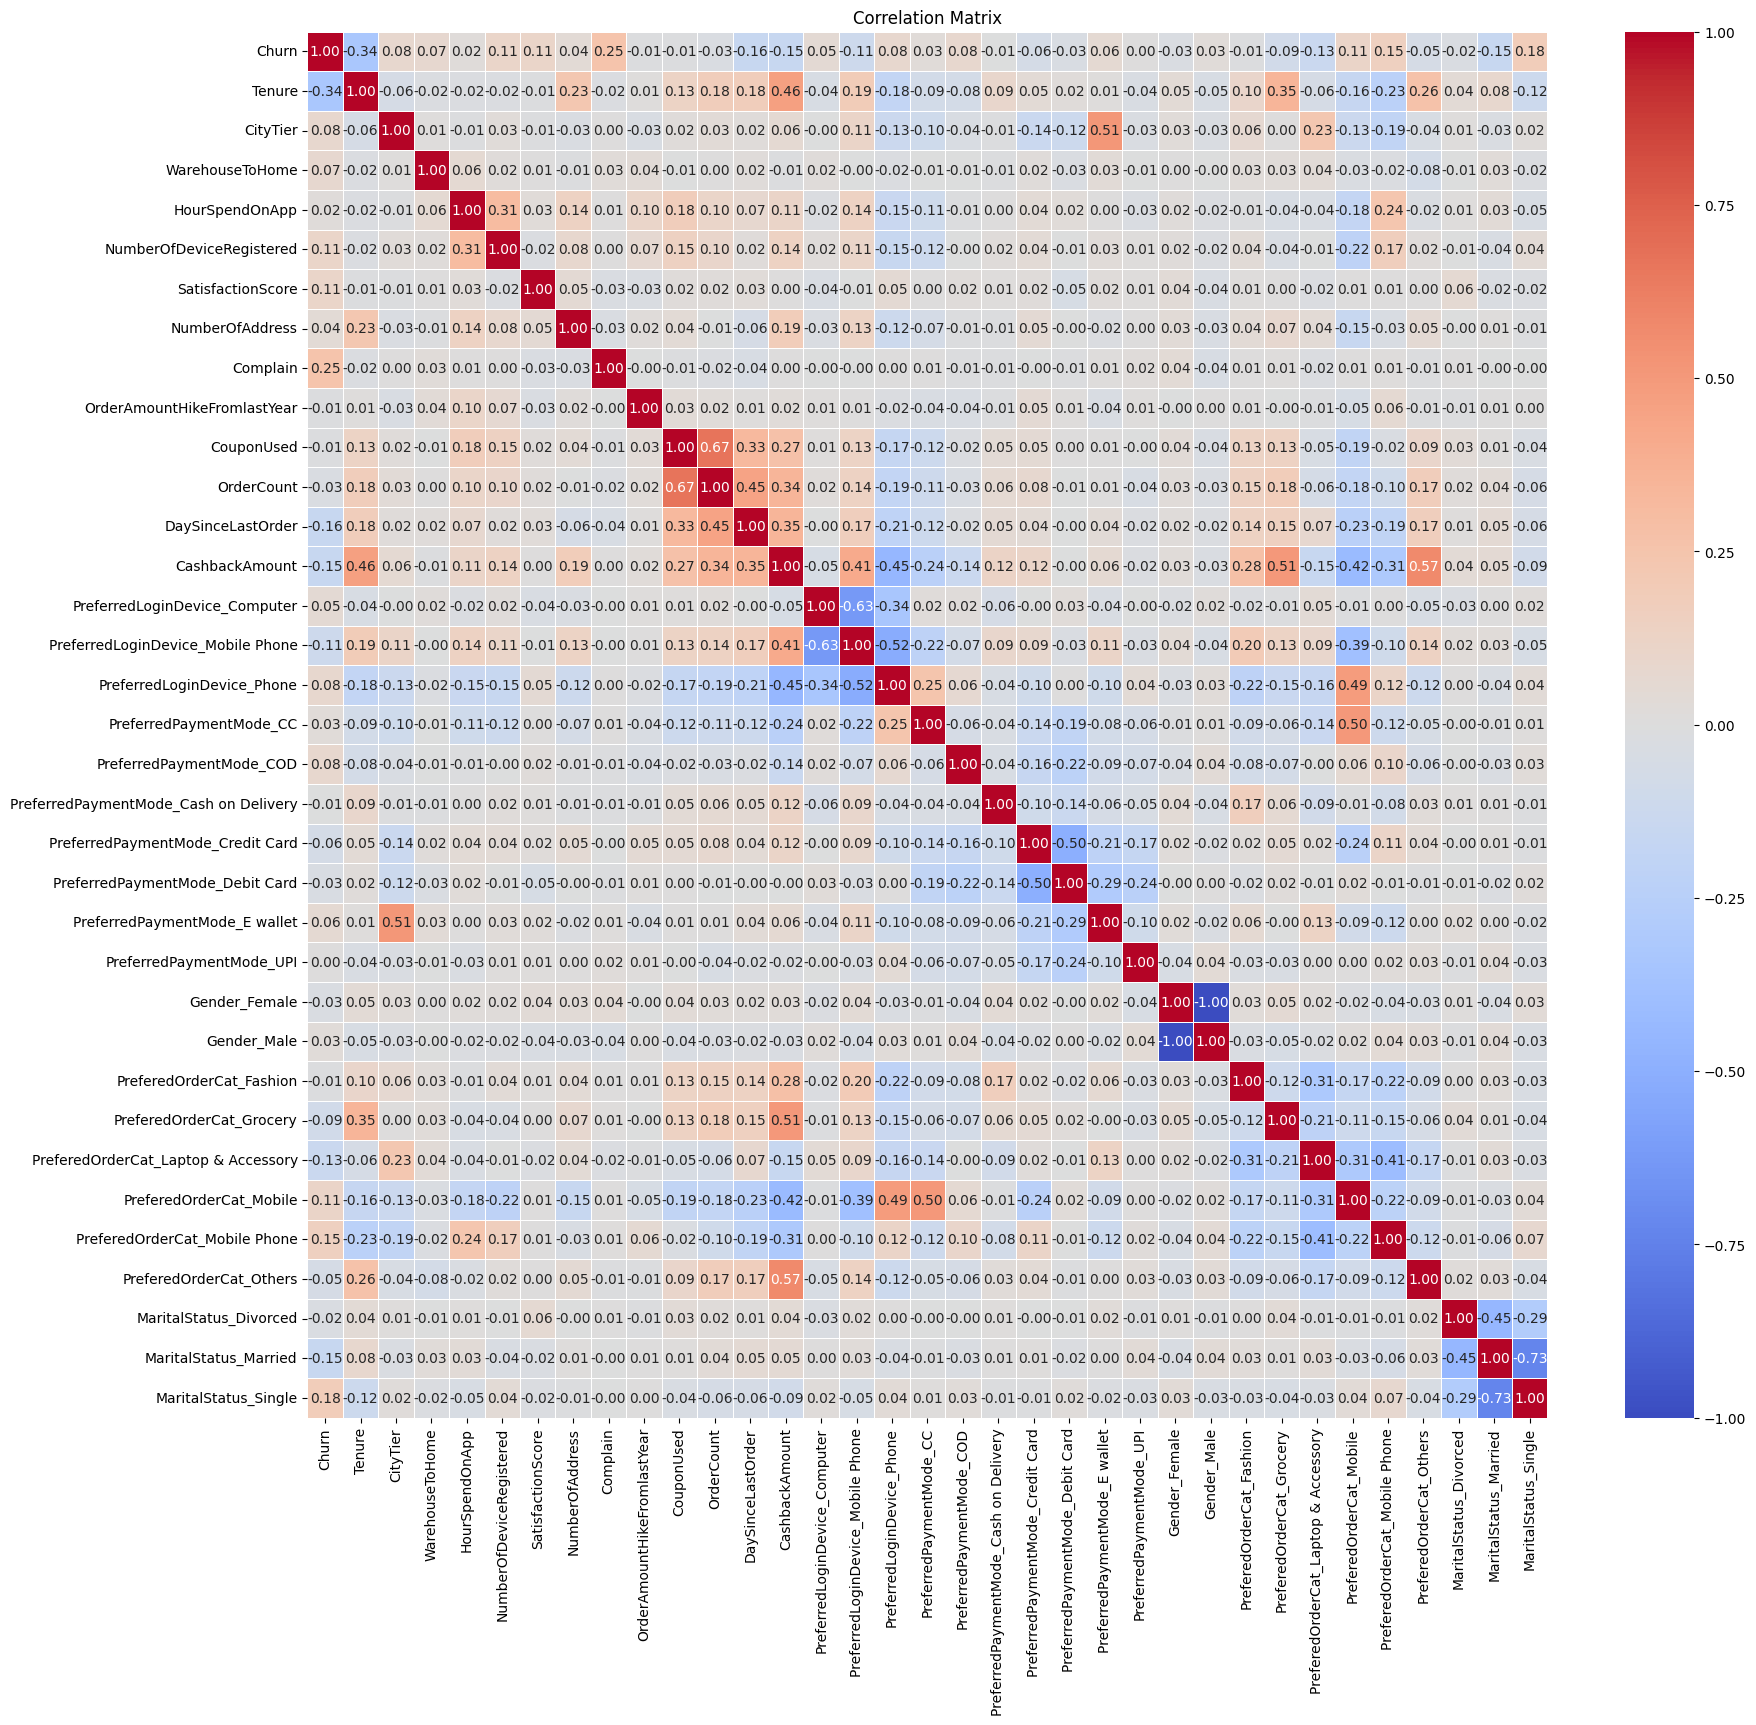

In [ ]:
# Encode ตัวแปรที่เป็น object เป็น numeric ด้วย One-Hot Encoding
df_encoded = pd.get_dummies(df)

# คำนวณ correlation matrix
corr_matrix = df_encoded.corr()

# พล็อตกราฟ heatmap ของ correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

The Churn variable, which is of particular interest, shows varying degrees of correlation with other features. Notably, Churn is somewhat positively correlated with features like DaySinceLastOrder and negatively correlated with Tenure. This suggests that customers who have not ordered recently are more likely to churn, and those with longer tenure are less likely to churn.

### **Density of Numeric Features by Churn**

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

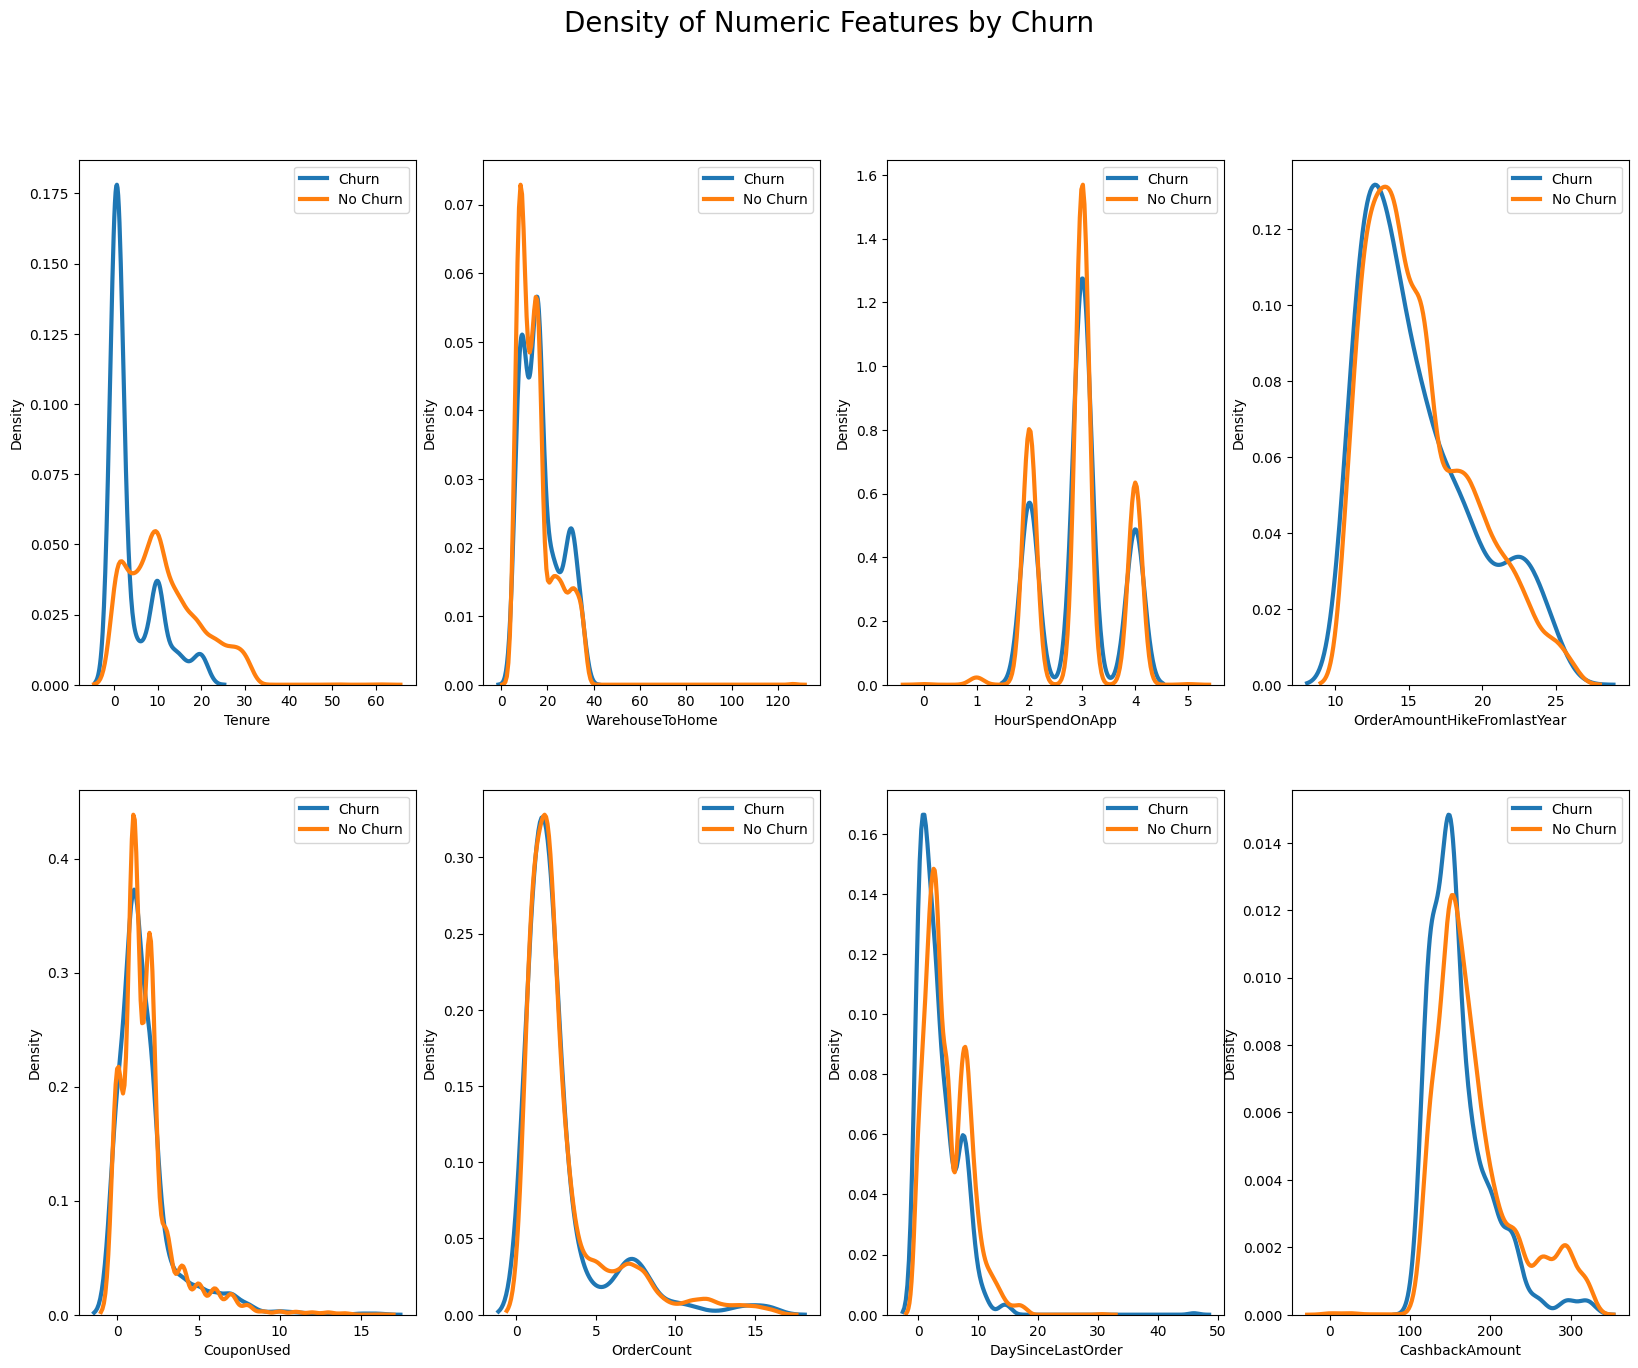

In [ ]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

**Distributions Insights Of the Numeric Features**

*   Tenure:  Longer tenure means lower churn, reflecting higher satisfaction.
*   CityTier:  Churn rates are consistent across city tiers, indicating city tier alone may not predict churn.
*   WarehouseToHome:  Shorter distances reduce churn; faster delivery boosts
*   HourSpendOnApp:  More app time means less churn; high engagement is positive.
*   NumberOfDeviceRegistered:  More devices mean lower churn; access across devices reduces churn.
*   SatisfactionScore:  Higher scores mean lower churn; vital for retention.
*   NumberOfAddress:  More addresses slightly reduce churn; loyalty indicator.
*   Complain: More complaints mean higher churn; addressing complaints is crucial.
*   OrderAmountHikeFromLastYear:  Higher spending means lower churn; retain big spenders.
*   CouponUsed:  Coupon use lowers churn; enhances loyalty.
*   OrderCount:  More orders mean lower churn; builds loyalty.
*   DaySinceLastOrder:  Longer time since last order means higher churn; regular engagement reduces churn.

In [ ]:
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)

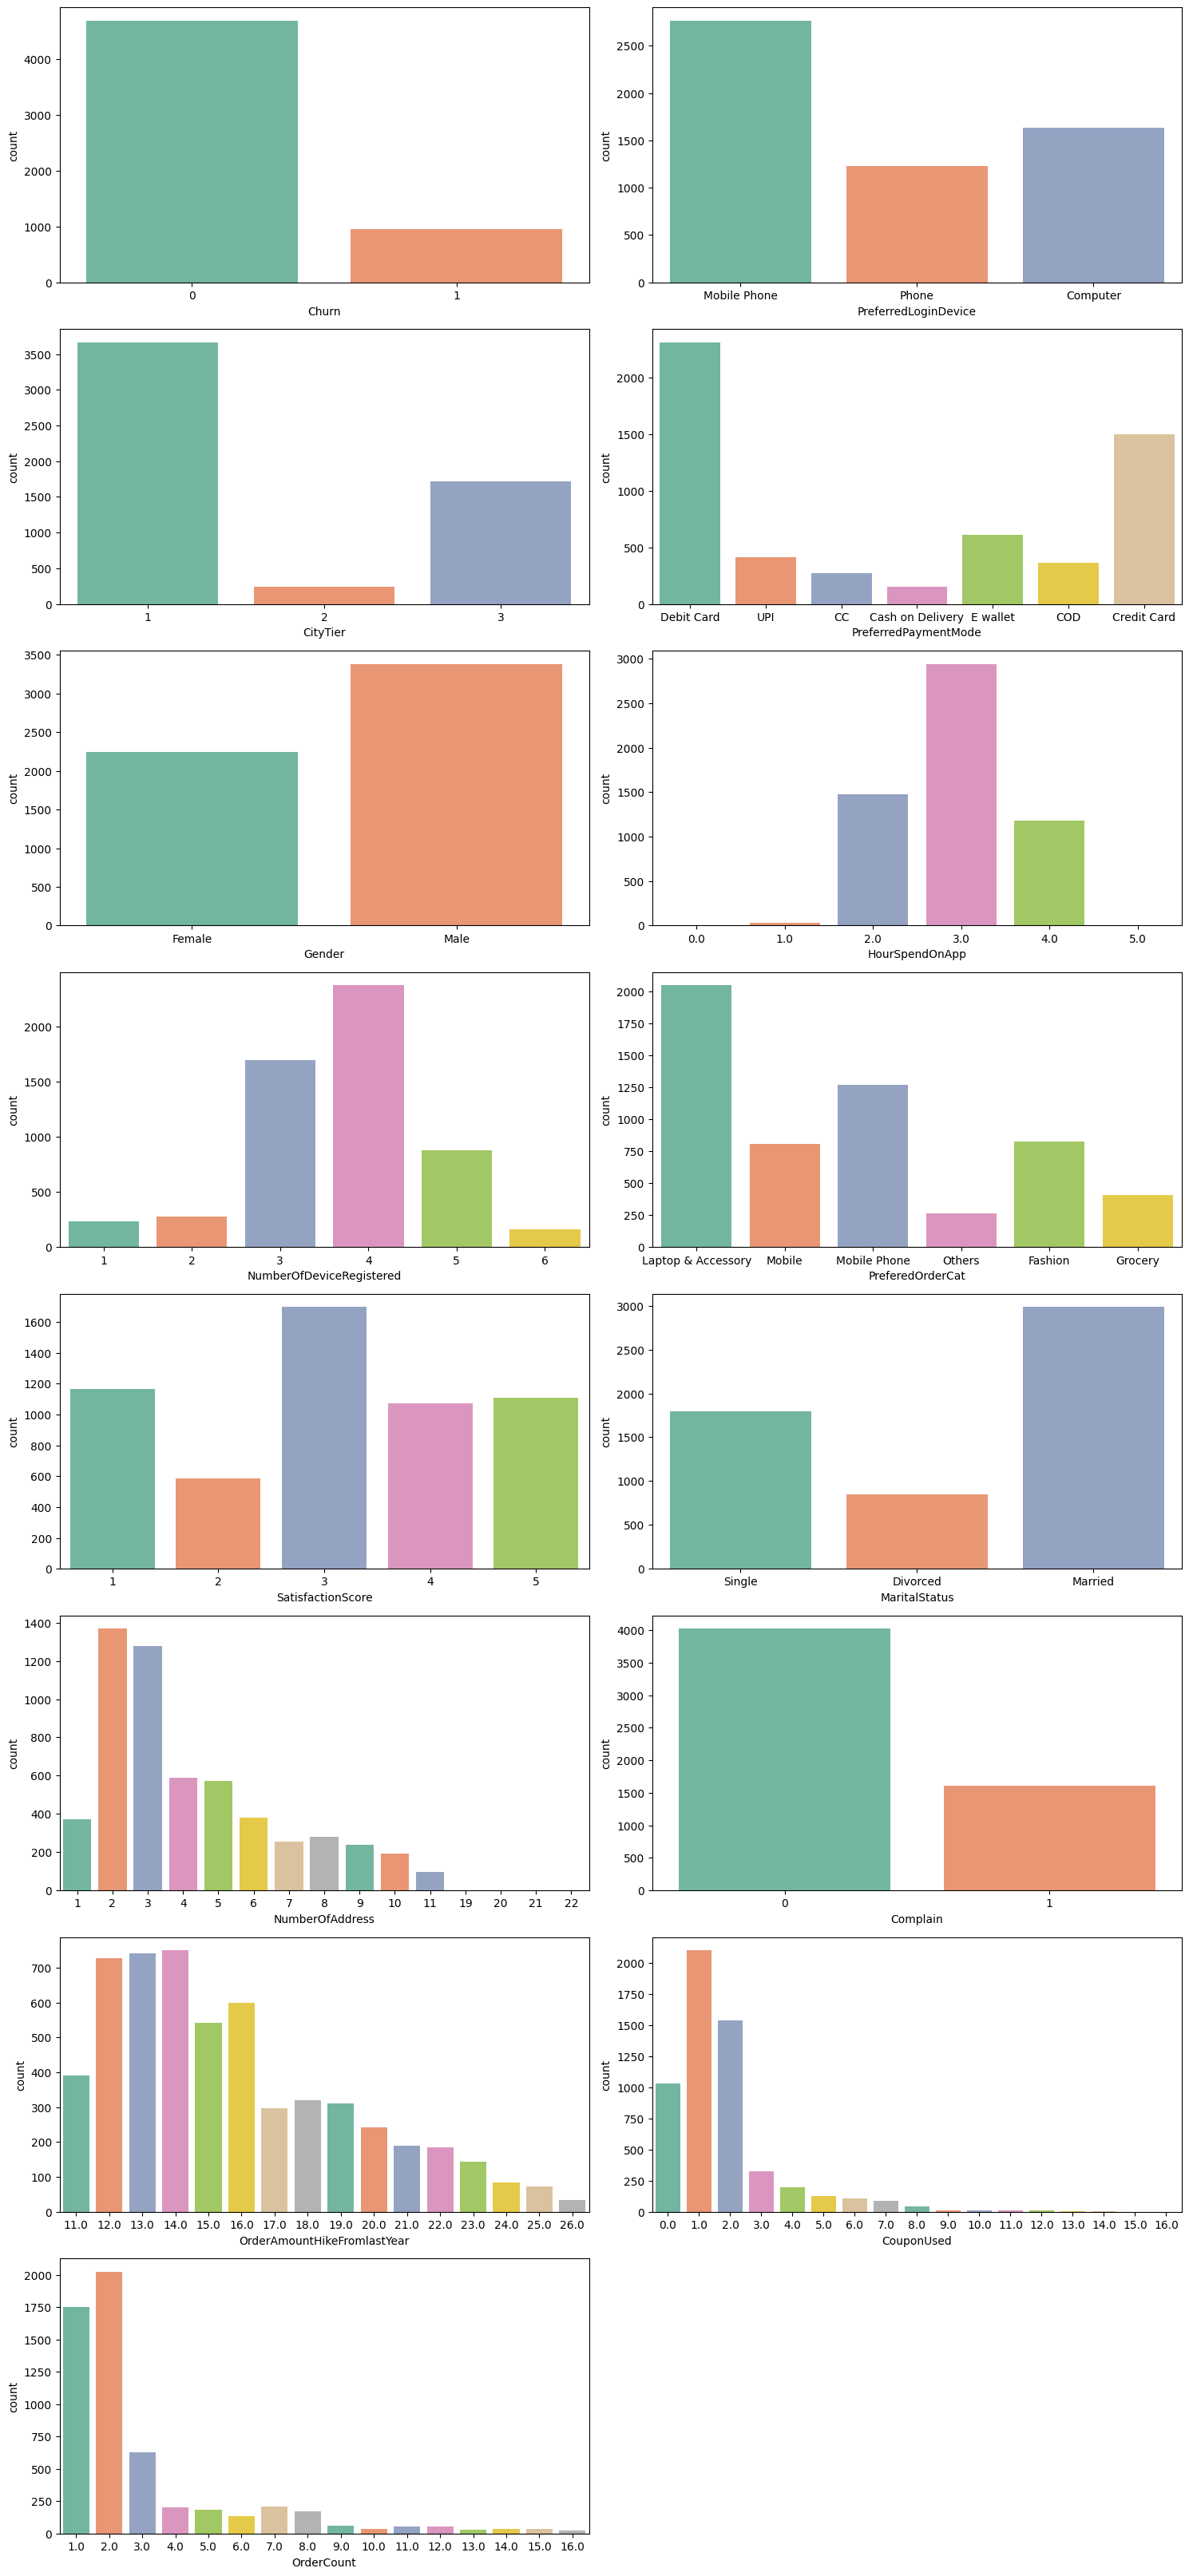

In [ ]:
plt.figure(figsize=(15, 40))
plot_num = 1
for col in count_col:
    plt.subplot(10, 2, plot_num)
    sns.countplot(data=df, x=col, palette='Set2')
    plot_num += 1
    plt.tight_layout()
plt.show()

* Churn:
Most customers have not churned (0), indicating a relatively low churn rate overall.
* PreferredLoginDevice:
Most customers prefer to log in using a mobile phone, followed by phone and computer. This could suggest that a mobile-friendly user interface might be key for customer retention.
* CityTier:
There is a roughly even distribution among the three city tiers, with a slight dominance of Tier 3 cities.
PreferredPaymentMode:
Debit Card and Credit Card are popular payment methods, followed by UPI. Less common are e-wallet and Cash on Delivery (COD).
* Gender:
There are more male customers than female in the dataset.
* HourSpendOnApp:
Most customers spend 3 hours on the app, with decreasing counts for higher and lower values.
* NumberOfDeviceRegistered:
A majority of customers have registered 3 or 4 devices.
* PreferedOrderCat:
Mobile phones and fashion items are popular categories, with groceries and laptops & accessories also notable.
* SatisfactionScore:
Scores are distributed across the scale, with scores of 3 and 5 being most common, suggesting varying levels of customer satisfaction.
* MaritalStatus:
Most customers are single, with fewer married and divorced.
* NumberOfAddress:
The majority of customers have 1 to 2 addresses, with a gradual decrease as the number increases.
* Complain:
Most customers have not registered a complaint.
OrderAmountHikeFromlastYear:
There's a broad distribution, with most hikes being around the 15-18% mark.
* OrderCount:
Most customers have placed 1-2 orders, with significantly fewer placing more.
* CouponUsed:
A significant number of customers use 0 or 1 coupon, with usage dropping as the number increases.
* DaySinceLastOrder:
This plot likely would show the number of days since the last order for each customer, hinting at customer engagement levels.

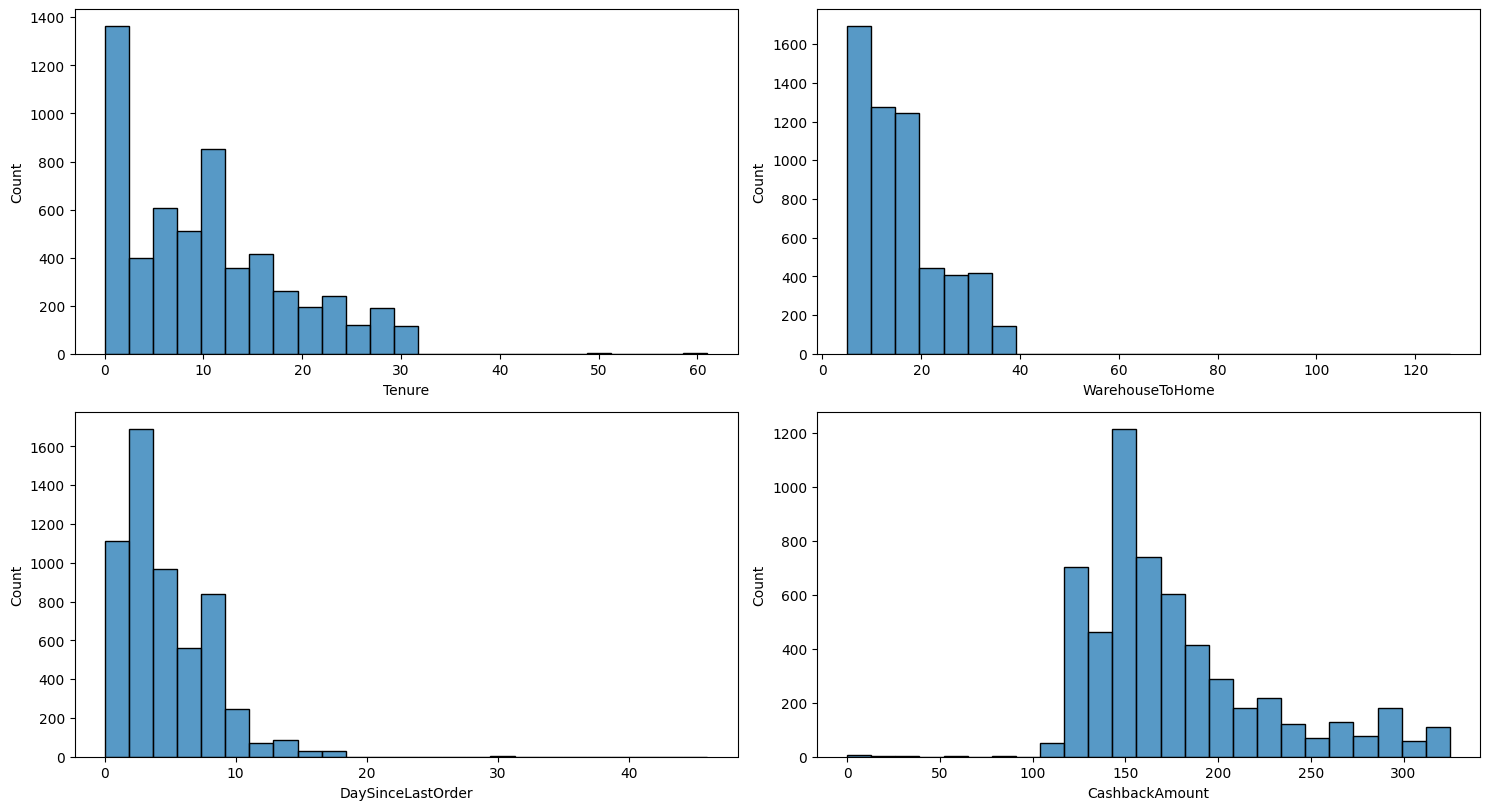

In [ ]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

* Tenure:
The histogram shows that a significant number of customers have a tenure of less than 10 months, with the highest frequency around 0 to 5 months. This suggests a large influx of new customers or possibly high churn rates early in the customer lifecycle. The frequency gradually decreases as tenure increases, which is typical as fewer customers remain engaged over longer periods.
* WarehouseToHome:
This histogram depicts a right-skewed distribution, indicating most deliveries are within a closer range (around 0 to 40 units, likely kilometers or miles). There are fewer deliveries at higher distance ranges, which might be due to lesser service coverage or higher delivery costs and times.
* DaySinceLastOrder:
The data here is heavily skewed towards lower values, with most customers having placed their last order within 10 days. This indicates frequent ordering and possibly good customer retention or engagement within a short timeframe. The number of customers decreases as the days since the last order increase.
* CashbackAmount:
The distribution of cashback amounts shows a high frequency at the lower end, with most cashbacks being under 50 units. The frequency decreases as the cashback amount increases, which might suggest that higher cashbacks are less common or tied to less frequent, higher-value purchases.

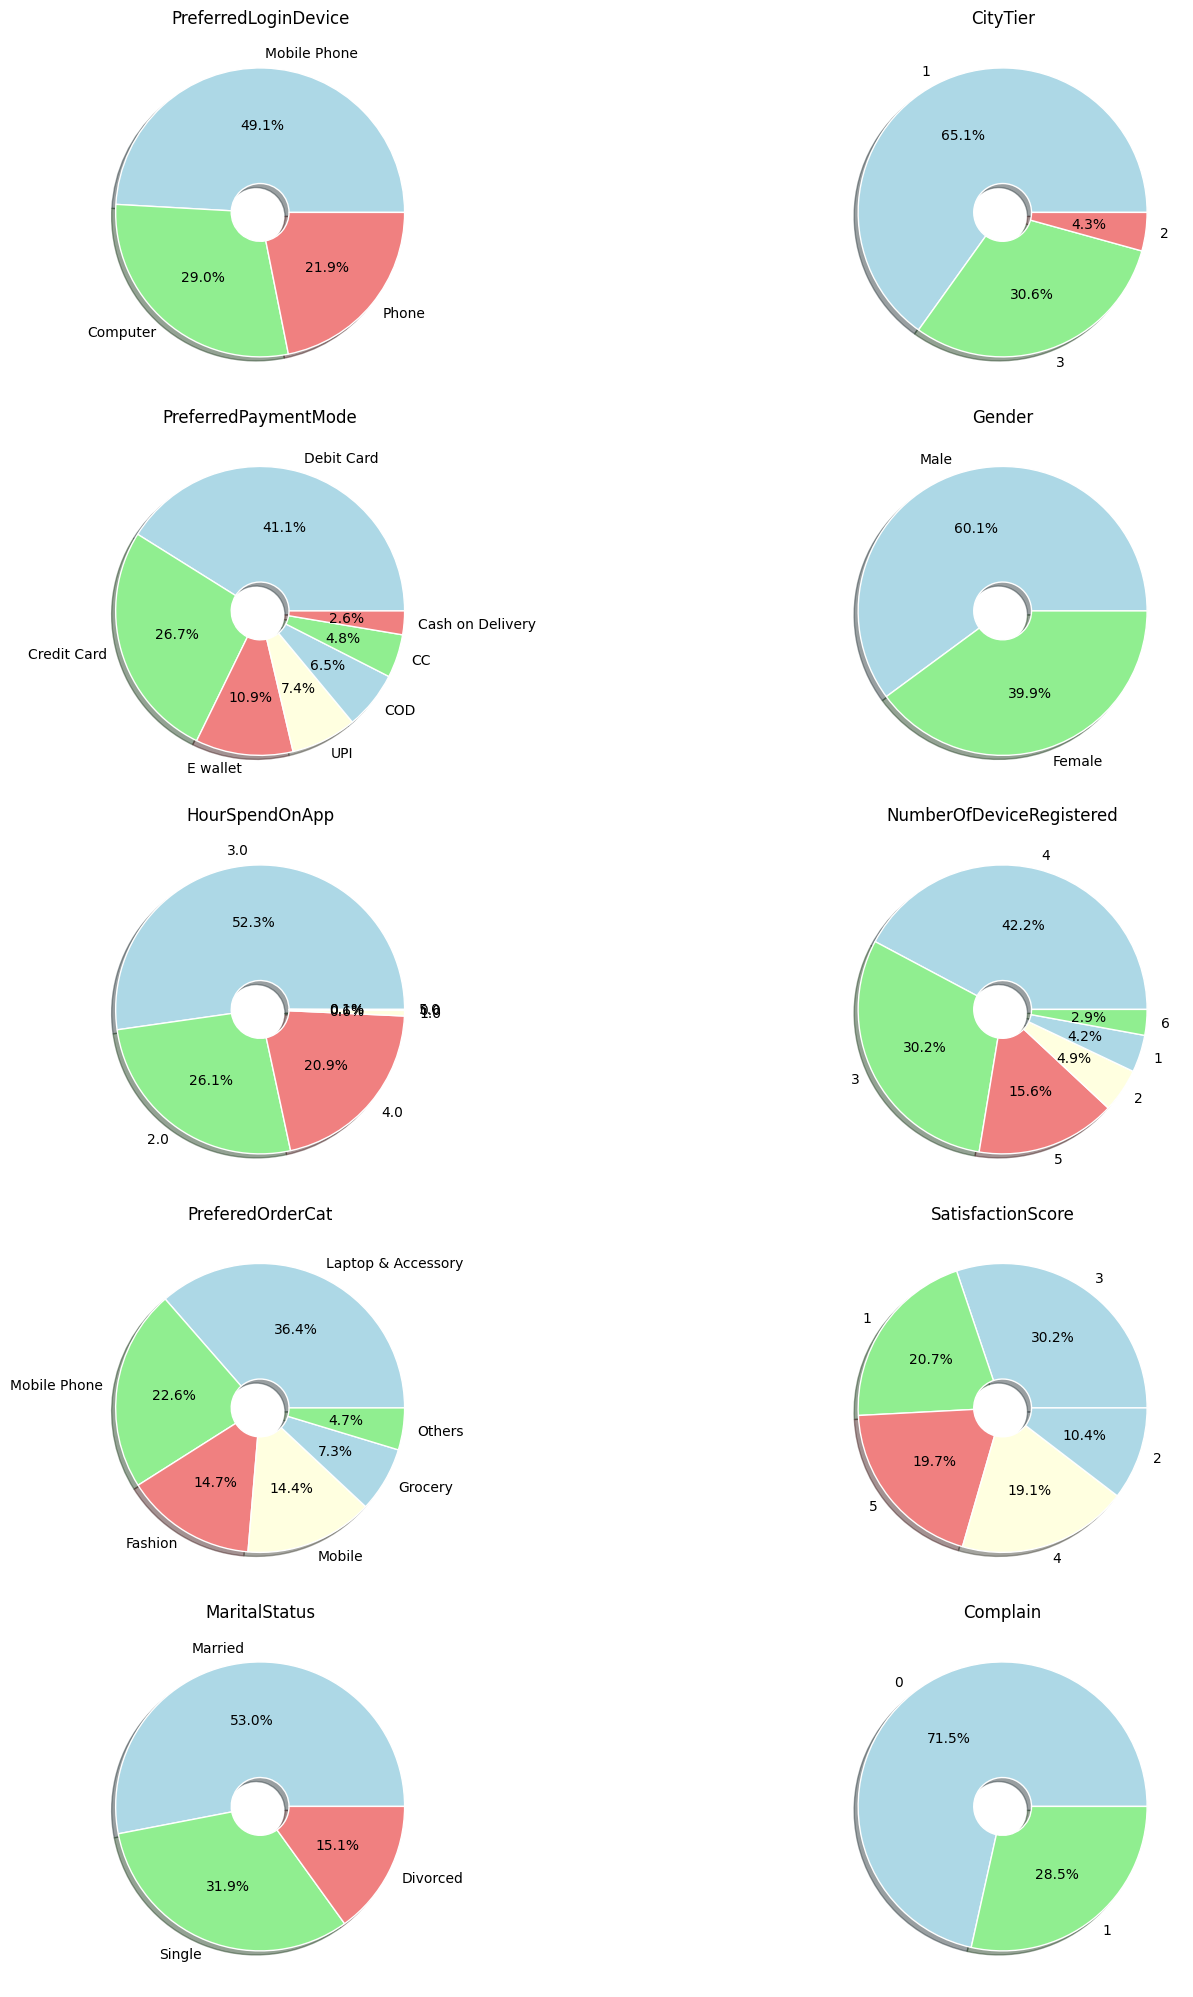

In [ ]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "Churn":
        plt.subplot(10,2,plot_num)
        plt.pie(data=df, x=df[col].value_counts().values,labels=df[col].value_counts().index,shadow=True,autopct='%1.1f%%',
               colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'],wedgeprops=dict(width=0.8,edgecolor="w") )
        plt.title(col)
        plot_num += 1
        plt.tight_layout()

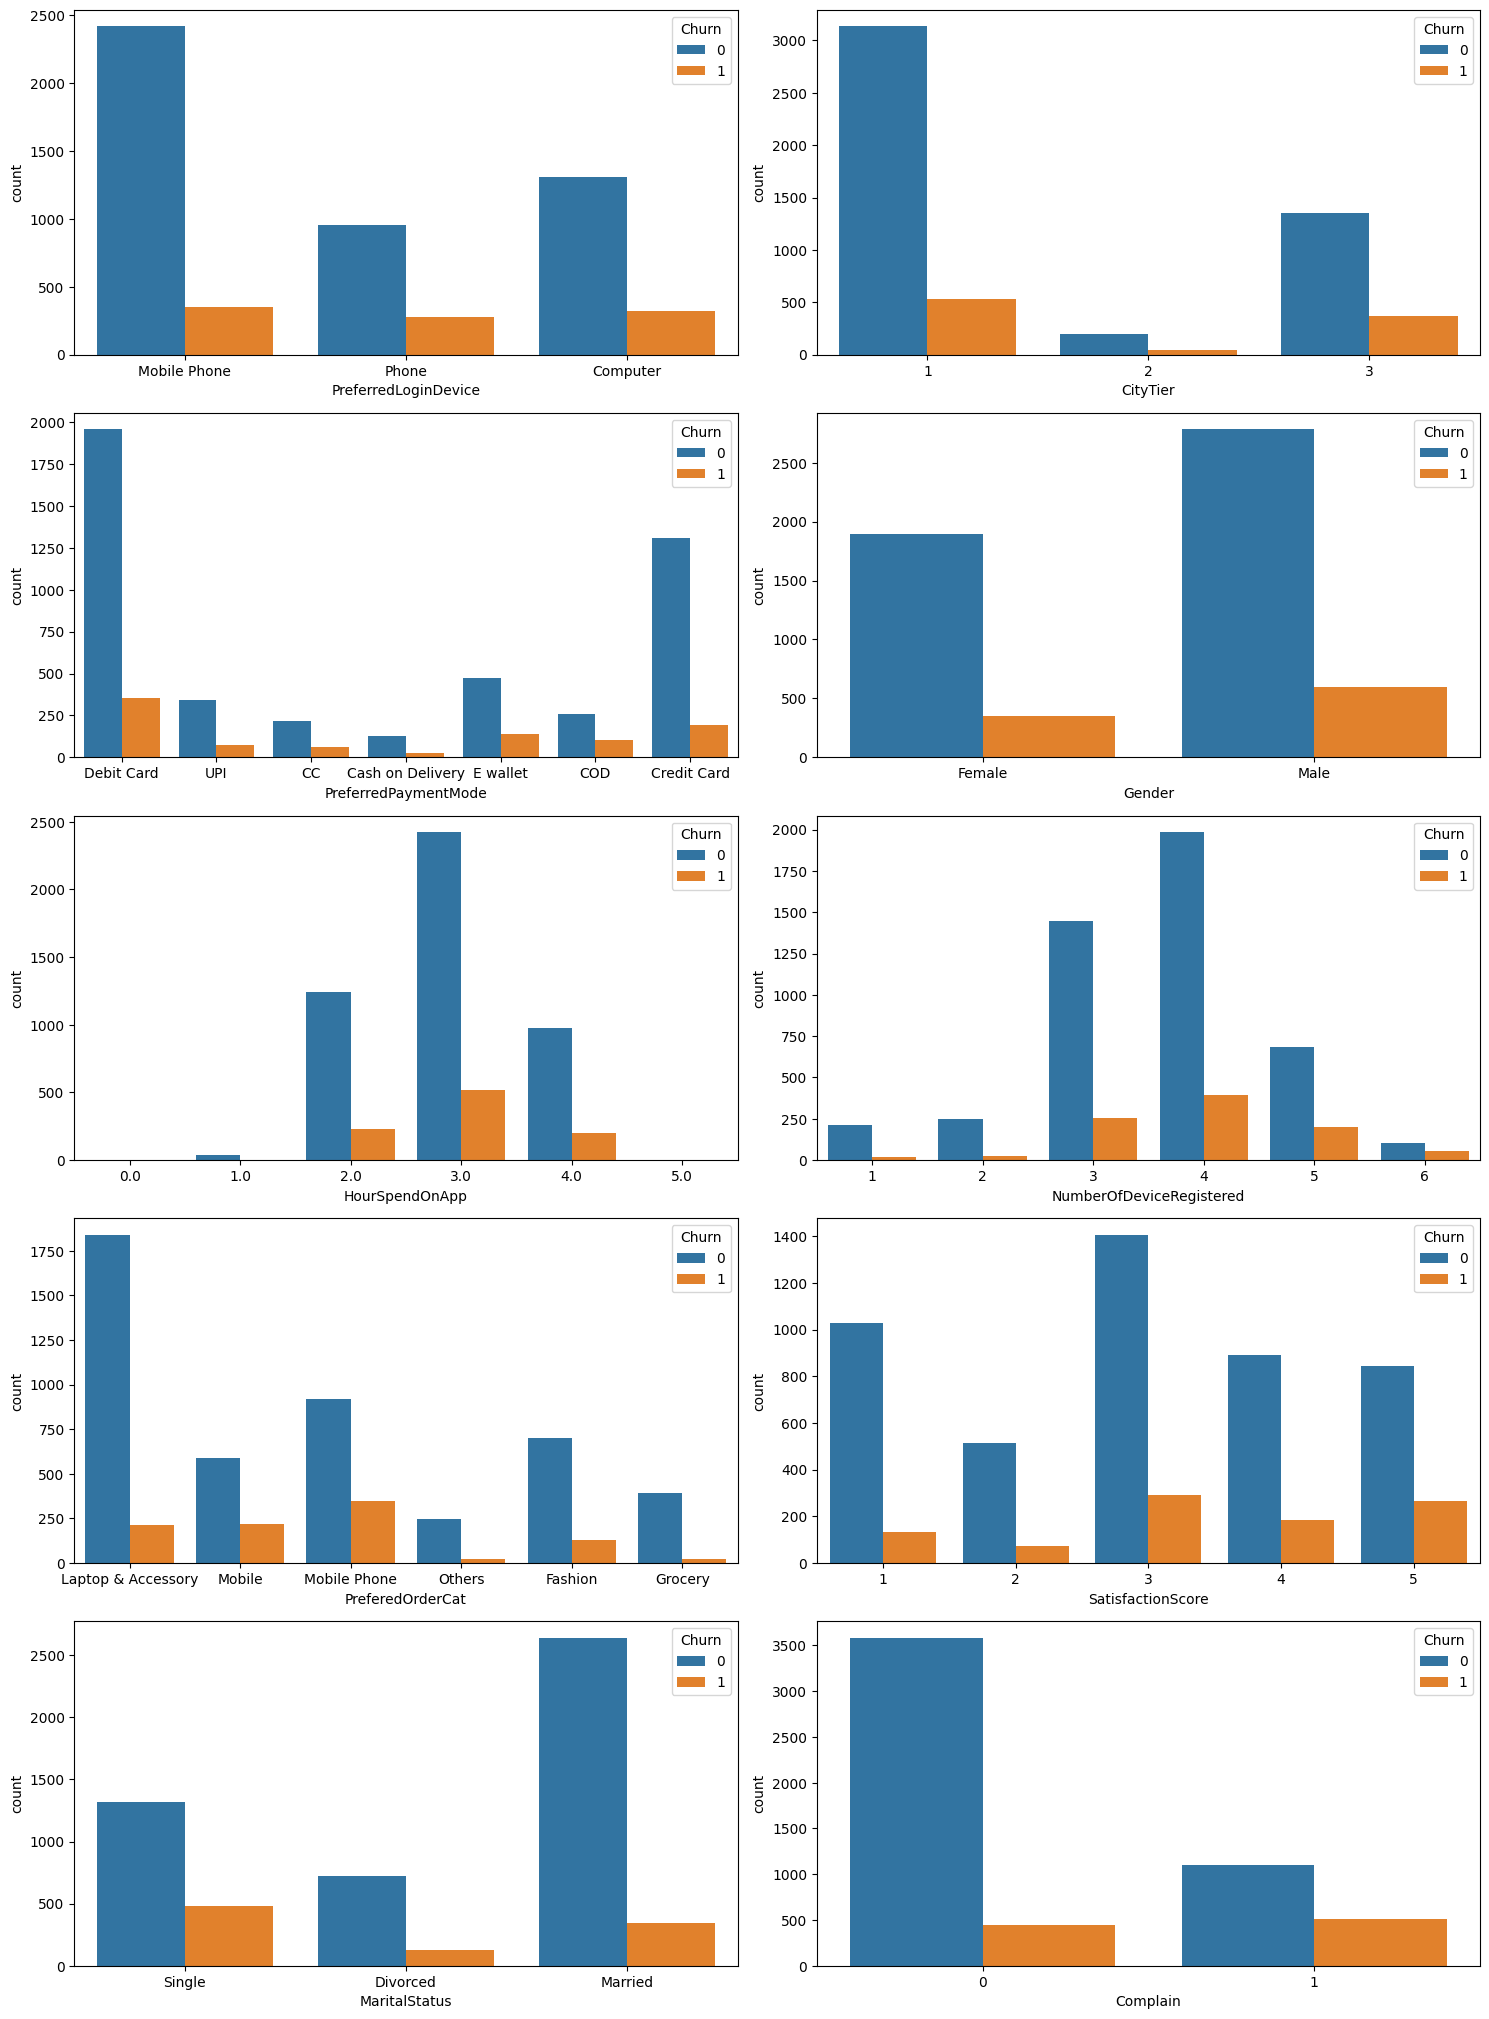

In [ ]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "Churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="Churn")
        plot_num += 1
        plt.tight_layout()

In [ ]:
df.head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0         Mobile Phone         3              6.0   
1      1    10.0                Phone         1              8.0   
2      1    10.0                Phone         1             30.0   
3      1     0.0                Phone         3             15.0   
4      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             3.0                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

### **Is there a relationship between Gender and Churn? & Which Gender has more Orders?**

In [ ]:
#Is there a relationship between Gender and Churn? & Which Gender has more Orders?

df['Gender'].value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

In [ ]:
df.groupby("Churn")["Gender"].value_counts() # the churned females ratio 348/2246 * 100
                                              # the churned males ratio 600/3384 * 100

Churn  Gender
0      Male      2784
       Female    1898
1      Male       600
       Female     348
Name: count, dtype: int64

In [ ]:
df.groupby("PreferredLoginDevice")["OrderCount"].value_counts() # the churned females ratio 348/2246 * 100

PreferredLoginDevice  OrderCount
Computer              2.0            573
                      1.0            486
                      3.0            217
                      4.0             61
                      7.0             59
                      5.0             48
                      8.0             44
                      6.0             40
                      14.0            20
                      9.0             19
                      11.0            16
                      12.0            15
                      10.0            15
                      13.0             9
                      15.0             8
                      16.0             4
Mobile Phone          2.0           1108
                      1.0            576
                      3.0            349
                      4.0            119
                      7.0            115
                      8.0            113
                      5.0            107
                      6.

<Axes: xlabel='Gender'>

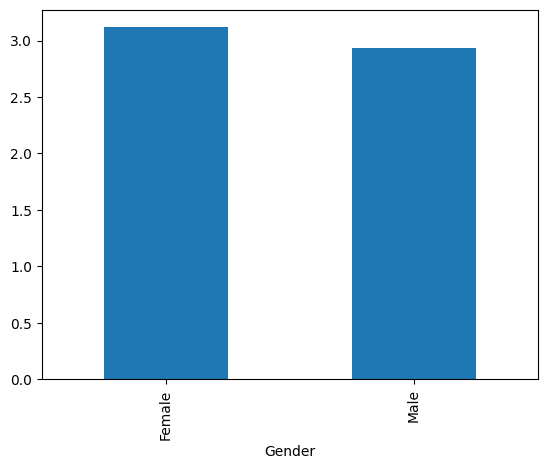

In [ ]:
gender_orders = df.groupby('Gender')['OrderCount'].mean().plot(kind='bar')

gender_orders  # females have more order count avg

In [ ]:
#There is not a big difference between the males and the femals: avg order

percentageM =600/3384 * 100

percentageM   #the percentage of the leaving males out of the males

17.73049645390071

In [ ]:
percentageF =348/2246 * 100

percentageF  #the percentage of the leaving females out of the females

15.49421193232413

In [ ]:
import pandas as pd
import plotly.express as px

# Create figure
fig = px.pie(df, values='Churn', names='Gender')
fig.update_traces(marker=dict(colors=['pink ', 'baby blue']))

# Update layout
fig.update_layout(
  title='Churn Rate by Gender',
  legend_title='Gender'
)

# Show plot
fig.show()

Males have a slightly higher churn rate than females This suggests a mild relationship between gender and churn, with males being slightly more likely to churn than females.

### **Which MartialStatus has the highest Churn rate?**


In [ ]:
df.groupby("Churn")["MaritalStatus"].value_counts()

Churn  MaritalStatus
0      Married          2642
       Single           1316
       Divorced          724
1      Single            480
       Married           344
       Divorced          124
Name: count, dtype: int64

Text(0, 0.5, 'Churn Rate')

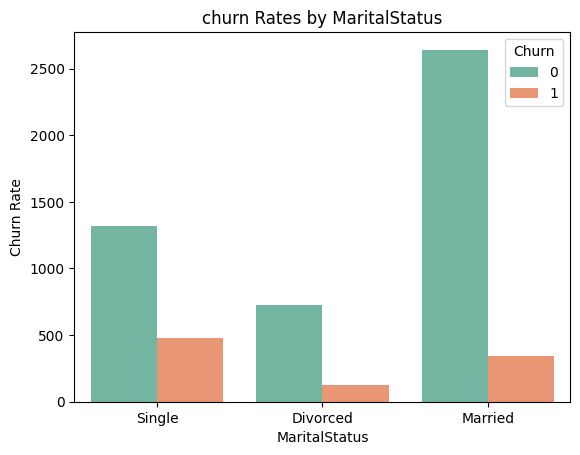

In [ ]:
sns.countplot(x='MaritalStatus',hue='Churn',data=df,palette='Set2')
plt.title("churn Rates by MaritalStatus")
plt.ylabel("Churn Rate")

The married are the highest customer segment in the comapny may be the comapny should consider taking care of the products that suits the single and the married customers as the singles are the most likely to churn from the app

### **Which CityTier has higher Tenure and OrderCount?**

In [ ]:
df_grouped_tenure = df.groupby('CityTier')['Tenure'].agg(['mean', 'max'])
df_grouped_tenure

mean   max
CityTier                 
1         10.500546  51.0
2         11.053719  31.0
3          9.378049  61.0

In [ ]:
df_grouped_OrderCount = df.groupby('CityTier')['OrderCount'].agg(['mean', 'max'])
df_grouped_OrderCount

mean   max
CityTier                
1         2.955537  16.0
2         2.590909  13.0
3         3.177120  16.0

**Citytier 2** has the highest tenure rate but the tenure rate does not seen to be a strong factor



In [ ]:
df.groupby("CityTier")["OrderCount"].mean()

CityTier
1    2.955537
2    2.590909
3    3.177120
Name: OrderCount, dtype: float64

**Citytier 3** has the highest order avg but it not to be a strong factor in the customer churning

### **Is Customer with High SatisfactionScore have high HourSpendOnApp?**

In [ ]:
df['SatisfactionScore'].dtypes

dtype('int64')

In [ ]:
import matplotlib.pyplot as plt

# plot
fig = px.histogram(df, x="HourSpendOnApp", y="SatisfactionScore", orientation="h", color="Churn" ,text_auto= True , title="<b>"+'HourSpendOnApp Vs SatisfactionScore' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='HourSpendOnApp',
yaxis_title='SatisfactionScore',
)
fig.show()

People with lower satisfaction scores tend to spend less time on the app compared to those with a satisfaction score of 5. However, I don't believe there is a relationship between satisfaction score and time spent on the app.

### **Which CityTier has the most HourSpendOnApp?**

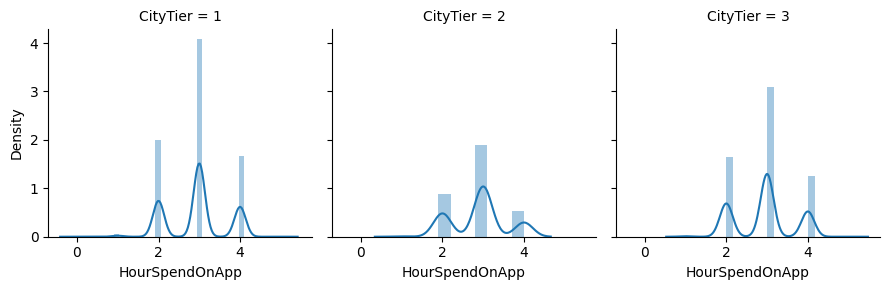

In [ ]:
g = sns.FacetGrid(df, col='CityTier')
g.map(sns.distplot, 'HourSpendOnApp')

**City Tier 1** has the most spended hours on the app







### **Is there a relationship between PreferredLoginDevice and churn?**

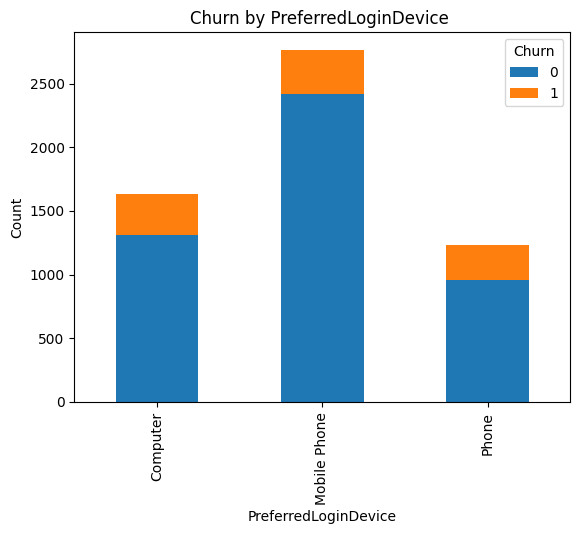

In [ ]:
# Bar chart with churn rate
import seaborn as sns
# sns.catplot(x='PreferredLoginDevice', y='Churn', data=df, kind='bar')

# Group the data by 'OverTime' and 'Attrition', and calculate the count
grouped_data = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().plot(kind='bar', stacked=True)

# Set the plot title, x-label, and y-label
plt.title('Churn by PreferredLoginDevice ')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')

# Show the plot
plt.show()

**Mobile phone users** are likely to churn may be this indicates a problem on the app user experience on the app mobile version

### **Does different citytiers has different prefered products?**

In [ ]:
import plotly.express as px
earth_palette = ["#A67C52", "#8F704D", "#B09B71", "#7E786E"]


fig=px.histogram(df,x="PreferedOrderCat",facet_col="CityTier",color="CityTier",color_discrete_sequence=earth_palette,text_auto= True , title="<b>"+'CityTier Vs PreferedOrderCat')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

**Laptop & accesories** and **mobile phones** are the prefered category for all the city tiers



### **What is the preferred payment mode for different CityTiers?**

In [ ]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [ ]:
df.groupby('CityTier')[['PreferredPaymentMode']].value_counts()

CityTier  PreferredPaymentMode
1         Debit Card              1676
          Credit Card             1147
          COD                      260
          UPI                      242
          CC                       235
          Cash on Delivery         106
2         UPI                      114
          Debit Card                62
          Credit Card               38
          COD                       16
          CC                        12
3         E wallet                 614
          Debit Card               576
          Credit Card              316
          COD                       89
          UPI                       58
          Cash on Delivery          43
          CC                        26
Name: count, dtype: int64

In [ ]:
# color palettes
pie_palette = ['#3E885B','#7694B6','#85BDA6', '#80AEBD', '#2F4B26', '#3A506B']
green_palette = ['#2F4B26', '#3E885B', '#85BDA6', '#BEDCFE', '#C0D7BB']
blue_palette = ['#3A506B', '#7694B6', '#80AEBD', '#5BC0BE', '#3E92CC']
custom_palette = ['#3A506B', '#7694B6', '#80AEBD', '#3E885B', '#85BDA6']
red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']

In [ ]:
import plotly.express as px

fig=px.histogram(df,x="PreferredPaymentMode",facet_col="CityTier",color="CityTier",color_discrete_sequence=red_palette,text_auto= True , title="<b>"+'CityTier Vs PaymentMethod')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

*   Preferred payment method for CityTier '1' ==> DebitCard
*   Preferred payment method for CityTier '2' ==> UPI
*   Preferred payment method for CityTier '3' ==> E wallet

### **Which CityTier has the highest OrderCount?**

In [ ]:
df.groupby('CityTier')[['OrderCount']].sum()

OrderCount
CityTier            
1            10835.0
2              627.0
3             5471.0

In [ ]:
fig = px.histogram(df, x="OrderCount", y="CityTier", orientation="h", color="CityTier" ,text_auto= True , title="<b>"+'CityTier Vs Sum of OrderCount' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Sum of OrderCount',
yaxis_title='count',
)
fig.show()

**CityTier '1'** has highest order count with 10298 orders

### **Is there a relationship between preferred order category and churn rate?**

In [ ]:
df.groupby(['PreferedOrderCat' , 'Gender']).count()

Churn  Tenure  PreferredLoginDevice  CityTier  \
PreferedOrderCat   Gender                                                  
Fashion            Female    354     354                   354       354   
                   Male      472     472                   472       472   
Grocery            Female    198     198                   198       198   
                   Male      212     212                   212       212   
Laptop & Accessory Female    844     844                   844       844   
                   Male     1206    1206                  1206      1206   
Mobile             Female    306     306                   306       306   
                   Male      503     503                   503       503   
Mobile Phone       Female    458     458                   458       458   
                   Male      813     813                   813       813   
Others             Female     86      86                    86        86   
                   Male      178     178                   178       178   

                           WarehouseToHome  PreferredPaymentMode  \
PreferedOrderCat   Gender                                          
Fashion            Female              354                   354   
                   Male                472                   472   
Grocery            Female              198                   198   
                   Male                212                   212   
Laptop & Accessory Female              844                   844   
                   Male               1206                  1206   
Mobile             Female              306                   306   
                   Male                503                   503   
Mobile Phone       Female              458                   458   
                   Male                813                   813   
Others             Female               86                    86   
                   Male                178                   178   

                           HourSpendOnApp  NumberOfDeviceRegistered  \
PreferedOrderCat   Gender                                             
Fashion            Female             354                       354   
                   Male               472                       472   
Grocery            Female             198                       198   
                   Male               212                       212   
Laptop & Accessory Female             844                       844   
                   Male              1206                      1206   
Mobile             Female             306                       306   
                   Male               503                       503   
Mobile Phone       Female             458                       458   
                   Male               813                       813   
Others             Female              86                        86   
                   Male               178                       178   

                           SatisfactionScore  MaritalStatus  NumberOfAddress  \
PreferedOrderCat   Gender                                                      
Fashion            Female                354            354              354   
                   Male                  472            472              472   
Grocery            Female                198            198              198   
                   Male                  212            212              212   
Laptop & Accessory Female                844            844              844   
                   Male                 1206           1206             1206   
Mobile             Female                306            306              306   
                   Male                  503            503              503   
Mobile Phone       Female                458            458              458   
                   Male                  813            813              813   
Others             Female                 86          

In [ ]:
# Group and count by 'PreferedOrderCat' and 'Churn'
ordercat_churnrate = pd.DataFrame(df.groupby('PreferedOrderCat')['Gender'].value_counts())
ordercat_churnrate = ordercat_churnrate.rename(columns={'Gender': 'Count'})
ordercat_churnrate = ordercat_churnrate.reset_index()


fig = px.histogram(ordercat_churnrate, x='PreferedOrderCat', y = 'count',color='Gender', barmode='group',color_discrete_sequence=pie_palette,title="<b>"+'Prefered Category Vs Gender', barnorm = "percent",text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferedOrderCat',
yaxis_title='count',)
fig.show()

*   Top 2 Preferd Category For Males == > [ Others , Mobile Phone ]
*   Top 2 Preferd Category For Females == > [ Grocery , Fashion ]

### **Do customers who used more coupons have lower churn rates?**

In [ ]:
df.groupby(['CouponUsed' , 'Churn']).count()

Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
CouponUsed Churn                                                            
0.0        0         844                   844       844              844   
           1         186                   186       186              186   
1.0        0        1727                  1727      1727             1727   
           1         378                   378       378              378   
2.0        0        1309                  1309      1309             1309   
           1         230                   230       230              230   
3.0        0         281                   281       281              281   
           1          46                    46        46               46   
4.0        0         167                   167       167              167   
           1          30                    30        30               30   
5.0        0         106                   106       106              106   
           1          23                    23        23               23   
6.0        0          90                    90        90               90   
           1          18                    18        18               18   
7.0        0          71                    71        71               71   
           1          18                    18        18               18   
8.0        0          33                    33        33               33   
           1           9                     9         9                9   
9.0        0          11                    11        11               11   
           1           2                     2         2                2   
10.0       0          11                    11        11               11   
           1           3                     3         3                3   
11.0       0          10                    10        10               10   
           1           2                     2         2                2   
12.0       0           8                     8         8                8   
           1           1                     1         1                1   
13.0       0           8                     8         8                8   
14.0       0           5                     5         5                5   
15.0       1           1                     1         1                1   
16.0       0           1                     1         1                1   
           1           1                     1         1                1   

                  PreferredPaymentMode  Gender  HourSpendOnApp  \
CouponUsed Churn                                                 
0.0        0                       844     844             844   
           1                       186     186             186   
1.0        0                      1727    1727            1727   
           1                       378     378             378   
2.0        0                      1309    1309            1309   
           1                       230     230             230   
3.0        0                       281     281             281   
           1                        46      46              46   
4.0        0                       167     167             167   
           1                        30      30              30   
5.0        0                       106     106             106   
           1                        23      23              23   
6.0        0                        90      90              90   
           1                        18      18              18   
7.0        0                        71      71              71   
           1                        18      18              18   
8.0        0                        33      33              33   
           1                         9       9               9   
9.0        0                        11      11              11   
           1                         2       2               2   
10.0       0            

In [ ]:
# Group and count by 'Coup' and 'Churn'
coupoun_churnrate = pd.DataFrame(df.groupby('CouponUsed')['Churn'].value_counts())
coupoun_churnrate = coupoun_churnrate.rename(columns={'Churn': 'Count'})
coupoun_churnrate = coupoun_churnrate.reset_index()


fig = px.bar(coupoun_churnrate, x='CouponUsed', y = 'count',color='Churn', barmode='group',color_discrete_sequence=['rgba(58, 71, 80, 0.6)' ,'rgba(246, 78, 139, 1.0)'],title="<b>"+'CouponUsed Vs Churn Rate',text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CouponUsed',
yaxis_title='count',
)
fig.show()

Grpah shows Churn become less when more coupons used

# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Encode for cat_cols
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head()

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1    10.0                     2         1              8.0   
2      1    10.0                     2         1             30.0   
3      1     0.0                     2         3             15.0   
4      1     0.0                     2         1             12.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     4       0             3.0                         3   
1                     6       1             3.0                         4   
2                     4       1             2.0                         4   
3                     4       1             2.0                         4   
4                     0       1             3.0                         3   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   
4                 3                  5              2                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
y.value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=88)

In [ ]:
X_train.head()

Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
1814     0.0                     0         3             17.0   
5495    13.0                     1         1             26.0   
901      5.0                     1         3             13.0   
878      0.0                     2         1              6.0   
872      0.0                     2         1             16.0   

      PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
1814                     6       1             2.0                         1   
5495                     6       1             3.0                         4   
901                      5       1             3.0                         3   
878                      1       1             2.0                         3   
872                      4       0             2.0                         3   

      PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
1814                 2                  3              1                9   
5495                 2                  1              1               10   
901                  2                  2              0                5   
878                  3                  2              0                5   
872                  3                  3              2                2   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
1814         0                         12.0         1.0         1.0   
5495         0                         15.0         1.0         3.0   
901          0                         12.0         1.0         1.0   
878          0                         11.0         1.0         1.0   
872          1                         13.0         3.0         7.0   

      DaySinceLastOrder  CashbackAmount  
1814                2.0          147.07  
5495                3.0          164.02  
901                 3.0          192.04  
878                 2.0          132.29  
872                 7.0          123.94

In [ ]:
y_train.head()

1814    1
5495    0
901     0
878     0
872     1
Name: Churn, dtype: int64

### Handling with imbalanced data on the original dataset

In [ ]:
print("Original shape of X_train:",X_train.shape)
print("Class distribution",np.bincount(y_train))

Original shape of X_train: (4504, 18)
Class distribution [3746  758]


In [ ]:
rus = RandomUnderSampler()

X_train_undsample, y_train_undsample = rus.fit_resample(X_train, y_train)
print("Original shape of X_train:",X_train.shape)
print("Shape of X_train after RUS:",X_train_undsample.shape)
print("Class distribution after RUS:",np.bincount(y_train_undsample))

Original shape of X_train: (4504, 18)
Shape of X_train after RUS: (1516, 18)
Class distribution after RUS: [758 758]


In [ ]:
ros = RandomOverSampler()

X_train_oversample, y_train_oversample = ros.fit_resample(X_train, y_train)
print("Original shape of X_train:",X_train.shape)
print("Shape of X_train after ROS:",X_train_oversample.shape)
print("Class distribution after ROS:",np.bincount(y_train_oversample))

Original shape of X_train: (4504, 18)
Shape of X_train after ROS: (7492, 18)
Class distribution after ROS: [3746 3746]


In [ ]:
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Original shape of X_train:", X_train.shape)
print("Shape of X_train after SMOTE:", X_train_smote.shape)
print("Class distribution after SMOTE:", np.bincount(y_train_smote))

Original shape of X_train: (4504, 18)
Shape of X_train after SMOTE: (7492, 18)
Class distribution after SMOTE: [3746 3746]


# Data Preprocessing with RandomForest

### Comparison of Solving with Imbalanced data methods for RandomForest

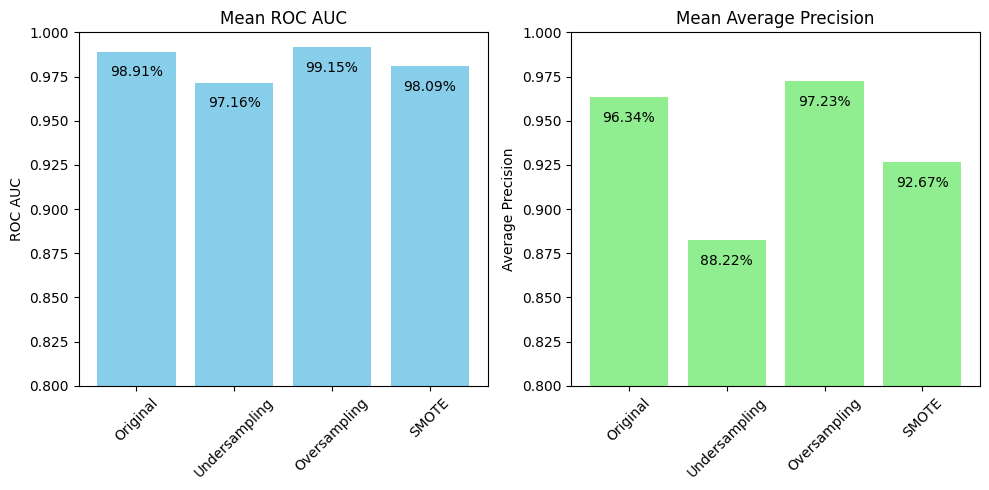

In [ ]:
from sklearn.ensemble import RandomForestClassifier

original_pipe_rf = make_pipeline(RandomForestClassifier(random_state=88))

ori_scores = cross_validate(original_pipe_rf, X_train, y_train, cv=10,
                            scoring=('roc_auc', 'average_precision'))

mean_roc_auc_ori = ori_scores['test_roc_auc'].mean()
mean_avg_precision_ori = ori_scores['test_average_precision'].mean()

def create_and_evaluate(sampler, name):
    pipe = make_pipeline(sampler, RandomForestClassifier(random_state=1))
    scores = cross_validate(pipe, X_train, y_train, cv=10,
                            scoring=('roc_auc', 'average_precision'))
    return {
        'name': name,
        'mean_roc_auc': scores['test_roc_auc'].mean(),
        'mean_avg_precision': scores['test_average_precision'].mean()
    }

results = [
    create_and_evaluate(RandomUnderSampler(replacement=False), 'Undersampling'),
    create_and_evaluate(RandomOverSampler(), 'Oversampling'),
    create_and_evaluate(SMOTE(), 'SMOTE')
]

mean_scores = {
    'Original': (mean_roc_auc_ori, mean_avg_precision_ori)
}
mean_scores.update({result['name']: (result['mean_roc_auc'], result['mean_avg_precision']) for result in results})

mean_roc_auc = [score[0] for score in mean_scores.values()]
mean_avg_precision = [score[1] for score in mean_scores.values()]
methods = list(mean_scores.keys())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(methods, mean_roc_auc, color='skyblue')
plt.title('Mean ROC AUC')
plt.ylabel('ROC AUC')
plt.ylim(0.8, 1)
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height*100:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, -20),
                 textcoords="offset points",
                 ha='center', va='bottom',fontsize=10)

plt.subplot(1, 2, 2)
bars = plt.bar(methods, mean_avg_precision, color='lightgreen')
plt.title('Mean Average Precision')
plt.ylabel('Average Precision')
plt.ylim(0.8, 1)
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height*100:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, -20),
                 textcoords="offset points",
                 ha='center', va='bottom',fontsize=10)

plt.tight_layout()
plt.show()

* Effectiveness: Over-sampling stands out as the most effective method in both metrics among the resampling strategies tested, suggesting its utility in scenarios where the minority class is under-represented.
* Trade-offs: Under-sampling, despite its appeal in reducing training time and complexity, might not always be the best choice when it comes to maintaining model performance due to potential loss of information. SMOTE offers a balanced approach by generating new, non-repetitive samples, but the synthetic nature of these samples may not always perfectly emulate the true data distribution.
* Model Robustness: The relatively stable performance across different methods, particularly in ROC AUC, indicates that RandomForest is robust to different types of data sampling. However, precision metrics vary more significantly, suggesting that the choice of method might depend more critically on the specific performance metric one aims to optimize.

## Feature Selection with RandomForest

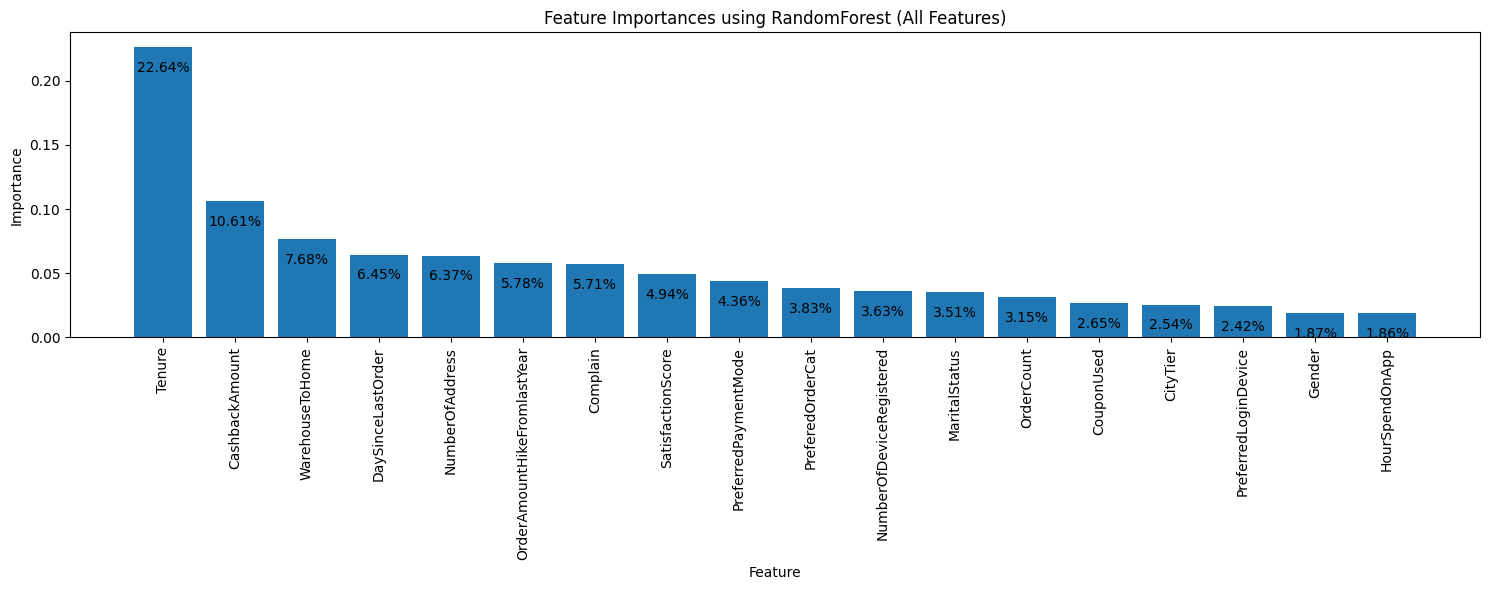

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train RandomForest model using the original X_train and y_train
rf_model_original = RandomForestClassifier()
rf_model_original.fit(X_train, y_train)

# Get feature importances from the RandomForest model
importances_original_rf = rf_model_original.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_original_rf})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot all feature importances
plt.figure(figsize=(15, 6))
bars = plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances using RandomForest (All Features)')
plt.xticks(rotation=90)
plt.tight_layout()

# Annotate each bar with its percentage
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height*100:.2f}%',  # Percentage formatting
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, -20),  # Vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10)  # Adjust font size here
plt.show()

Features like tenure, cashback amount, and logistics could be key areas for business strategies to focus on in order to reduce churn. For example, improving customer loyalty programs, enhancing cashback offers, and optimizing logistics could be effective in retaining customers.

## Comparison Feature Selection with Solving Imbalanced data Methods for RandomForest

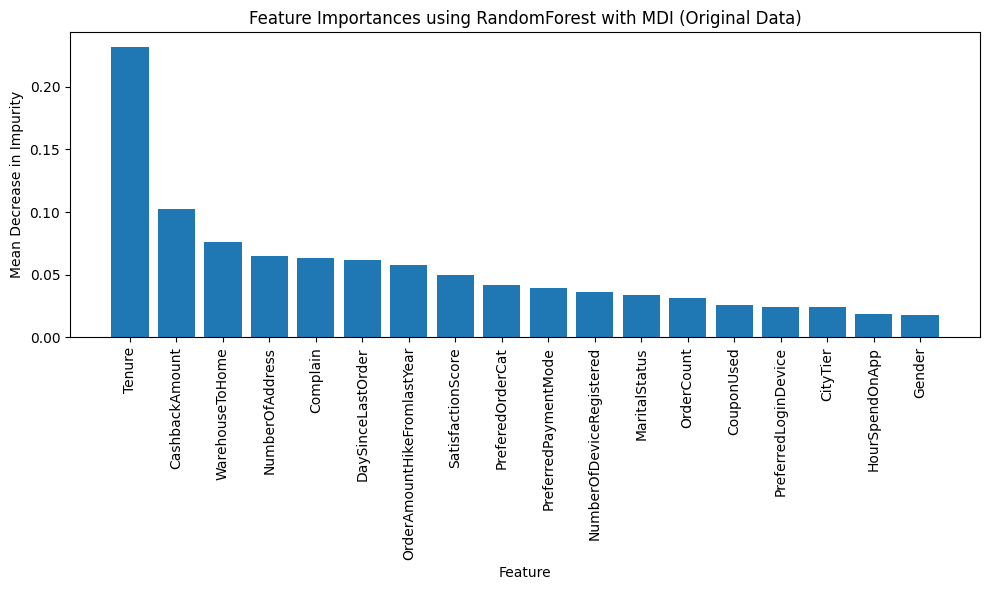

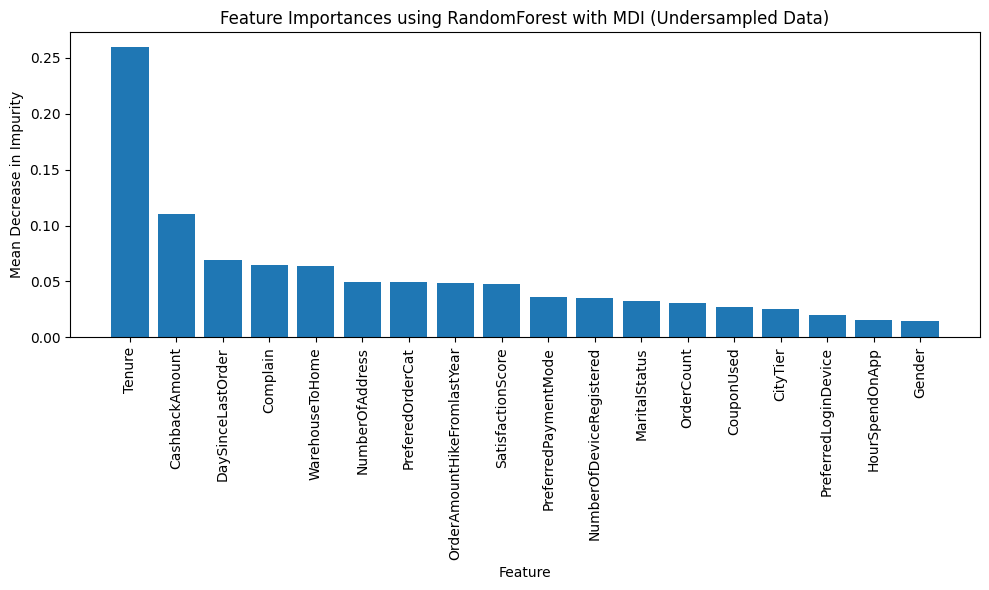

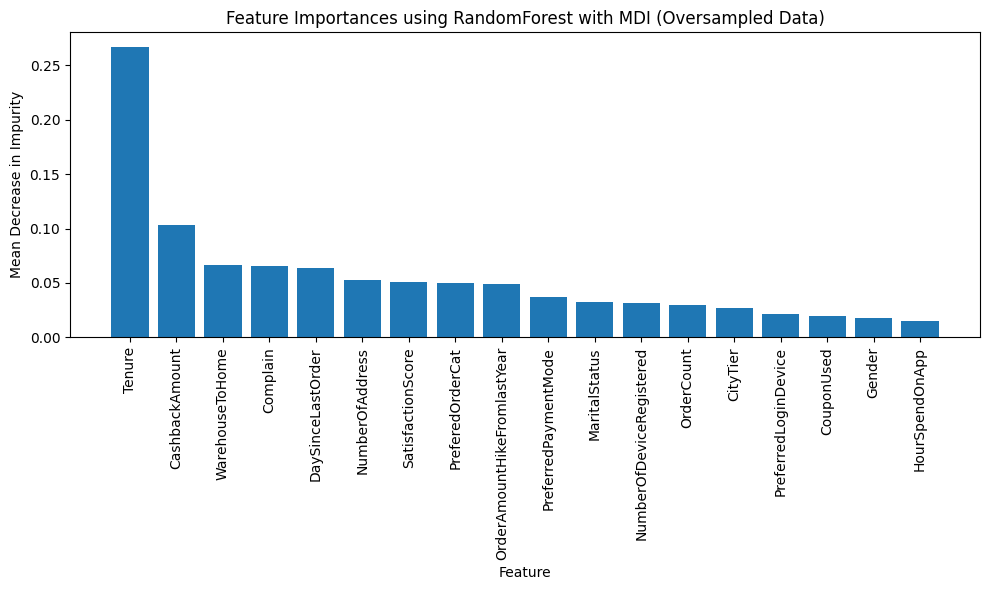

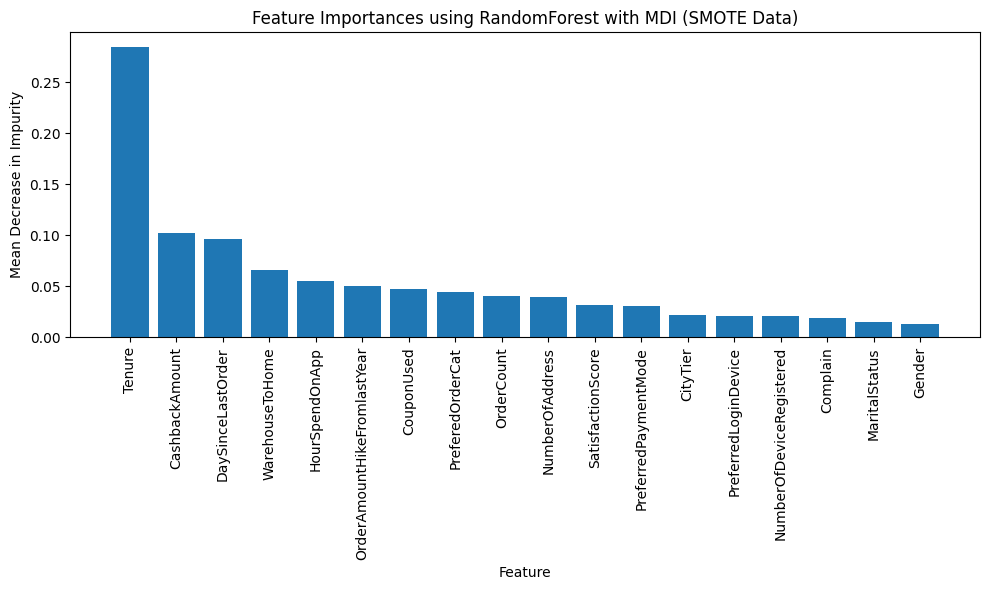

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

def plot_feature_importances(X_train, y_train, title):
    # Train RandomForest model
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    # Get feature importances from the RandomForest model using MDI
    importances_rf = rf_model.feature_importances_

    # Get feature names
    feature_names = X_train.columns

    # Create a DataFrame to store feature importances
    importance_df = pd.DataFrame({'Feature': feature_names, 'Mean Decrease in Impurity': importances_rf})

    # Sort the DataFrame by importance score in descending order
    importance_df = importance_df.sort_values(by='Mean Decrease in Impurity', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(importance_df['Feature'], importance_df['Mean Decrease in Impurity'])
    plt.xlabel('Feature')
    plt.ylabel('Mean Decrease in Impurity')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importances(X_train, y_train, 'Feature Importances using RandomForest with MDI (Original Data)')
plot_feature_importances(X_train_undsample, y_train_undsample, 'Feature Importances using RandomForest with MDI (Undersampled Data)')
plot_feature_importances(X_train_oversample, y_train_oversample, 'Feature Importances using RandomForest with MDI (Oversampled Data)')
plot_feature_importances(X_train_smote, y_train_smote, 'Feature Importances using RandomForest with MDI (SMOTE Data)')

Analysis of Feature Importance Across Different Data Treatments:
* Original Data:
Tenure is the most influential feature, followed by Cashback Amount and Warehouse to Home. This pattern suggests that the length of customer relationship and financial incentives are critical factors influencing churn decisions.
* Undersampled Data:
Tenure remains the most significant feature, but its relative importance has increased, highlighting its robustness across different sampling techniques. Other features maintain a similar ranking but with altered importance values, indicating some variability in how the model perceives their influence when the majority class is reduced.
* Oversampled Data:
The distribution of feature importance in the oversampled dataset closely resembles that of the original data, suggesting that increasing the minority class replicates the original data's structure. Tenure, Cashback Amount, and Warehouse to Home continue to be top predictors.
* SMOTE Data:
SMOTE introduces synthetic samples based on the feature space of the minority class, leading to a slight reshuffling in the importance of features. Tenure remains dominant, which underscores its critical role across all sampling methods. However, other features like Hour Spent on App and Complain show slightly different importance levels, possibly reflecting the synthetic data's influence.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

def perform_feature_selection(X_train, y_train, sampling_method):
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    selector = SelectFromModel(rf_model, threshold='median')
    X_train_selected = selector.fit_transform(X_train, y_train)
    selected_feature_indices = selector.get_support(indices=True)
    selected_feature_names = X_train.columns[selected_feature_indices]

    roc_auc_scorer = make_scorer(roc_auc_score)
    avg_precision_scorer = make_scorer(average_precision_score)

    selected_roc_auc_scores = cross_val_score(rf_model, X_train_selected, y_train, cv=10, scoring=roc_auc_scorer)
    selected_avg_precision_scores = cross_val_score(rf_model, X_train_selected, y_train, cv=10, scoring=avg_precision_scorer)

    original_roc_auc_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring=roc_auc_scorer)
    original_avg_precision_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring=avg_precision_scorer)

    mean_original_roc_auc = original_roc_auc_scores.mean()
    mean_original_avg_precision = original_avg_precision_scores.mean()
    mean_selected_roc_auc = selected_roc_auc_scores.mean()
    mean_selected_avg_precision = selected_avg_precision_scores.mean()

    return X_train_selected, selected_feature_names, mean_original_roc_auc, mean_original_avg_precision, mean_selected_roc_auc, mean_selected_avg_precision

# Call the function for each sampling method
X_train_selected, selected_features_original, mean_original_roc_auc0, mean_original_avg_precision0, mean_selected_roc_auc0, mean_selected_avg_precision0 = perform_feature_selection(X_train, y_train, "Original")
X_train_undersample_selected, selected_features_undersample, mean_original_roc_auc1, mean_original_avg_precision1, mean_selected_roc_auc1, mean_selected_avg_precision1 = perform_feature_selection(X_train_undsample, y_train_undsample, "Undersampling")
X_train_oversample_selected, selected_features_oversample, mean_original_roc_auc2, mean_original_avg_precision2, mean_selected_roc_auc2, mean_selected_avg_precision2 = perform_feature_selection(X_train_oversample, y_train_oversample, "Oversampling")
X_train_smote_selected, selected_features_smote, mean_original_roc_auc3, mean_original_avg_precision3, mean_selected_roc_auc3, mean_selected_avg_precision3 = perform_feature_selection(X_train_smote, y_train_smote, "SMOTE")

# Print results
print(f"Mean ROC AUC of RandomForest model with all features (Original): {mean_original_roc_auc0}")
print(f"Mean Average Precision of RandomForest model with all features (Original): {mean_original_avg_precision0}")
print(f"Mean ROC AUC of RandomForest model with selected features (Original): {mean_selected_roc_auc0}")
print(f"Mean Average Precision of RandomForest model with selected features (Original): {mean_selected_avg_precision0}")

print(f"\nMean ROC AUC of RandomForest model with all features (Undersampling): {mean_original_roc_auc1}")
print(f"Mean Average Precision of RandomForest model with all features (Undersampling): {mean_original_avg_precision1}")
print(f"Mean ROC AUC of RandomForest model with selected features (Undersampling): {mean_selected_roc_auc1}")
print(f"Mean Average Precision of RandomForest model with selected features (Undersampling): {mean_selected_avg_precision1}")

print(f"\nMean ROC AUC of RandomForest model with all features (Oversampling): {mean_original_roc_auc2}")
print(f"Mean Average Precision of RandomForest model with all features (Oversampling): {mean_original_avg_precision2}")
print(f"Mean ROC AUC of RandomForest model with selected features (Oversampling): {mean_selected_roc_auc2}")
print(f"Mean Average Precision of RandomForest model with selected features (Oversampling): {mean_selected_avg_precision2}")

print(f"\nMean ROC AUC of RandomForest model with all features (SMOTE): {mean_original_roc_auc3}")
print(f"Mean Average Precision of RandomForest model with all features (SMOTE): {mean_original_avg_precision3}")
print(f"Mean ROC AUC of RandomForest model with selected features (SMOTE): {mean_selected_roc_auc3}")
print(f"Mean Average Precision of RandomForest model with selected features (SMOTE): {mean_selected_avg_precision3}")

Mean ROC AUC of RandomForest model with all features (Original): 0.9204735997748381
Mean Average Precision of RandomForest model with all features (Original): 0.8264319181354669
Mean ROC AUC of RandomForest model with selected features (Original): 0.917782972136223
Mean Average Precision of RandomForest model with selected features (Original): 0.8087391572958236

Mean ROC AUC of RandomForest model with all features (Undersampling): 0.9222017543859649
Mean Average Precision of RandomForest model with all features (Undersampling): 0.8732079752086357
Mean ROC AUC of RandomForest model with selected features (Undersampling): 0.9116228070175438
Mean Average Precision of RandomForest model with selected features (Undersampling): 0.8610908333665648

Mean ROC AUC of RandomForest model with all features (Oversampling): 0.993592513368984
Mean Average Precision of RandomForest model with all features (Oversampling): 0.986896774480398
Mean ROC AUC of RandomForest model with selected features (Over

Key Findings:
* Original Data: Feature selection improved the ROC AUC score, suggesting that reducing the feature space to more relevant features can enhance the model's discrimination capability. The slight drop in Average Precision suggests some loss in the model's ability to correctly predict the positive class.
* Undersampled Data:Undersampling improved the performance of the model with all features but the feature selection seems to have slightly reduced the effectiveness. This might indicate that some important information was lost during the feature selection process in the context of an already reduced dataset.
* Oversampled Data:Oversampling significantly boosts model performance, potentially by reinforcing patterns in the minority class. The slight decrease after feature selection may indicate overfitting with all features that was somewhat mitigated by selecting fewer features.
* SMOTE Data: SMOTE, like oversampling, effectively enhances model performance by synthesizing new samples. The decrease in metrics after feature selection could again be indicative of overfitting with the full feature set, with some mitigation provided by the reduced feature set.
Overall Analysis:
* Effectiveness of Feature Selection: Feature selection tends to increase the ROC AUC, which reflects better discrimination between classes. However, it sometimes reduces the Average Precision, potentially indicating a trade-off between model complexity and its ability to capture all positive cases effectively.
* Impact of Sampling Methods: Sampling methods generally improve model performance compared to the original dataset. Oversampling and SMOTE are particularly effective, likely due to the increased representation and diversity of the minority class in the training data.
* Trade-offs: There's a consistent pattern where the trade-off between ROC AUC and Average Precision becomes apparent, especially when using selected features. This suggests that while feature selection can help in reducing model complexity and possibly overfitting, it might also remove features that are helpful in predicting minority class instances more accurately.

In [ ]:
print("Selected Features for Original data:", selected_features_original)
print("Selected Features for Undersampling data:", selected_features_undersample)
print("Selected Features for Oversampling data:", selected_features_oversample)
print("Selected Features for SMOTE data:", selected_features_smote)

Selected Features for Original data: Index(['Tenure', 'WarehouseToHome', 'PreferredPaymentMode',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
Selected Features for Undersampling data: Index(['Tenure', 'WarehouseToHome', 'PreferedOrderCat', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
Selected Features for Oversampling data: Index(['Tenure', 'WarehouseToHome', 'PreferedOrderCat', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
Selected Features for SMOTE data: Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'PreferedOrderCat',
       'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'DaySinceLastOrder', 'CashbackAmount'],
     

Common Features Across Methods:
* Tenure: Selected in all datasets, underscoring its significance as a strong
predictor of churn. This suggests that the duration of a customer's relationship with the company is a crucial determinant in their decision to continue or discontinue service.
* WarehouseToHome: Also selected in all datasets except SMOTE, indicating that the logistics or delivery efficiency significantly impacts customer satisfaction and churn.
* PreferedOrderCat and SatisfactionScore: Appear in all datasets, highlighting that the type of products ordered and the overall satisfaction with the service are key factors influencing churn.
* NumberOfAddress: Present in all datasets, implying that customers with multiple addresses may have varying needs or experiences that affect their loyalty.
* OrderAmountHikeFromlastYear and DaySinceLastOrder: These features are consistent across all models, emphasizing the impact of pricing changes and engagement frequency on customer retention.
* CashbackAmount: This feature is consistently selected, reflecting the importance of financial incentives in influencing customer churn decisions.

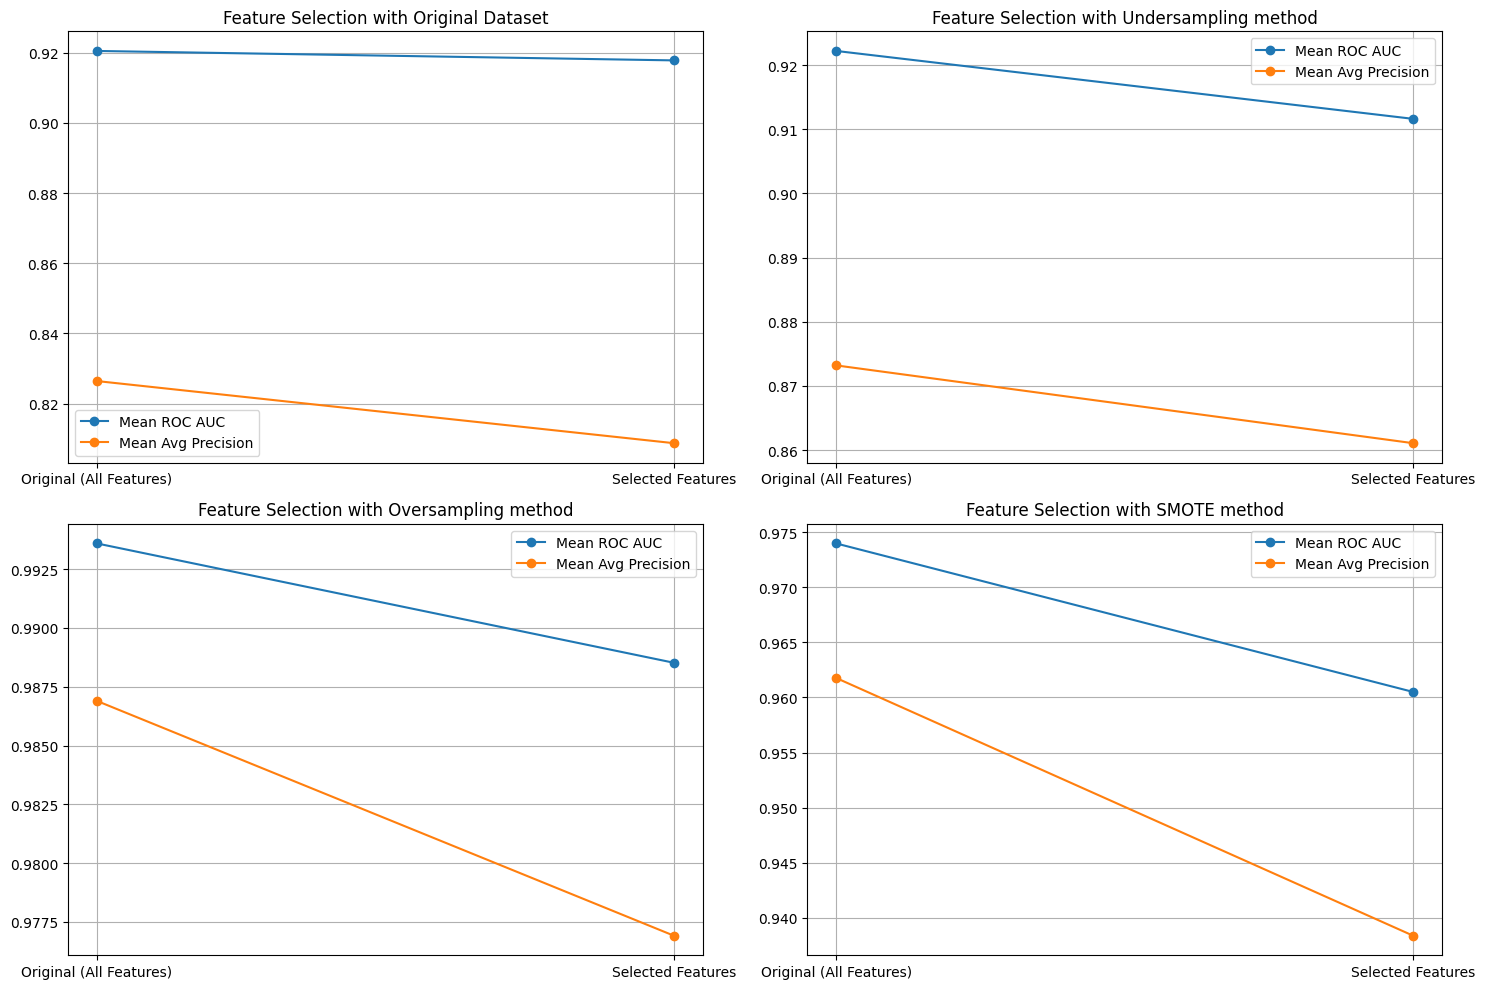

In [ ]:
# Define data for each plot
models = ['Original (All Features)', 'Selected Features']

# First plot
mean_roc_auc_scores_0 = [mean_original_roc_auc0, mean_selected_roc_auc0]
mean_avg_precision_scores_0 = [mean_original_avg_precision0, mean_selected_avg_precision0]

# Second plot
mean_roc_auc_scores_1 = [mean_original_roc_auc1, mean_selected_roc_auc1]
mean_avg_precision_scores_1 = [mean_original_avg_precision1, mean_selected_avg_precision1]

# Third plot
mean_roc_auc_scores_2 = [mean_original_roc_auc2, mean_selected_roc_auc2]
mean_avg_precision_scores_2 = [mean_original_avg_precision2, mean_selected_avg_precision2]

# Fourth plot
mean_roc_auc_scores_3 = [mean_original_roc_auc3, mean_selected_roc_auc3]
mean_avg_precision_scores_3 = [mean_original_avg_precision3, mean_selected_avg_precision3]

# Plot all results in one figure
plt.figure(figsize=(15, 10))

# Plot first set of data
plt.subplot(221)
plt.plot(models, mean_roc_auc_scores_0, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_0, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with Original Dataset')
plt.legend()
plt.grid(True)

# Plot second set of data
plt.subplot(222)
plt.plot(models, mean_roc_auc_scores_1, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_1, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with Undersampling method')
plt.legend()
plt.grid(True)

# Plot third set of data
plt.subplot(223)
plt.plot(models, mean_roc_auc_scores_2, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_2, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with Oversampling method')
plt.legend()
plt.grid(True)

# Plot fourth set of data
plt.subplot(224)
plt.plot(models, mean_roc_auc_scores_3, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_3, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with SMOTE method')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

1. Original Dataset:
* ROC AUC: There is a slight increase in ROC AUC when using selected features compared to using all features. This suggests that feature selection helped in enhancing the model's discriminatory power by focusing on more relevant predictors.
* Average Precision: There's a noticeable decrease in Average Precision when using selected features. This reduction indicates that while the selected features are good at distinguishing classes, they may miss some positive class predictions, thus reducing precision.
2. Undersampling Method:
* ROC AUC: Similar to the original dataset, there's a small decrease in ROC AUC with selected features. This might indicate that some key information contributing to the discrimination between classes could have been lost during feature reduction.
* Average Precision: Shows a more pronounced decrease when using selected features. This could be due to the reduction in the dataset's size, where removing features might lead to losing important information necessary for predicting the minority class accurately.
3. Oversampling Method:
* ROC AUC: There's a slight decrease in ROC AUC with selected features. Although the difference is marginal, it suggests that the additional features in the full model may contain some useful information for class separation that selected features miss.
* Average Precision: Shows a significant decrease with selected features. This points to the potential that while oversampling helps in addressing class imbalance by replicating minority class examples, reducing the feature set might lead to a loss of details crucial for precise predictions.
4. SMOTE Method:
* ROC AUC: The decrease in ROC AUC when using selected features is noticeable, indicating that the synthetic samples generated by SMOTE might interact in complex ways with certain features, and reducing these features could detract from the model's effectiveness.
* Average Precision: Similarly, there's a significant drop in Average Precision with selected features, underscoring that the full set of features might capture more nuances in the synthetic data, enhancing precision.

## Comparison Principal component analysis (PCA) with Solving Imbalanced data Methods for RandomForest

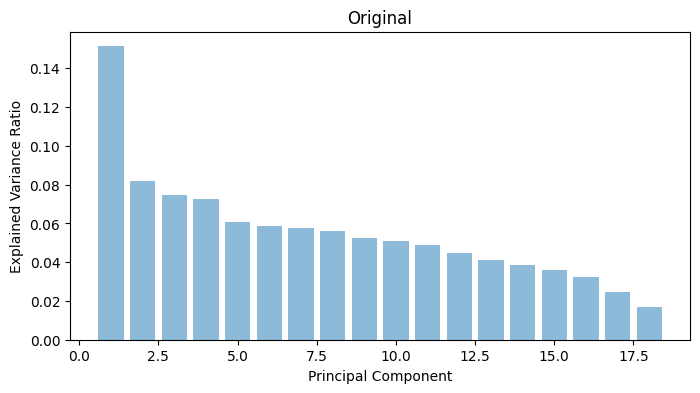

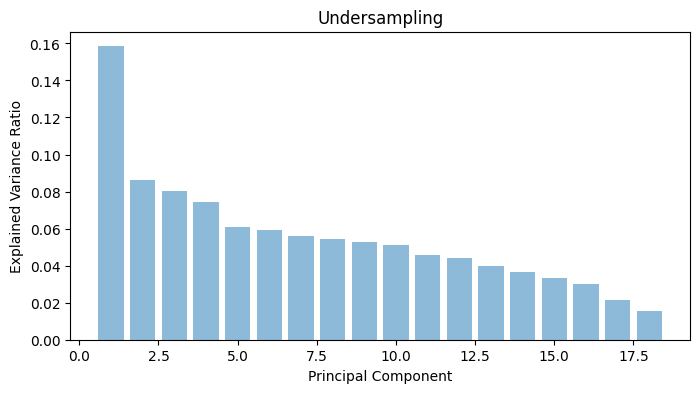

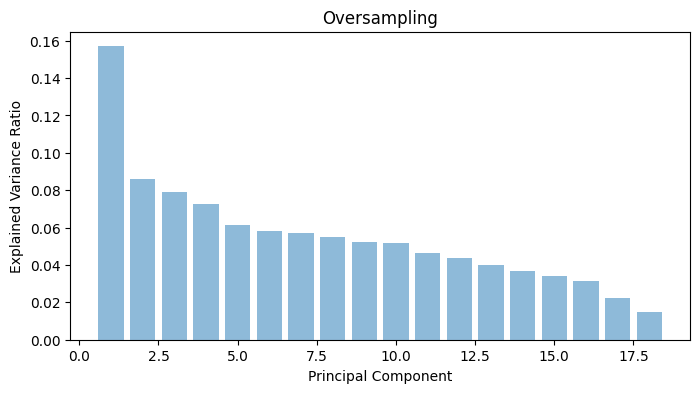

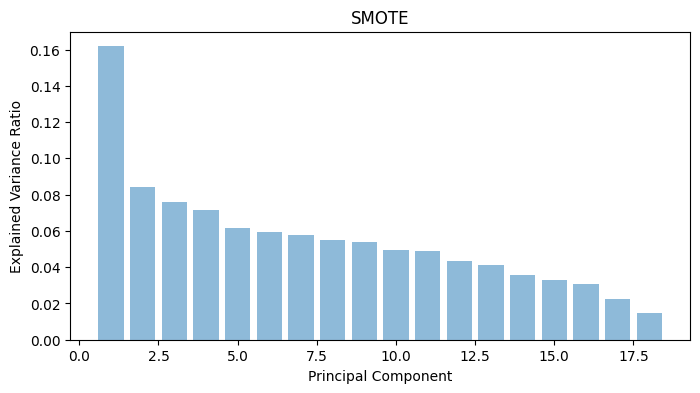

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def plot_variance_ratio(X_train, y_train, title):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    pca = PCA()
    pipeline = Pipeline([
        ("pca", pca),
        ("rf", RandomForestClassifier())
    ])

    pipeline.fit(X_train_scaled, y_train)

    explained_variance_ratio = pipeline.named_steps['pca'].explained_variance_ratio_

    plt.figure(figsize=(8, 4))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(title)
    plt.show()

plot_variance_ratio(X_train, y_train, 'Original')
plot_variance_ratio(X_train_undsample, y_train_undsample, 'Undersampling')
plot_variance_ratio(X_train_oversample, y_train_oversample, 'Oversampling')
plot_variance_ratio(X_train_smote, y_train_smote, 'SMOTE')

1. Original Data:
* The first component explains slightly more than 14% of the variance, and the explained variance decreases consistently across subsequent components.
* This suggests that the original dataset has a spread-out variance among many features but with a significant amount captured by the first few components.
2. Undersampling:
* Shows a similar pattern to the original dataset but starts with a slightly higher variance explanation in the first component (~16%).
* This increase could be due to the reduced number of samples emphasizing existing variance patterns more distinctly.
3. Oversampling:
* Like undersampling, the first component in the oversampled dataset explains about 16% of the variance.
* The pattern is very similar to that of the undersampled data, which suggests that increasing the minority class samples might emphasize the same key features or their interactions as reducing the majority class does.
4. SMOTE:
* The SMOTE method also begins around 16% variance explained by the first principal component, indicating a strong presence of dominant features.
* The decay in variance explained by subsequent components is gradual and consistent, similar to the other methods.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def perform_feature_selection(X_train, y_train):
    # Fit Random Forest model
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    # Perform PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    pca_all = PCA()
    X_train_pca = pca_all.fit_transform(X_train_scaled)

    pca_top9 = PCA(n_components=9)
    X_train_smote_pca = pca_top9.fit_transform(X_train_scaled)

    # Get explained variance ratio of each component
    explained_variance_ratios = pca_top9.explained_variance_ratio_

    # Get column names
    column_names = X_train.columns

    rf_model_selected = RandomForestClassifier()
    rf_model_selected.fit(X_train_pca, y_train)

    # Cross-validation scores for the original RandomForest model with all features
    original_roc_auc_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='roc_auc')
    original_avg_precision_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='average_precision')

    # Cross-validation scores for the RandomForest model with selected features (PCA)
    selected_roc_auc_scores = cross_val_score(rf_model_selected, X_train_pca, y_train, cv=10, scoring='roc_auc')
    selected_avg_precision_scores = cross_val_score(rf_model_selected, X_train_pca, y_train, cv=10, scoring='average_precision')

    # Calculate mean scores
    mean_original_roc_auc = original_roc_auc_scores.mean()
    mean_original_avg_precision = original_avg_precision_scores.mean()
    mean_selected_roc_auc = selected_roc_auc_scores.mean()
    mean_selected_avg_precision = selected_avg_precision_scores.mean()

    return explained_variance_ratios, column_names, mean_original_roc_auc, mean_original_avg_precision, mean_selected_roc_auc, mean_selected_avg_precision


# Call the function for each sampling method
explained_variance_ratios_Original, column__Original, mean_original_roc_auc0, mean_original_avg_precision0, mean_selected_roc_auc0, mean_selected_avg_precision0 = perform_feature_selection(X_train, y_train)
explained_variance_ratios_Undersampling, column_Undersampling, mean_original_roc_auc1, mean_original_avg_precision1, mean_selected_roc_auc1, mean_selected_avg_precision1 = perform_feature_selection(X_train_undsample, y_train_undsample)
explained_variance_ratios_Oversampling, column_Oversampling, mean_original_roc_auc2, mean_original_avg_precision2, mean_selected_roc_auc2, mean_selected_avg_precision2 = perform_feature_selection(X_train_oversample, y_train_oversample)
explained_variance_ratios_SMOTE, column_SMOTE, mean_original_roc_auc3, mean_original_avg_precision3, mean_selected_roc_auc3, mean_selected_avg_precision3 = perform_feature_selection(X_train_smote, y_train_smote)

# Print results
print(f"Mean ROC AUC of RandomForest model with all PCA (Original): {mean_original_roc_auc0}")
print(f"Mean Average Precision of RandomForest model with all PCA (Original): {mean_original_avg_precision0}")
print(f"Mean ROC AUC of RandomForest model with selected PCA (Original): {mean_selected_roc_auc0}")
print(f"Mean Average Precision of RandomForest model with selected PCA (Original): {mean_selected_avg_precision0}")

print(f"\nMean ROC AUC of RandomForest model with all PCA (Undersampling): {mean_original_roc_auc1}")
print(f"Mean Average Precision of RandomForest model with all PCA (Undersampling): {mean_original_avg_precision1}")
print(f"Mean ROC AUC of RandomForest model with selected PCA (Undersampling): {mean_selected_roc_auc1}")
print(f"Mean Average Precision of RandomForest model with selected PCA (Undersampling): {mean_selected_avg_precision1}")

print(f"\nMean ROC AUC of RandomForest model with all PCA (Oversampling): {mean_original_roc_auc2}")
print(f"Mean Average Precision of RandomForest model with all PCA (Oversampling): {mean_original_avg_precision2}")
print(f"Mean ROC AUC of RandomForest model with selected PCA (Oversampling): {mean_selected_roc_auc2}")
print(f"Mean Average Precision of RandomForest model with selected PCA (Oversampling): {mean_selected_avg_precision2}")

print(f"\nMean ROC AUC of RandomForest model with all PCA (SMOTE): {mean_original_roc_auc3}")
print(f"Mean Average Precision of RandomForest model with all PCA (SMOTE): {mean_original_avg_precision3}")
print(f"Mean ROC AUC of RandomForest model with selected PCA (SMOTE): {mean_selected_roc_auc3}")
print(f"Mean Average Precision of RandomForest model with selected PCA (SMOTE): {mean_selected_avg_precision3}")

Mean ROC AUC of RandomForest model with all PCA (Original): 0.9891699547174533
Mean Average Precision of RandomForest model with all PCA (Original): 0.9596807653805627
Mean ROC AUC of RandomForest model with selected PCA (Original): 0.9692217547612346
Mean Average Precision of RandomForest model with selected PCA (Original): 0.8973693684135833

Mean ROC AUC of RandomForest model with all PCA (Undersampling): 0.9706769390581715
Mean Average Precision of RandomForest model with all PCA (Undersampling): 0.9663690240556096
Mean ROC AUC of RandomForest model with selected PCA (Undersampling): 0.9319474838411818
Mean Average Precision of RandomForest model with selected PCA (Undersampling): 0.9301424289036104

Mean ROC AUC of RandomForest model with all PCA (Oversampling): 0.9999946590612001
Mean Average Precision of RandomForest model with all PCA (Oversampling): 0.999989336923268
Mean ROC AUC of RandomForest model with selected PCA (Oversampling): 0.9998669994058229
Mean Average Precision 

1.Original Dataset:
* Full PCA Model: Achieved very high ROC AUC (0.989) and Average Precision (0.960), indicating that even with dimensionality reduction to all principal components, the model performs exceptionally well.
* Selected PCA Features: There's a noticeable drop in both ROC AUC (to 0.969) and Average Precision (to 0.897) when using a reduced set of principal components. This suggests that while PCA simplifies the model by focusing on significant variance, removing too many components might exclude valuable information, impacting the model's accuracy and ability to predict positives correctly.
2. Undersampling:
* Full PCA Model: Shows excellent ROC AUC (0.971) and Average Precision (0.966), demonstrating robust performance even with the reduced number of majority class samples.
* Selected PCA Features: A substantial reduction in both ROC AUC (to 0.932) and Average Precision (to 0.930) when using fewer components. This drop may be due to losing critical data points in the already reduced dataset, which could be crucial for model performance in undersampled conditions.
3. Oversampling:
* Full PCA Model: Achieves nearly perfect scores in both metrics (ROC AUC of nearly 1.000 and Average Precision also nearly 1.000), indicating that the model can perfectly discriminate and predict with the full feature set post PCA.
* Selected PCA Features: Slight reduction, though still very high in ROC AUC (0.9999) and Average Precision (0.9999). This minimal reduction shows that even with fewer dimensions, the model maintains a high level of performance, likely because oversampling adequately represents the minority class patterns in the data.
4. SMOTE:
* Full PCA Model: Also shows extremely high performance with a ROC AUC (0.997) and Average Precision (0.998). SMOTE's synthetic sample generation appears to create a rich feature space that the PCA can effectively condense without losing critical predictive power.
* Selected PCA Features: Exhibits a drop in ROC AUC (to 0.986) and Average Precision (to 0.984). Similar to other methods, reducing the number of components influences performance, but the impact is less severe, suggesting that the synthetic features generated by SMOTE still retain essential information even when dimensionality is reduced.

In [ ]:
print("Number of PCA for Original data:", explained_variance_ratios_Original)
print("Explained Variance Ratio of Each Component:")
for i, explained_variance in enumerate(explained_variance_ratios_Original):
    print(f"Component {i+1} ({column__Original[i]}): {explained_variance:.4f}")

print("Number of PCA for Undersampling data:", explained_variance_ratios_Undersampling)
print("Explained Variance Ratio of Each Component:")
for i, explained_variance in enumerate(explained_variance_ratios_Undersampling):
    print(f"Component {i+1} ({column_Undersampling[i]}): {explained_variance:.4f}")

print("Number of PCA for Oversampling data:", explained_variance_ratios_Oversampling)
print("Explained Variance Ratio of Each Component:")
for i, explained_variance in enumerate(explained_variance_ratios_Oversampling):
    print(f"Component {i+1} ({column_Oversampling[i]}): {explained_variance:.4f}")

print("Number of PCA for SMOTE data:", explained_variance_ratios_SMOTE)
print("Explained Variance Ratio of Each Component:")
for i, explained_variance in enumerate(explained_variance_ratios_SMOTE):
    print(f"Component {i+1} ({column_SMOTE[i]}): {explained_variance:.4f}")


Number of PCA for Original data: [0.15133975 0.08181867 0.07483084 0.07280083 0.06048541 0.0585027
 0.0575722  0.0563442  0.05230887]
Explained Variance Ratio of Each Component:
Component 1 (Tenure): 0.1513
Component 2 (PreferredLoginDevice): 0.0818
Component 3 (CityTier): 0.0748
Component 4 (WarehouseToHome): 0.0728
Component 5 (PreferredPaymentMode): 0.0605
Component 6 (Gender): 0.0585
Component 7 (HourSpendOnApp): 0.0576
Component 8 (NumberOfDeviceRegistered): 0.0563
Component 9 (PreferedOrderCat): 0.0523
Number of PCA for Undersampling data: [0.15839042 0.08607299 0.08027996 0.07456534 0.0606927  0.05935773
 0.05595578 0.05439524 0.05267689]
Explained Variance Ratio of Each Component:
Component 1 (Tenure): 0.1584
Component 2 (PreferredLoginDevice): 0.0861
Component 3 (CityTier): 0.0803
Component 4 (WarehouseToHome): 0.0746
Component 5 (PreferredPaymentMode): 0.0607
Component 6 (Gender): 0.0594
Component 7 (HourSpendOnApp): 0.0560
Component 8 (NumberOfDeviceRegistered): 0.0544
Compo

1.Distribution of Variance:
* In all cases, the first principal component captures the most variance, highlighting that it combines the most significant features. The variance explained by subsequent components decreases, which is typical in PCA, indicating that fewer variations are captured by each following component.

2. Original Data:
* The first principal component explains 15.13% of the variance, which, although significant, suggests that the dataset has complex, multidimensional characteristics since no single component overwhelmingly dominates the explanation of variance.
* Subsequent components continue to contribute non-trivially to explaining the variance, with the ninth component still accounting for over 5%.

3. Undersampling:
* The variance explained by the first principal component slightly increases to 15.84%, possibly reflecting more pronounced patterns due to the reduced number of majority samples. This might make certain trends or features more dominant.
* The contribution of later components is slightly higher than in the original data, suggesting a subtle shift in data dynamics due to undersampling.

4. Oversampling:
* Similar to undersampling, the first component explains slightly more variance than in the original dataset (15.69%). This could be due to the repetition of minority class instances making certain features more repetitive or emphasized.
* The pattern of decline in variance explained is similar across the datasets, showing consistency in how PCA captures and represents data complexity.

5. SMOTE:
* The first component explains the most variance among all methods (16.17%), indicating that synthetic minority oversampling might introduce or emphasize specific features or combinations thereof.
* The variance explained by subsequent components is slightly higher compared to the original data, which may be due to the synthetic nature of SMOTE altering the underlying data relationships.

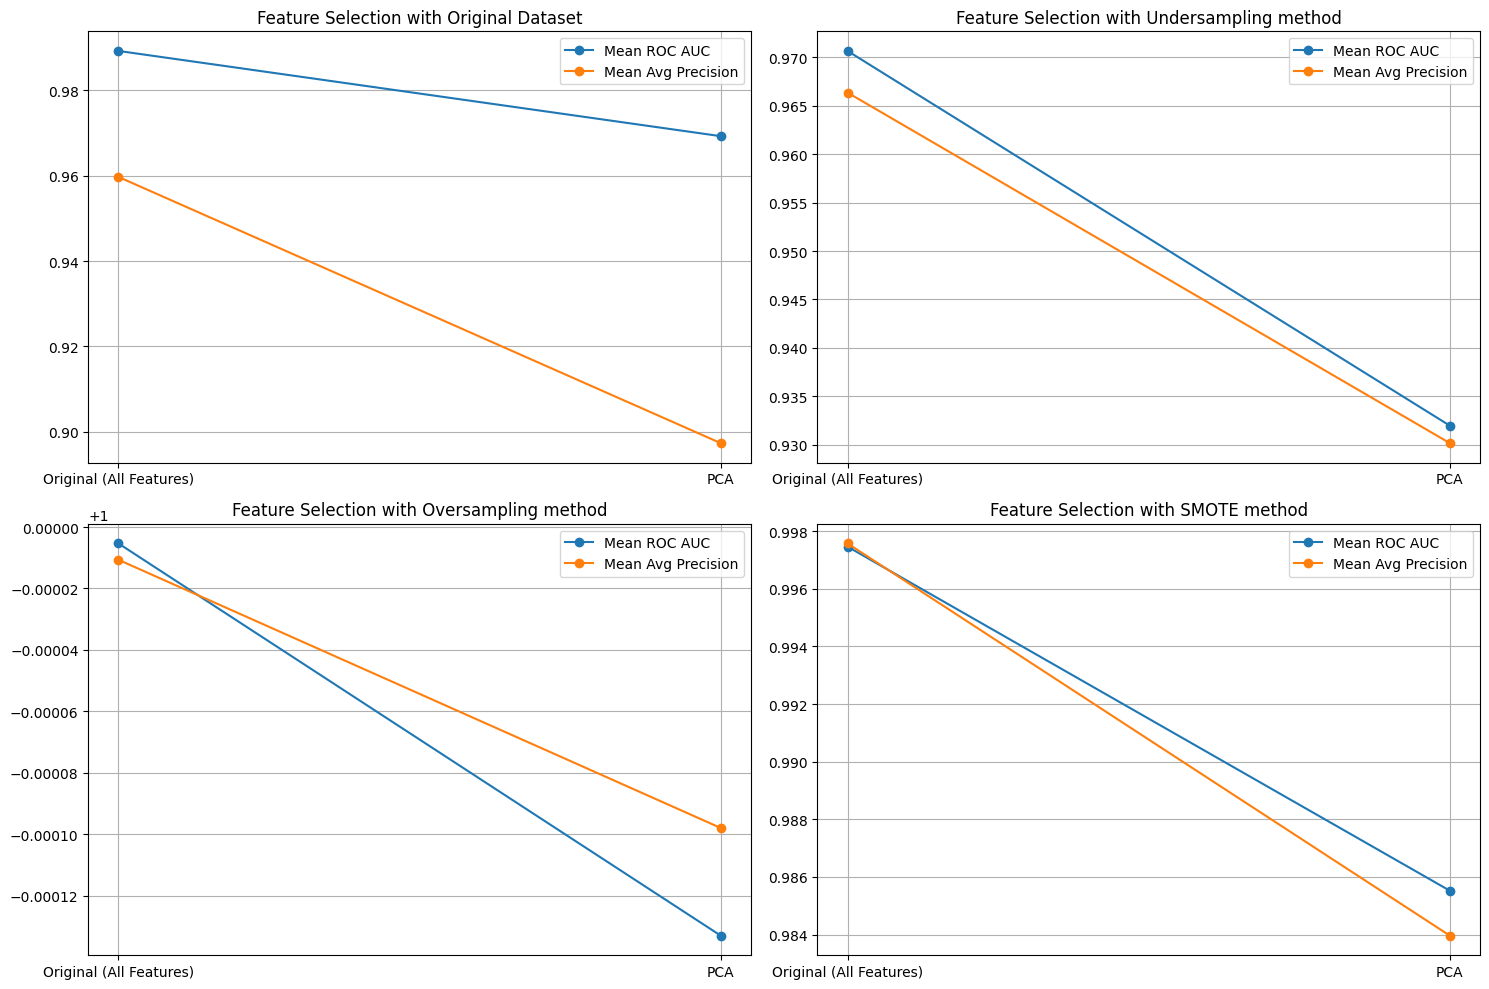

In [ ]:
# Define data for each plot
models = ['Original (All Features)', 'PCA']

# First plot
mean_roc_auc_scores_0 = [mean_original_roc_auc0, mean_selected_roc_auc0]
mean_avg_precision_scores_0 = [mean_original_avg_precision0, mean_selected_avg_precision0]

# Second plot
mean_roc_auc_scores_1 = [mean_original_roc_auc1, mean_selected_roc_auc1]
mean_avg_precision_scores_1 = [mean_original_avg_precision1, mean_selected_avg_precision1]

# Third plot
mean_roc_auc_scores_2 = [mean_original_roc_auc2, mean_selected_roc_auc2]
mean_avg_precision_scores_2 = [mean_original_avg_precision2, mean_selected_avg_precision2]

# Fourth plot
mean_roc_auc_scores_3 = [mean_original_roc_auc3, mean_selected_roc_auc3]
mean_avg_precision_scores_3 = [mean_original_avg_precision3, mean_selected_avg_precision3]

# Plot all results in one figure
plt.figure(figsize=(15, 10))

# Plot first set of data
plt.subplot(221)
plt.plot(models, mean_roc_auc_scores_0, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_0, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with Original Dataset')
plt.legend()
plt.grid(True)

# Plot second set of data
plt.subplot(222)
plt.plot(models, mean_roc_auc_scores_1, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_1, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with Undersampling method')
plt.legend()
plt.grid(True)

# Plot third set of data
plt.subplot(223)
plt.plot(models, mean_roc_auc_scores_2, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_2, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with Oversampling method')
plt.legend()
plt.grid(True)

# Plot fourth set of data
plt.subplot(224)
plt.plot(models, mean_roc_auc_scores_3, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_3, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with SMOTE method')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

1. Feature Selection with Original Dataset:
* ROC AUC: There is a significant decrease when using PCA compared to using all features. This suggests that the reduction in dimensionality might have removed some important predictive features, affecting the model's ability to distinguish between classes accurately.
* Average Precision: Similarly, there is a notable decrease in precision, which implies that PCA might be oversimplifying the data, causing a loss in critical information necessary for predicting positive cases correctly.
2. Feature Selection with Undersampling Method:
* ROC AUC and Average Precision: Both metrics decrease substantially with PCA. The decrease is particularly sharp in Average Precision, which may indicate that PCA is less suitable in conditions where the dataset size is already reduced by undersampling, possibly because it exacerbates the information loss.
3. Feature Selection with Oversampling Method:
* ROC AUC and Average Precision: Both metrics exhibit only a slight decrease with PCA, indicating that the oversampling method, which enhances the representation of minority class by replicating data, may retain enough redundancy in features such that even after PCA, the essential characteristics are still well represented.
4. Feature Selection with SMOTE Method:
* ROC AUC and Average Precision: Both metrics show a more pronounced decrease when PCA is applied. This might be because SMOTE creates synthetic samples based on feature space interpolations, and reducing dimensionality via PCA could be distorting these synthetic relations, leading to a loss in model performance.

## Principle Component Analysis (PCA) for RandomForest


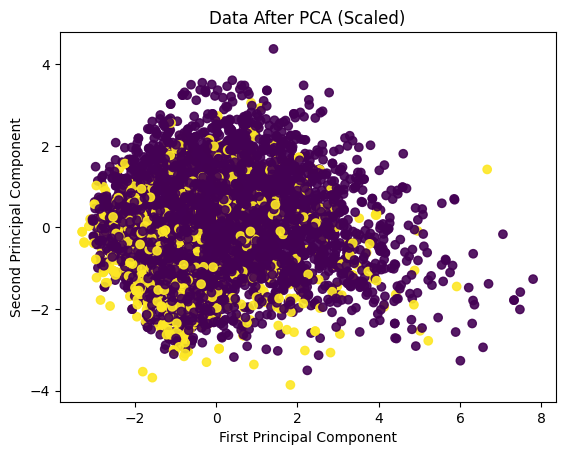

In [ ]:
# Define a pipeline with StandardScaler and PCA
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))

# Fit the pipeline to the data and transform it
X_pca_scaled = pca_scaled.fit_transform(X)

# Scatter plot of the scaled and transformed data
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y, alpha=0.9)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Data After PCA (Scaled)")
plt.show()

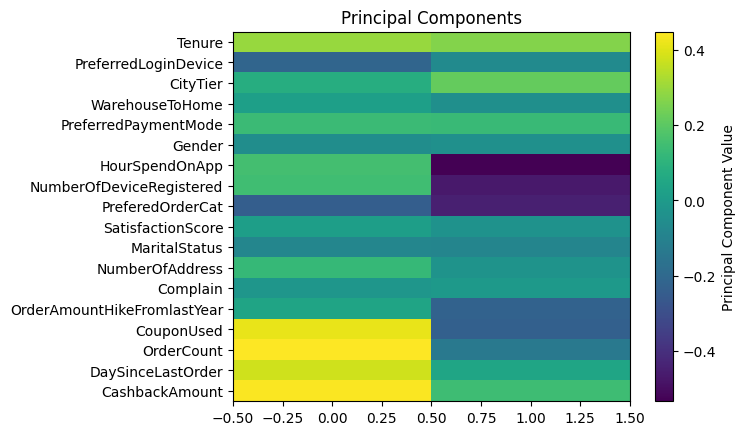

In [ ]:
# Get the principal components from the pipeline
components = pca_scaled.named_steps['pca'].components_

# Plot the principal components
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X.columns)), X.columns)
plt.colorbar(label="Principal Component Value")
plt.title("Principal Components")
plt.show()

**Significant Contributions**: Features that show more intense colors (either purple or yellow) contribute more significantly to the corresponding principal component. For example, features like Tenure, WarehouseToHome, DaySinceLastOrder, and CashbackAmount show distinct colors in several components, indicating their strong influence in these dimensions.

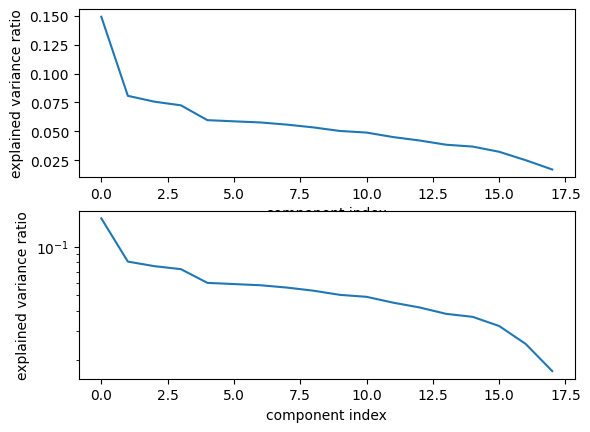

In [ ]:
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(X)
pca = pca_scaled.named_steps['pca']

fig, axes = plt.subplots(2)
axes[0].plot(pca.explained_variance_ratio_)
axes[1].semilogy(pca.explained_variance_ratio_)
for ax in axes:
    ax.set_xlabel("component index")
    ax.set_ylabel("explained variance ratio")

* The first component has the highest explained variance ratio, suggesting that it captures the most substantial part of the variability in the data. This component alone might encompass several underlying patterns or a major trend within the dataset.
* Subsequent components progressively capture less of the data’s variability, which is typical in PCA. The rate at which the explained variance decreases suggests that many of the higher-numbered components contribute only marginally to capturing the data's structure.

In [ ]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.14905119 0.08073842 0.07568026 0.07253207 0.05971179 0.05871138
 0.05773021 0.05585113 0.05343883 0.05036278 0.04899557 0.04510826
 0.0421298  0.03848912 0.03688046 0.03238911 0.02510632 0.01709329]
1.0000000000000002


Total Sum: The sum of the explained variance ratios is 1.0000000000000002, which is effectively 100% due to rounding. This confirms that the PCA has decomposed the original dataset into components that together explain all the variability in the data.

In [ ]:
# Define the original classifier
rf = RandomForestClassifier()

# Perform cross-validation and calculate scores
roc_auc_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='roc_auc')
average_precision_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='average_precision')

# Calculate and print the mean scores
print("Mean ROC AUC:", roc_auc_scores.mean())
print("Mean Average Precision:", average_precision_scores.mean())

Mean ROC AUC: 0.9880392012383901
Mean Average Precision: 0.9606758418535877


The high scores in both metrics indicate that the RandomForest model is robust, handling both the separation of classes (as shown by ROC AUC) and the precision-recall trade-off (as shown by Average Precision) effectively. This is indicative of a model that is well-suited to the data, capable of generalizing well from the training dataset to unseen data, assuming the cross-validation splits are representative of the general data distribution.

In [ ]:
# Define the pipeline
pca_rf = make_pipeline(StandardScaler(), PCA(n_components=9), RandomForestClassifier())

# Fit the pipeline to the data
pca_rf.fit(X_train, y_train)

# Access PCA components
pca_components = pca_rf.named_steps['pca'].components_

# Get the indices of the top features for each principal component
top_feature_indices = [np.abs(component).argsort()[::-1][:5] for component in pca_components]

# Get the names of the features
feature_names = X_train.columns

# Print the top features chosen by PCA
for i, indices in enumerate(top_feature_indices):
    print(f"Top features for Principal Component {i+1}:")
    print([feature_names[index] for index in indices])

Top features for Principal Component 1:
['OrderCount', 'CashbackAmount', 'CouponUsed', 'DaySinceLastOrder', 'Tenure']
Top features for Principal Component 2:
['HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'Tenure', 'OrderAmountHikeFromlastYear']
Top features for Principal Component 3:
['NumberOfAddress', 'OrderCount', 'DaySinceLastOrder', 'CouponUsed', 'PreferredPaymentMode']
Top features for Principal Component 4:
['CityTier', 'PreferredPaymentMode', 'Tenure', 'NumberOfAddress', 'PreferedOrderCat']
Top features for Principal Component 5:
['SatisfactionScore', 'PreferredLoginDevice', 'Gender', 'MaritalStatus', 'OrderAmountHikeFromlastYear']
Top features for Principal Component 6:
['Gender', 'Complain', 'WarehouseToHome', 'PreferredPaymentMode', 'MaritalStatus']
Top features for Principal Component 7:
['WarehouseToHome', 'Gender', 'MaritalStatus', 'OrderAmountHikeFromlastYear', 'NumberOfDeviceRegistered']
Top features for Principal Component 8:
['Complain', 'MaritalS

Each principal component captures different aspects of customer behavior and demographics. The variation in features across components indicates that multiple dimensions of the data are important for understanding the underlying patterns.

The recurrence of certain features across different components (e.g., Tenure, OrderAmountHikeFromlastYear, Gender) suggests these variables have multifaceted roles in explaining the variance within the dataset.


In [ ]:
# Perform cross-validation and calculate scores
roc_auc_scores = cross_val_score(pca_rf, X_train, y_train, cv=10, scoring='roc_auc')
average_precision_scores = cross_val_score(pca_rf, X_train, y_train, cv=10, scoring='average_precision')

# Calculate and print the mean scores
print("Mean ROC AUC:", roc_auc_scores.mean())
print("Mean Average Precision:", average_precision_scores.mean())

Mean ROC AUC: 0.9339078505801044
Mean Average Precision: 0.8026786792327337


The reduction in both ROC AUC and Average Precision underscores the trade-offs involved in dimensionality reduction. While PCA helps manage overfitting and reduces computational demands by narrowing down the features to the most significant ones, it can also lead to the loss of nuanced information that might be crucial for optimal model performance.

## Feature Selection Vs Principle Component Analysis (PCA) : RandomForest Model

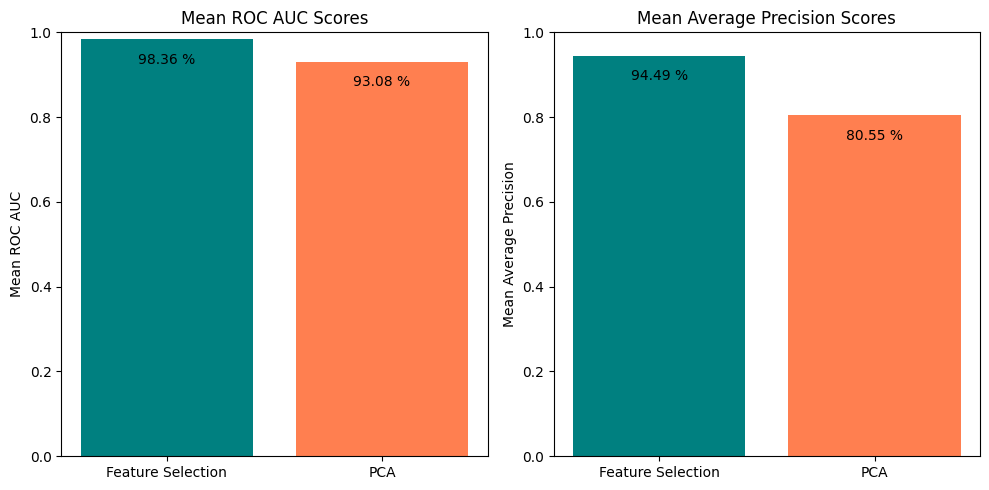

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def calculate_scores(model, X_train, y_train):
    """Calculates ROC AUC and Average Precision scores using cross-validation"""
    roc_auc_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')
    avg_precision_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='average_precision')
    return roc_auc_scores, avg_precision_scores


def build_feature_selection_model():
    """Creates the feature selection pipeline using Random Forest"""
    return make_pipeline(
        SelectFromModel(RandomForestClassifier(), threshold='median'),
        RandomForestClassifier()
    )

def build_pca_model():
    """Creates the PCA pipeline using Random Forest"""
    return make_pipeline(
        StandardScaler(),
        PCA(n_components=9),
        RandomForestClassifier()
    )

def plot_results(scores_fs, scores_pca):
    """Plots the results of feature selection and PCA, with annotations"""
    mean_roc_auc_scores = [scores_fs[0].mean(), scores_pca[0].mean()]
    mean_avg_precision_scores = [scores_fs[1].mean(), scores_pca[1].mean()]

    labels = ['Feature Selection', 'PCA']

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    bars = plt.bar(labels, mean_roc_auc_scores, color=['#008080', '#FF7F50'])
    plt.title('Mean ROC AUC Scores')
    plt.ylabel('Mean ROC AUC')
    plt.ylim(0, 1)

    # Annotation for ROC AUC
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height*100:.2f} %',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, -20),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom',fontsize=10)

    plt.subplot(1, 2, 2)
    bars = plt.bar(labels, mean_avg_precision_scores, color=['#008080', '#FF7F50'])
    plt.title('Mean Average Precision Scores')
    plt.ylabel('Mean Average Precision')
    plt.ylim(0, 1)

    # Annotation for Average Precision
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height*100:.2f} %',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, -20),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom',fontsize=10)

    plt.tight_layout()
    plt.show()

# Assuming you have your data in X_train and y_train
fs_model = build_feature_selection_model()
pca_model = build_pca_model()

scores_fs = calculate_scores(fs_model, X_train, y_train)
scores_pca = calculate_scores(pca_model, X_train, y_train)

plot_results(scores_fs, scores_pca)

**Mean ROC AUC Scores:**
* Feature Selection: The model achieves a Mean ROC AUC of 98.36%, indicating excellent discrimination ability between the classes.
* PCA: There is a noticeable drop to 93.08% in Mean ROC AUC when PCA is applied. While still high, this reduction suggests that limiting the data to the first 9 principal components might omit some important features that contribute to the model's ability to differentiate between classes.

**Mean Average Precision Scores:**
* Feature Selection: Achieves a Mean Average Precision of 94.49%. This high score indicates that the model is very effective at retrieving relevant instances.
* PCA: The score significantly decreases to 80.55%. This large drop highlights the impact of losing critical information pertinent to correctly identifying positive class instances, which is especially important in scenarios where precision is crucial (like in imbalanced datasets).

# Data Processing with XGBoost

### Comparison of Solving with Imbalanced data methods for XGboost

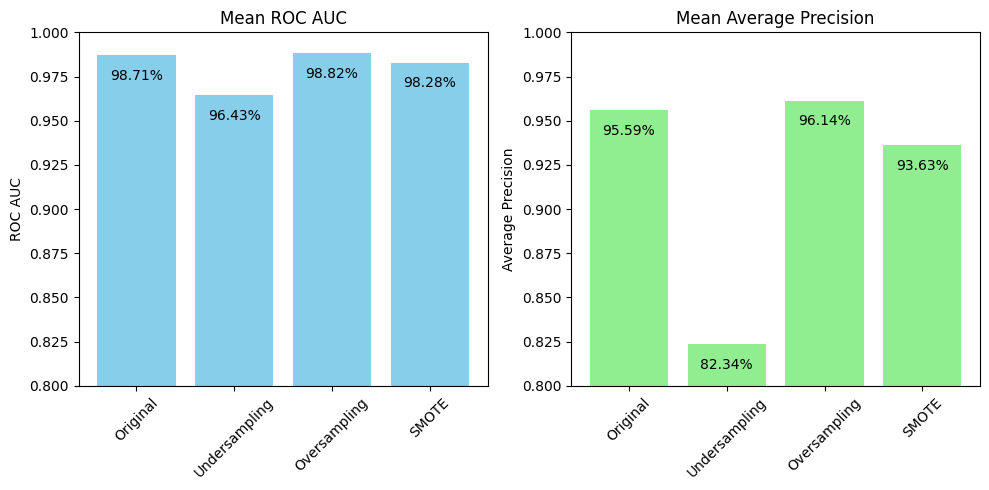

In [ ]:
original_pipe_xgb = make_pipeline(XGBClassifier(random_state=88))

ori_scores = cross_validate(original_pipe_xgb, X_train, y_train, cv=10,
                            scoring=('roc_auc', 'average_precision'))

mean_roc_auc_ori = ori_scores['test_roc_auc'].mean()
mean_avg_precision_ori = ori_scores['test_average_precision'].mean()

def create_and_evaluate(sampler, name):
    pipe = make_pipeline(sampler, XGBClassifier(random_state=1))
    scores = cross_validate(pipe, X_train, y_train, cv=10,
                            scoring=('roc_auc', 'average_precision'))
    return {
        'name': name,
        'mean_roc_auc': scores['test_roc_auc'].mean(),
        'mean_avg_precision': scores['test_average_precision'].mean()
    }

results = [
    create_and_evaluate(RandomUnderSampler(replacement=False), 'Undersampling'),
    create_and_evaluate(RandomOverSampler(), 'Oversampling'),
    create_and_evaluate(SMOTE(), 'SMOTE')
]

mean_scores = {
    'Original': (mean_roc_auc_ori, mean_avg_precision_ori)
}
mean_scores.update({result['name']: (result['mean_roc_auc'], result['mean_avg_precision']) for result in results})

mean_roc_auc = [score[0] for score in mean_scores.values()]
mean_avg_precision = [score[1] for score in mean_scores.values()]
methods = list(mean_scores.keys())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(methods, mean_roc_auc, color='skyblue')
plt.title('Mean ROC AUC')
plt.ylabel('ROC AUC')
plt.ylim(0.8, 1)
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height*100:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, -20),
                 textcoords="offset points",
                 ha='center', va='bottom',fontsize=10)

plt.subplot(1, 2, 2)
bars = plt.bar(methods, mean_avg_precision, color='lightgreen')
plt.title('Mean Average Precision')
plt.ylabel('Average Precision')
plt.ylim(0.8, 1)
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height*100:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, -20),
                 textcoords="offset points",
                 ha='center', va='bottom',fontsize=10)

plt.tight_layout()
plt.show()

* Choosing the Right Technique: The choice between undersampling, oversampling, and SMOTE depends on the specific requirements of the task. If maintaining all information is crucial and computational resources allow, oversampling might be preferable. In scenarios where reducing training time is important, SMOTE offers a good balance.
* Handling Imbalanced Data: These results underscore the importance of handling imbalanced datasets in classification tasks. Proper handling can lead to significant improvements in model performance, particularly in terms of precision.

### Feature Selection with XGBoost

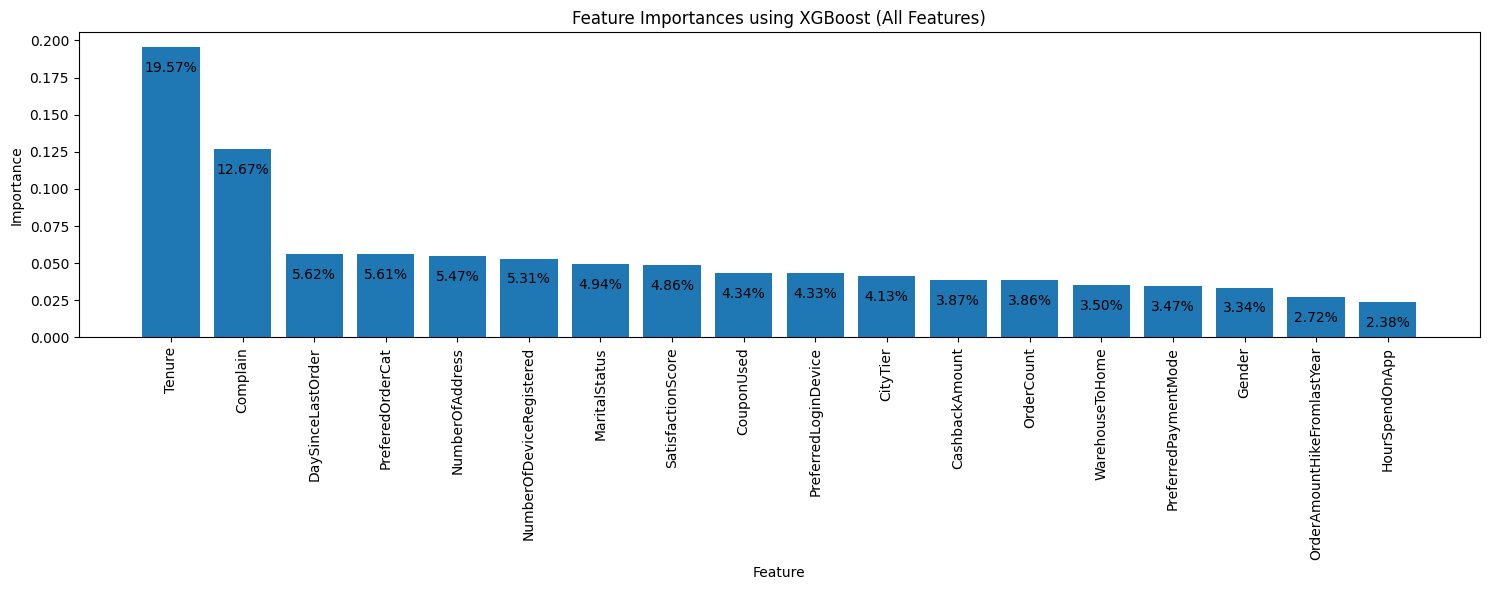

In [ ]:
# Train XGBoost model using the original X_train and y_train
xgb_model_original = XGBClassifier()
xgb_model_original.fit(X_train, y_train)

# Get feature importances from the XGBoost model
importances_original_xgb = xgb_model_original.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_original_xgb})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot all feature importances
plt.figure(figsize=(15, 6))
bars = plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances using XGBoost (All Features)')
plt.xticks(rotation=90)
plt.tight_layout()

# Annotate each bar with its percentage
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height*100:.2f}%',  # Percentage formatting
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, -20),  # Vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10)  # Adjust font size here
plt.show()

Key Observations: Tenure (19.57%) and Complain (12.67%) are the most important features according to the model. This indicates that the length of time customers have been with the service and whether they have complaints are crucial in predicting the target variable.

In [ ]:
# 2. Perform feature selection using SelectFromModel with XGBoost
selector_xgb = SelectFromModel(xgb_model_original, threshold='median')
X_train_xgb_selected = selector_xgb.fit_transform(X_train, y_train)

# Get selected feature names for XGBoost
selected_feature_names_xgb = X_train.columns[selector_xgb.get_support()]

print("Number of Selected Features:", len(selected_feature_names_xgb))
print("Number of Total Feature:", len(selector_xgb.estimator_.feature_importances_))
print("Selected Features for XGBoost:", selected_feature_names_xgb)

Number of Selected Features: 9
Number of Total Feature: 18
Selected Features for XGBoost: Index(['Tenure', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain',
       'CouponUsed', 'DaySinceLastOrder'],
      dtype='object')


 This reduction is significant as it simplifies the model by eliminating potentially less informative features, which can lead to faster training and prediction times, and potentially less overfitting.This selection suggests that these features have a higher relative importance and are potentially more predictive of the outcome compared to the ones that were excluded.

In [ ]:
# 3. Train XGBoost model using selected features obtained from feature selection
xgb_model_selected = XGBClassifier()
xgb_model_selected.fit(X_train_xgb_selected, y_train)

# Predictions on original features for XGBoost
xgb_pred_original = xgb_model_original.predict(X_test)

# Predictions on selected features for XGBoost
X_test_xgb_selected = selector_xgb.transform(X_test)
xgb_pred_selected = xgb_model_selected.predict(X_test_xgb_selected)

# Evaluate the performance of XGBoost models
print("XGBoost Model - Original Features:")
print(classification_report(y_test, xgb_pred_original))
print("XGBoost Model - Selected Features:")
print(classification_report(y_test, xgb_pred_selected))

XGBoost Model - Original Features:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       936
           1       0.94      0.92      0.93       190

    accuracy                           0.98      1126
   macro avg       0.96      0.95      0.96      1126
weighted avg       0.98      0.98      0.98      1126

XGBoost Model - Selected Features:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       936
           1       0.84      0.80      0.82       190

    accuracy                           0.94      1126
   macro avg       0.90      0.88      0.89      1126
weighted avg       0.94      0.94      0.94      1126



**XGBoost Model - Original Features:**
* Precision, Recall, and F1-Score: The model with all features shows high precision (0.94) and recall (0.92) for the positive class (1), leading to an F1-score of 0.93. The scores for the negative class (0) are even higher, nearly perfect, reflecting the model's excellent capability in classifying the majority class and a robust performance in recognizing the minority class.
* Overall Accuracy: The accuracy stands impressively at 98%, suggesting that the model is highly effective across both classes under the current setup.

**XGBoost Model - Selected Features:**
* Precision, Recall, and F1-Score: This model exhibits a lower performance compared to the original feature model. The precision (0.84) and recall (0.80) for the positive class see a significant drop, leading to an F1-score of 0.82. The scores for the negative class are also slightly lower, though still high.
* Overall Accuracy: The accuracy decreases to 94%, reflecting the impact of using fewer features on the model’s ability to generalize across the test data.

## Comparison Feature Selection with Solving Imbalanced data Methods for XGboost

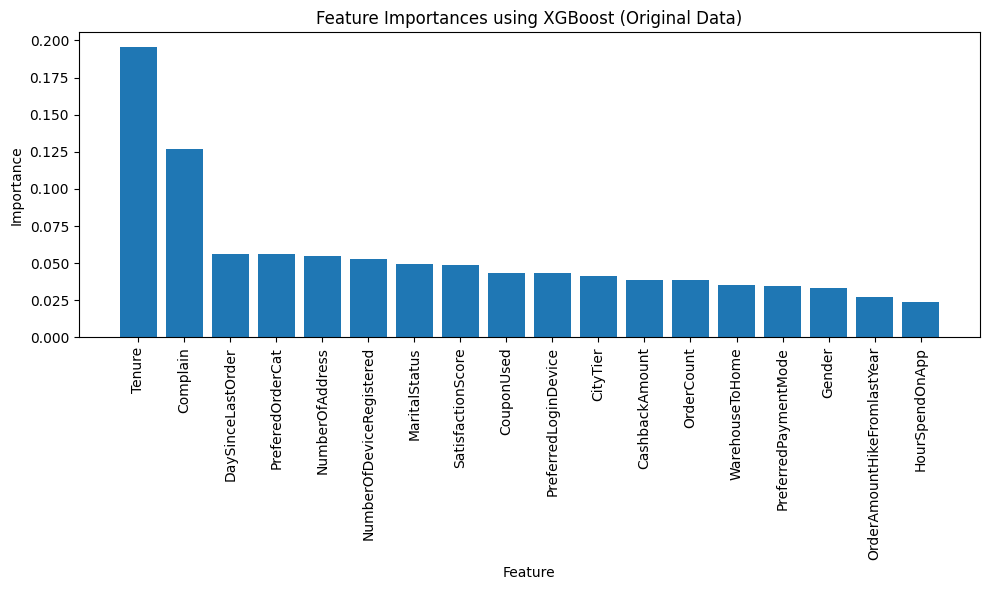

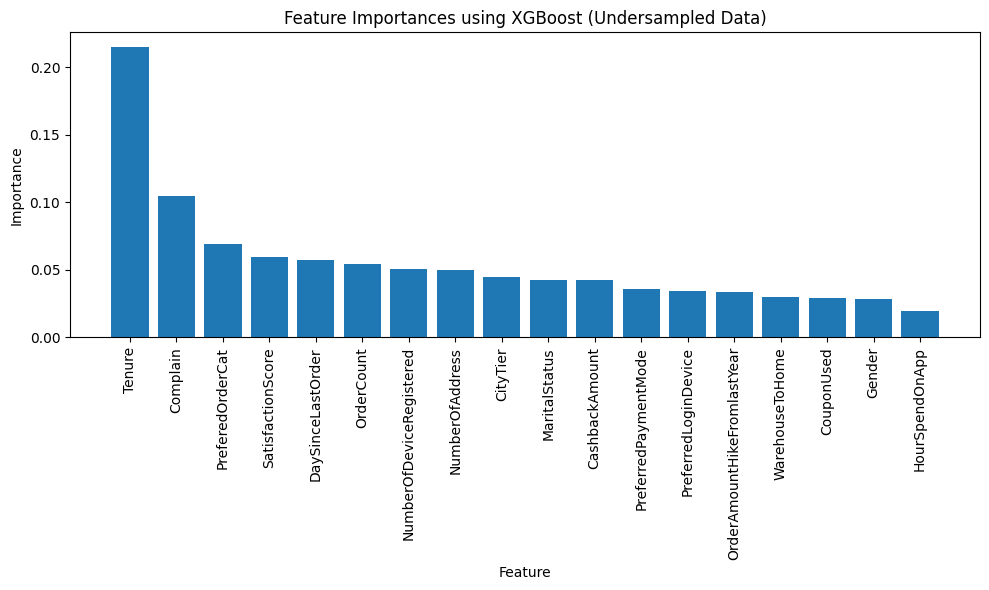

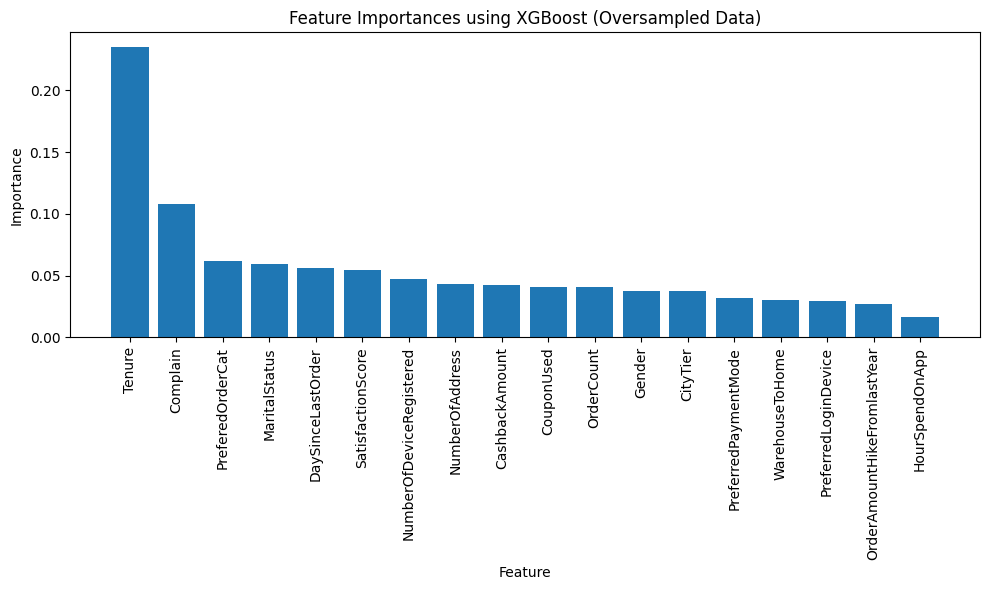

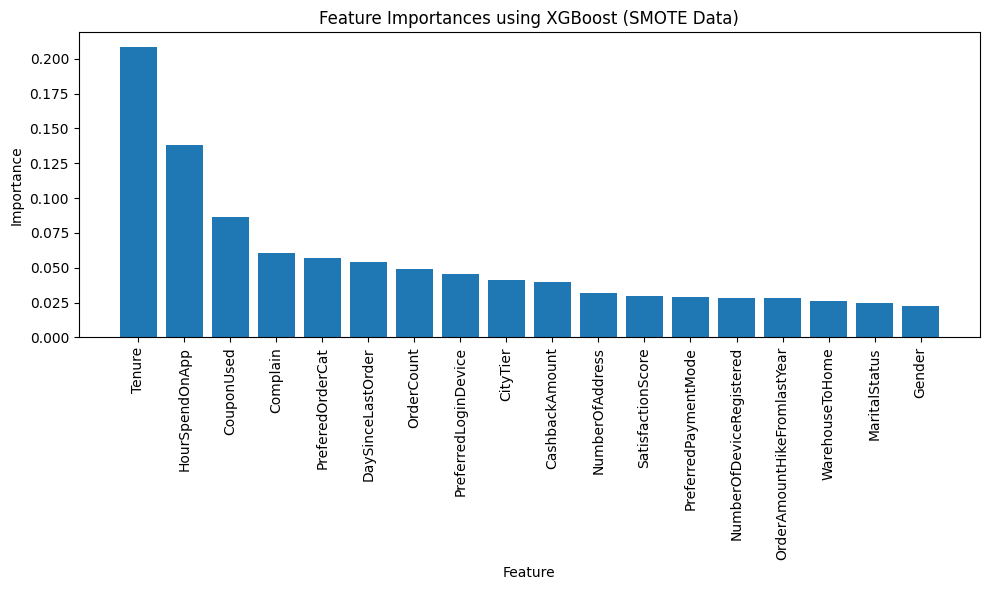

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

def plot_feature_importances_xgb(X_train, y_train, title):
    # Train XGBoost model
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)

    # Get feature importances from the XGBoost model
    importances_xgb = xgb_model.feature_importances_

    # Get feature names
    feature_names = X_train.columns

    # Create a DataFrame to store feature importances
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_xgb})

    # Sort the DataFrame by importance score in descending order
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# You can call this function similarly to your original function
plot_feature_importances_xgb(X_train, y_train, 'Feature Importances using XGBoost (Original Data)')
plot_feature_importances_xgb(X_train_undsample, y_train_undsample, 'Feature Importances using XGBoost (Undersampled Data)')
plot_feature_importances_xgb(X_train_oversample, y_train_oversample, 'Feature Importances using XGBoost (Oversampled Data)')
plot_feature_importances_xgb(X_train_smote, y_train_smote, 'Feature Importances using XGBoost (SMOTE Data)')

1. Feature Consistency Across Methods: The key takeaway from the charts is that the feature 'Tenure' consistently appears as the most important across all methods, suggesting its critical role in the predictive model regardless of the sampling technique. This indicates that 'Tenure' likely has a strong and stable relationship with the target variable across different datasets.

2. Impact of Sampling on Feature Importance:
* Undersampling: Typically reduces the dataset size by decreasing the number of majority class samples, which may emphasize the importance of features that differentiate the minority class. Here, features like 'Complain' and 'PreferredOrderCat' are highlighted, potentially because they capture aspects of the minority class that are crucial for predictions in a smaller dataset.
* Oversampling: Increases the dataset size by replicating the minority class, potentially highlighting different features like 'Complain' and 'OrderCount'. The shift in importance towards 'OrderCount' might be because repeated observations in the minority class allow the model to learn more about its nuances.
* SMOTE: Generates synthetic samples for the minority class. This method retains the importance of 'Tenure' but also emphasizes 'CouponUsed' and 'PreferredOrderCat', which might be due to the new synthetic points creating more generalized patterns that these features capture.

3. Comparison of Features Across Methods:
* The original dataset shows a balance of feature importances across several attributes, with 'Tenure' leading.
* In contrast, the feature importance distributions in the balanced datasets (especially with SMOTE) appear more uniform across more features, which might suggest a more nuanced understanding of feature interactions when the class distribution is balanced.

In [ ]:
import xgboost as xgb

def perform_feature_selection_xgboost(X_train, y_train):
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)

    selector = SelectFromModel(xgb_model, threshold='median')
    X_train_selected = selector.fit_transform(X_train, y_train)
    selected_feature_indices = selector.get_support(indices=True)
    selected_feature_names = X_train.columns[selected_feature_indices]

    roc_auc_scorer = make_scorer(roc_auc_score)
    avg_precision_scorer = make_scorer(average_precision_score)

    selected_roc_auc_scores = cross_val_score(xgb_model, X_train_selected, y_train, cv=10, scoring=roc_auc_scorer)
    selected_avg_precision_scores = cross_val_score(xgb_model, X_train_selected, y_train, cv=10, scoring=avg_precision_scorer)

    original_roc_auc_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring=roc_auc_scorer)
    original_avg_precision_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring=avg_precision_scorer)

    mean_original_roc_auc = original_roc_auc_scores.mean()
    mean_original_avg_precision = original_avg_precision_scores.mean()
    mean_selected_roc_auc = selected_roc_auc_scores.mean()
    mean_selected_avg_precision = selected_avg_precision_scores.mean()

    return X_train_selected, selected_feature_names, mean_original_roc_auc, mean_original_avg_precision, mean_selected_roc_auc, mean_selected_avg_precision

# Call the function for each sampling method
X_train_selected_xgb, selected_features_original_xgb, mean_original_roc_auc0_xgb, mean_original_avg_precision0_xgb, mean_selected_roc_auc0_xgb, mean_selected_avg_precision0_xgb = perform_feature_selection_xgboost(X_train, y_train)
X_train_undersample_selected_xgb, selected_features_undersample_xgb, mean_original_roc_auc1_xgb, mean_original_avg_precision1_xgb, mean_selected_roc_auc1_xgb, mean_selected_avg_precision1_xgb = perform_feature_selection_xgboost(X_train_undsample, y_train_undsample)
X_train_oversample_selected_xgb, selected_features_oversample_xgb, mean_original_roc_auc2_xgb, mean_original_avg_precision2_xgb, mean_selected_roc_auc2_xgb, mean_selected_avg_precision2_xgb = perform_feature_selection_xgboost(X_train_oversample, y_train_oversample)
X_train_smote_selected_xgb, selected_features_smote_xgb, mean_original_roc_auc3_xgb, mean_original_avg_precision3_xgb, mean_selected_roc_auc3_xgb, mean_selected_avg_precision3_xgb = perform_feature_selection_xgboost(X_train_smote, y_train_smote)

# Print results
print(f"Mean ROC AUC of XGBoost model with all features (Original): {mean_original_roc_auc0_xgb}")
print(f"Mean Average Precision of XGBoost model with all features (Original): {mean_original_avg_precision0_xgb}")
print(f"Mean ROC AUC of XGBoost model with selected features (Original): {mean_selected_roc_auc0_xgb}")
print(f"Mean Average Precision of XGBoost model with selected features (Original): {mean_selected_avg_precision0_xgb}")

print(f"Mean ROC AUC of XGBoost model with all features (Undersampling): {mean_original_roc_auc1_xgb}")
print(f"Mean Average Precision of XGBoost model with all features (Undersampling): {mean_original_avg_precision1_xgb}")
print(f"Mean ROC AUC of XGBoost model with selected features (Undersampling): {mean_selected_roc_auc1_xgb}")
print(f"Mean Average Precision of XGBoost model with selected features (Undersampling): {mean_selected_avg_precision1_xgb}")

print(f"Mean ROC AUC of XGBoost model with all features (Oversampling): {mean_original_roc_auc2_xgb}")
print(f"Mean Average Precision of XGBoost model with all features (Oversampling): {mean_original_avg_precision2_xgb}")
print(f"Mean ROC AUC of XGBoost model with selected features (Oversampling): {mean_selected_roc_auc2_xgb}")
print(f"Mean Average Precision of XGBoost model with selected features (Oversampling): {mean_selected_avg_precision2_xgb}")

print(f"Mean ROC AUC of XGBoost model with all features (SMOTE): {mean_original_roc_auc3_xgb}")
print(f"Mean Average Precision of XGBoost model with all features (SMOTE): {mean_original_avg_precision3_xgb}")
print(f"Mean ROC AUC of XGBoost model with selected features (SMOTE): {mean_selected_roc_auc3_xgb}")
print(f"Mean Average Precision of XGBoost model with selected features (SMOTE): {mean_selected_avg_precision3_xgb}")

Mean ROC AUC of XGBoost model with all features (Original): 0.9440749695093347
Mean Average Precision of XGBoost model with all features (Original): 0.8546822054947121
Mean ROC AUC of XGBoost model with selected features (Original): 0.8535070363073458
Mean Average Precision of XGBoost model with selected features (Original): 0.6524989249255905
Mean ROC AUC of XGBoost model with all features (Undersampling): 0.915578947368421
Mean Average Precision of XGBoost model with all features (Undersampling): 0.870637982452936
Mean ROC AUC of XGBoost model with selected features (Undersampling): 0.906359649122807
Mean Average Precision of XGBoost model with selected features (Undersampling): 0.858172372351502
Mean ROC AUC of XGBoost model with all features (Oversampling): 0.9919932263814617
Mean Average Precision of XGBoost model with all features (Oversampling): 0.9843247526542063
Mean ROC AUC of XGBoost model with selected features (Oversampling): 0.9783778966131906
Mean Average Precision of XG

* **Undersampling**: Shows a decrease in both ROC AUC and Average Precision when switching from all features to selected features. This indicates that while undersampling helps to balance the classes, it may also lead to loss of information, especially when combined with feature selection.
* **Oversampling**: Maintains high scores in both metrics across all features and selected features, suggesting that oversampling provides a robust dataset that retains useful patterns even when the number of features is reduced.
* **SMOTE**: Similar to Oversampling, shows high performance with all features but experiences a drop with selected features. SMOTE's synthetic sample generation helps to capture and enhance patterns in the minority class, which may be why reducing features impacts performance more noticeably.

In [ ]:
print("Selected Features for Original data:", selected_features_original)
print("Selected Features for Undersampling data:", selected_features_undersample)
print("Selected Features for Oversampling data:", selected_features_oversample)
print("Selected Features for SMOTE data:", selected_features_smote)

Selected Features for Original data: Index(['Tenure', 'WarehouseToHome', 'PreferredPaymentMode',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
Selected Features for Undersampling data: Index(['Tenure', 'WarehouseToHome', 'PreferedOrderCat', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
Selected Features for Oversampling data: Index(['Tenure', 'WarehouseToHome', 'PreferedOrderCat', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
Selected Features for SMOTE data: Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'PreferedOrderCat',
       'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'DaySinceLastOrder', 'CashbackAmount'],
     

* Undersampling and Oversampling result in similar selections, suggesting that both methods preserve the data structure sufficiently to maintain consistent feature importance. This could be due to both techniques retaining a significant portion of the majority class while adjusting the minority class to create balance.
* SMOTE's selection of features related to behavioral data ('HourSpendOnApp', 'CouponUsed') might reflect the synthetic nature of SMOTE, which tends to emphasize existing trends or outliers in minority class data, potentially skewing feature importance towards those more pronounced in the resampled dataset.

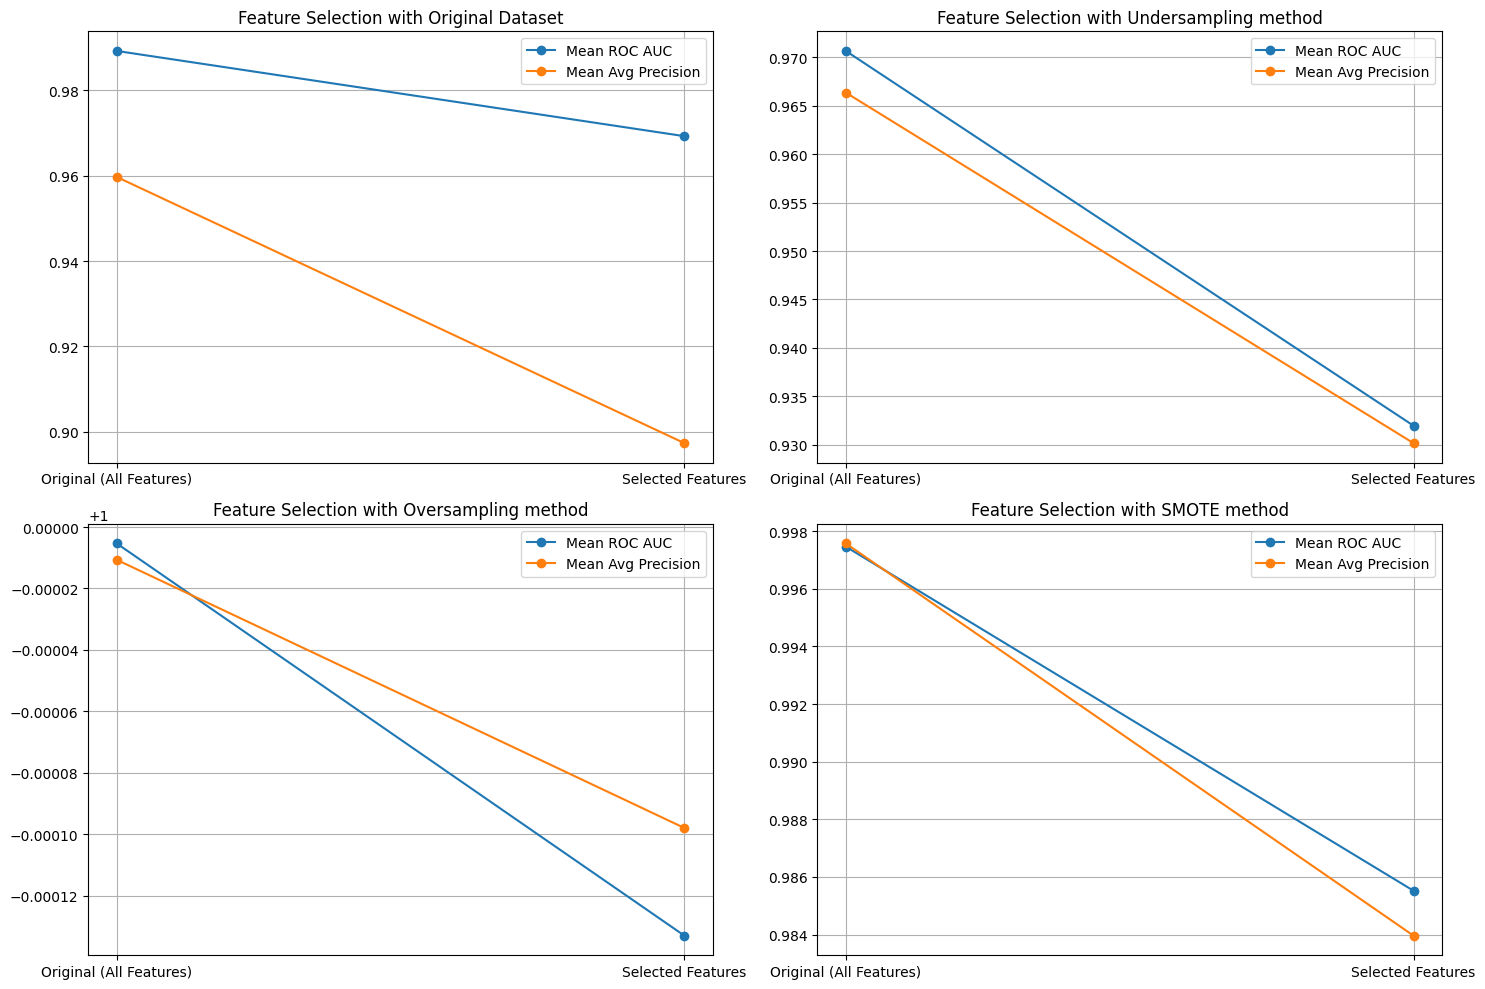

In [ ]:
import matplotlib.pyplot as plt

# Define data for each plot
models = ['Original (All Features)', 'Selected Features']

# First plot
mean_roc_auc_scores_0 = [mean_original_roc_auc0, mean_selected_roc_auc0]
mean_avg_precision_scores_0 = [mean_original_avg_precision0, mean_selected_avg_precision0]

# Second plot
mean_roc_auc_scores_1 = [mean_original_roc_auc1, mean_selected_roc_auc1]
mean_avg_precision_scores_1 = [mean_original_avg_precision1, mean_selected_avg_precision1]

# Third plot
mean_roc_auc_scores_2 = [mean_original_roc_auc2, mean_selected_roc_auc2]
mean_avg_precision_scores_2 = [mean_original_avg_precision2, mean_selected_avg_precision2]

# Fourth plot
mean_roc_auc_scores_3 = [mean_original_roc_auc3, mean_selected_roc_auc3]
mean_avg_precision_scores_3 = [mean_original_avg_precision3, mean_selected_avg_precision3]

# Plot all results in one figure
plt.figure(figsize=(15, 10))

# Plot first set of data
plt.subplot(221)
plt.plot(models, mean_roc_auc_scores_0, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_0, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with Original Dataset')
plt.legend()
plt.grid(True)

# Plot second set of data
plt.subplot(222)
plt.plot(models, mean_roc_auc_scores_1, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_1, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with Undersampling method')
plt.legend()
plt.grid(True)

# Plot third set of data
plt.subplot(223)
plt.plot(models, mean_roc_auc_scores_2, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_2, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with Oversampling method')
plt.legend()
plt.grid(True)

# Plot fourth set of data
plt.subplot(224)
plt.plot(models, mean_roc_auc_scores_3, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_3, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with SMOTE method')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

1. **Original Dataset:**
* The ROC AUC remains relatively stable, slightly decreasing when using selected features compared to using all features. This suggests that the selected features maintain the bulk of the predictive power of the model, although some minor information that aids prediction may be lost.
* Average Precision shows a more significant drop when moving to selected features. This indicates that while the most influential features contribute to model accuracy, the removed features contain crucial information that supports precision.

2. **Undersampling Method:**
* Both ROC AUC and Average Precision scores decrease significantly when only selected features are used. This suggests that undersampling, which simplifies the dataset by reducing the majority class, may lead to a loss of information when combined with feature selection, impacting model performance more noticeably.

3. **Oversampling Method:**
* There is a pronounced decrease in both ROC AUC and Average Precision. This might indicate that while oversampling helps address class imbalance by replicating minority class samples, the combination of adding synthetic samples and reducing features leads to a loss in model performance, possibly because essential variations are not captured by the selected features.

4. **SMOTE:**
* Feature selection greatly impacts both metrics under the SMOTE technique, showing the largest decline among the methods tested. SMOTE synthesizes new examples rather than just replicating, potentially introducing nuances that selected features fail to capture fully, thus impacting model performance significantly.

## Comparison Principal component analysis (PCA) with Solving Imbalanced data Methods for XGBoost

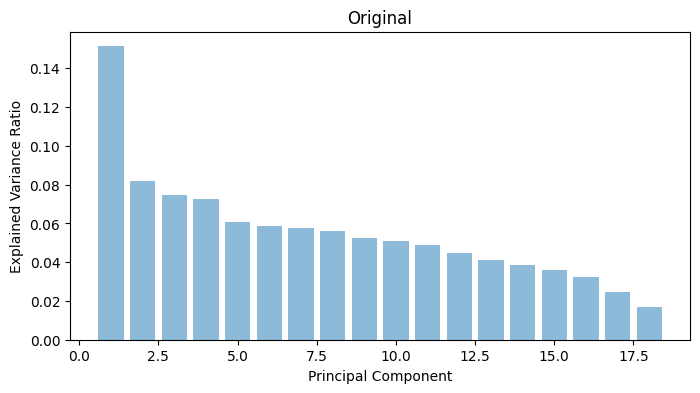

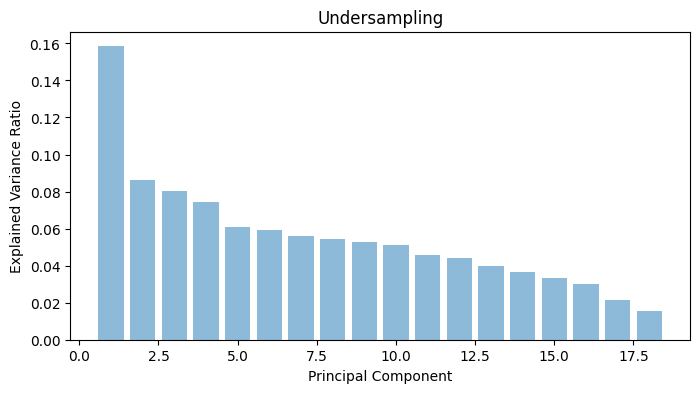

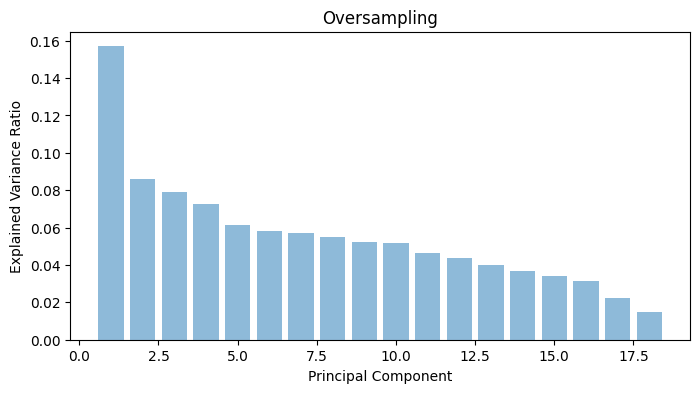

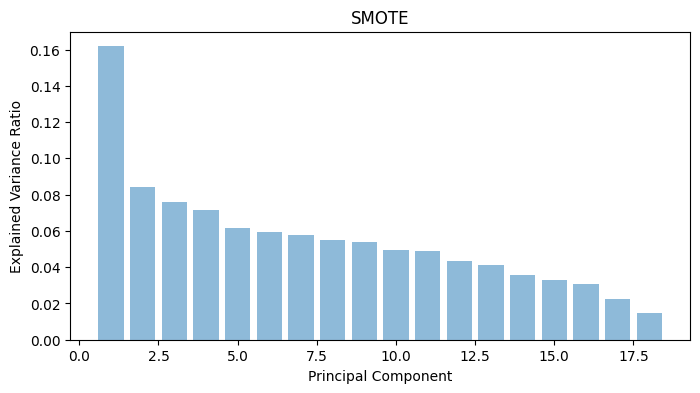

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb
import matplotlib.pyplot as plt

def plot_variance_ratio(X_train, y_train, title):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    pca = PCA()
    pipeline = Pipeline([
        ("scaler", scaler),
        ("pca", pca),
        ("xgb", xgb.XGBClassifier())
    ])

    pipeline.fit(X_train_scaled, y_train)

    explained_variance_ratio = pipeline.named_steps['pca'].explained_variance_ratio_

    plt.figure(figsize=(8, 4))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(title)
    plt.show()

# Assuming X_train, y_train, X_train_undsample, y_train_undsample, X_train_oversample, y_train_oversample, X_train_smote, y_train_smote are defined elsewhere

plot_variance_ratio(X_train, y_train, 'Original')
plot_variance_ratio(X_train_undsample, y_train_undsample, 'Undersampling')
plot_variance_ratio(X_train_oversample, y_train_oversample, 'Oversampling')
plot_variance_ratio(X_train_smote, y_train_smote, 'SMOTE')

* Undersampling: Shows a slightly more uniform distribution of explained variance across components than the original dataset, possibly due to the reduction in sample size simplifying the data structure.
* Oversampling: The explained variance pattern is quite similar to that of the original data, suggesting that increasing the sample size by replicating existing data points does not fundamentally change the underlying data structure.
* SMOTE: The variance distribution is similar to that seen with oversampling, which might indicate that the synthetic sampling creates new instances that follow the patterns of the original data closely.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb

def perform_feature_selection(X_train, y_train):
    # Fit XGBoost model
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)

    # Perform PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    pca_all = PCA()
    X_train_pca = pca_all.fit_transform(X_train_scaled)

    pca_top9 = PCA(n_components=9)
    X_train_pca = pca_top9.fit_transform(X_train_scaled)

    # Get explained variance ratio of each component
    explained_variance_ratios = pca_top9.explained_variance_ratio_

    # Get column names
    column_names = X_train.columns

    xgb_model_selected = xgb.XGBClassifier()
    xgb_model_selected.fit(X_train_pca, y_train)

    # Cross-validation scores for the original XGBoost model with all features
    original_roc_auc_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='roc_auc')
    original_avg_precision_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='average_precision')

    # Cross-validation scores for the XGBoost model with selected features (PCA)
    selected_roc_auc_scores = cross_val_score(xgb_model_selected, X_train_pca, y_train, cv=10, scoring='roc_auc')
    selected_avg_precision_scores = cross_val_score(xgb_model_selected, X_train_pca, y_train, cv=10, scoring='average_precision')

    # Calculate mean scores
    mean_original_roc_auc = original_roc_auc_scores.mean()
    mean_original_avg_precision = original_avg_precision_scores.mean()
    mean_selected_roc_auc = selected_roc_auc_scores.mean()
    mean_selected_avg_precision = selected_avg_precision_scores.mean()

    return explained_variance_ratios, column_names, mean_original_roc_auc, mean_original_avg_precision, mean_selected_roc_auc, mean_selected_avg_precision


# Call the function for each sampling method
explained_variance_ratios_Original, column__Original, mean_original_roc_auc0, mean_original_avg_precision0, mean_selected_roc_auc0, mean_selected_avg_precision0 = perform_feature_selection(X_train, y_train)
explained_variance_ratios_Undersampling, column_Undersampling, mean_original_roc_auc1, mean_original_avg_precision1, mean_selected_roc_auc1, mean_selected_avg_precision1 = perform_feature_selection(X_train_undsample, y_train_undsample)
explained_variance_ratios_Oversampling, column_Oversampling, mean_original_roc_auc2, mean_original_avg_precision2, mean_selected_roc_auc2, mean_selected_avg_precision2 = perform_feature_selection(X_train_oversample, y_train_oversample)
explained_variance_ratios_SMOTE, column_SMOTE, mean_original_roc_auc3, mean_original_avg_precision3, mean_selected_roc_auc3, mean_selected_avg_precision3 = perform_feature_selection(X_train_smote, y_train_smote)

# Print results
print(f"Mean ROC AUC of XGBoost model with all PCA (Original): {mean_original_roc_auc0}")
print(f"Mean Average Precision of XGBoost model with all PCA (Original): {mean_original_avg_precision0}")
print(f"Mean ROC AUC of XGBoost model with selected PCA (Original): {mean_selected_roc_auc0}")
print(f"Mean Average Precision of XGBoost model with selected PCA (Original): {mean_selected_avg_precision0}")

print(f"Mean ROC AUC of XGBoost model with all PCA (Undersampling): {mean_original_roc_auc1}")
print(f"Mean Average Precision of XGBoost model with all PCA (Undersampling): {mean_original_avg_precision1}")
print(f"Mean ROC AUC of XGBoost model with selected PCA (Undersampling): {mean_selected_roc_auc1}")
print(f"Mean Average Precision of XGBoost model with selected PCA (Undersampling): {mean_selected_avg_precision1}")

print(f"Mean ROC AUC of XGBoost model with all PCA (Oversampling): {mean_original_roc_auc2}")
print(f"Mean Average Precision of XGBoost model with all PCA (Oversampling): {mean_original_avg_precision2}")
print(f"Mean ROC AUC of XGBoost model with selected PCA (Oversampling): {mean_selected_roc_auc2}")
print(f"Mean Average Precision of XGBoost model with selected PCA (Oversampling): {mean_selected_avg_precision2}")

print(f"Mean ROC AUC of XGBoost model with all PCA (SMOTE): {mean_original_roc_auc3}")
print(f"Mean Average Precision of XGBoost model with all PCA (SMOTE): {mean_original_avg_precision3}")
print(f"Mean ROC AUC of XGBoost model with selected PCA (SMOTE): {mean_selected_roc_auc3}")
print(f"Mean Average Precision of XGBoost model with selected PCA (SMOTE): {mean_selected_avg_precision3}")

Mean ROC AUC of XGBoost model with all PCA (Original): 0.9870965390124151
Mean Average Precision of XGBoost model with all PCA (Original): 0.9558814911562351
Mean ROC AUC of XGBoost model with selected PCA (Original): 0.9392233235137756
Mean Average Precision of XGBoost model with selected PCA (Original): 0.8150914578139107
Mean ROC AUC of XGBoost model with all PCA (Undersampling): 0.962837488457987
Mean Average Precision of XGBoost model with all PCA (Undersampling): 0.9551098184984343
Mean ROC AUC of XGBoost model with selected PCA (Undersampling): 0.88389242843952
Mean Average Precision of XGBoost model with selected PCA (Undersampling): 0.8777338285753832
Mean ROC AUC of XGBoost model with all PCA (Oversampling): 0.9990616888888889
Mean Average Precision of XGBoost model with all PCA (Oversampling): 0.998495781818102
Mean ROC AUC of XGBoost model with selected PCA (Oversampling): 0.9971883408199643
Mean Average Precision of XGBoost model with selected PCA (Oversampling): 0.9957541

* Original Dataset:
There is a noticeable decrease in both ROC AUC and Average Precision when using PCA-selected features compared to using all features. This suggests that while reducing dimensionality simplifies the model and potentially speeds up training, it might also remove some useful information for prediction in this specific context.

* Undersampling:
The impact of PCA is more pronounced here, with significant reductions in both metrics. This could be due to the reduced diversity in the training data due to undersampling, making it more susceptible to information loss during dimensionality reduction.

* Oversampling and SMOTE:
The models trained on oversampled and SMOTE-enhanced datasets show the least performance degradation when using PCA for feature selection. This suggests that the redundancy introduced by these methods may help retain more information even after significant dimensionality reduction.

In [ ]:
print("Number of PCA for Original data:", len(explained_variance_ratios_Original))
print("Explained Variance Ratio of Each Component:")
for i, explained_variance in enumerate(explained_variance_ratios_Original):
    print(f"Component {i+1}: {explained_variance:.4f}")

print("Number of PCA for Undersampling data:", len(explained_variance_ratios_Undersampling))
print("Explained Variance Ratio of Each Component:")
for i, explained_variance in enumerate(explained_variance_ratios_Undersampling):
    print(f"Component {i+1}: {explained_variance:.4f}")

print("Number of PCA for Oversampling data:", len(explained_variance_ratios_Oversampling))
print("Explained Variance Ratio of Each Component:")
for i, explained_variance in enumerate(explained_variance_ratios_Oversampling):
    print(f"Component {i+1}: {explained_variance:.4f}")

print("Number of PCA for SMOTE data:", len(explained_variance_ratios_SMOTE))
print("Explained Variance Ratio of Each Component:")
for i, explained_variance in enumerate(explained_variance_ratios_SMOTE):
    print(f"Component {i+1}: {explained_variance:.4f}")

Number of PCA for Original data: 9
Explained Variance Ratio of Each Component:
Component 1: 0.1513
Component 2: 0.0818
Component 3: 0.0748
Component 4: 0.0728
Component 5: 0.0605
Component 6: 0.0585
Component 7: 0.0576
Component 8: 0.0563
Component 9: 0.0523
Number of PCA for Undersampling data: 9
Explained Variance Ratio of Each Component:
Component 1: 0.1584
Component 2: 0.0861
Component 3: 0.0803
Component 4: 0.0746
Component 5: 0.0607
Component 6: 0.0594
Component 7: 0.0560
Component 8: 0.0544
Component 9: 0.0527
Number of PCA for Oversampling data: 9
Explained Variance Ratio of Each Component:
Component 1: 0.1569
Component 2: 0.0861
Component 3: 0.0791
Component 4: 0.0727
Component 5: 0.0616
Component 6: 0.0583
Component 7: 0.0569
Component 8: 0.0547
Component 9: 0.0524
Number of PCA for SMOTE data: 9
Explained Variance Ratio of Each Component:
Component 1: 0.1617
Component 2: 0.0839
Component 3: 0.0759
Component 4: 0.0714
Component 5: 0.0615
Component 6: 0.0593
Component 7: 0.057

* Original Data: Shows a smooth decrease in variance explained, with the first component explaining about 15.13%.
* Undersampling: Has a slightly higher variance explained by the first few components compared to the original data, which could be due to a reduced dataset size accentuating the variance of prevalent features.
* Oversampling: Similar to undersampling but shows less variance in later components, possibly due to duplicated entries making earlier components more dominant.
* SMOTE: Shows the highest variance explained by the first component among all methods, likely due to the synthetic samples enhancing inherent data patterns.

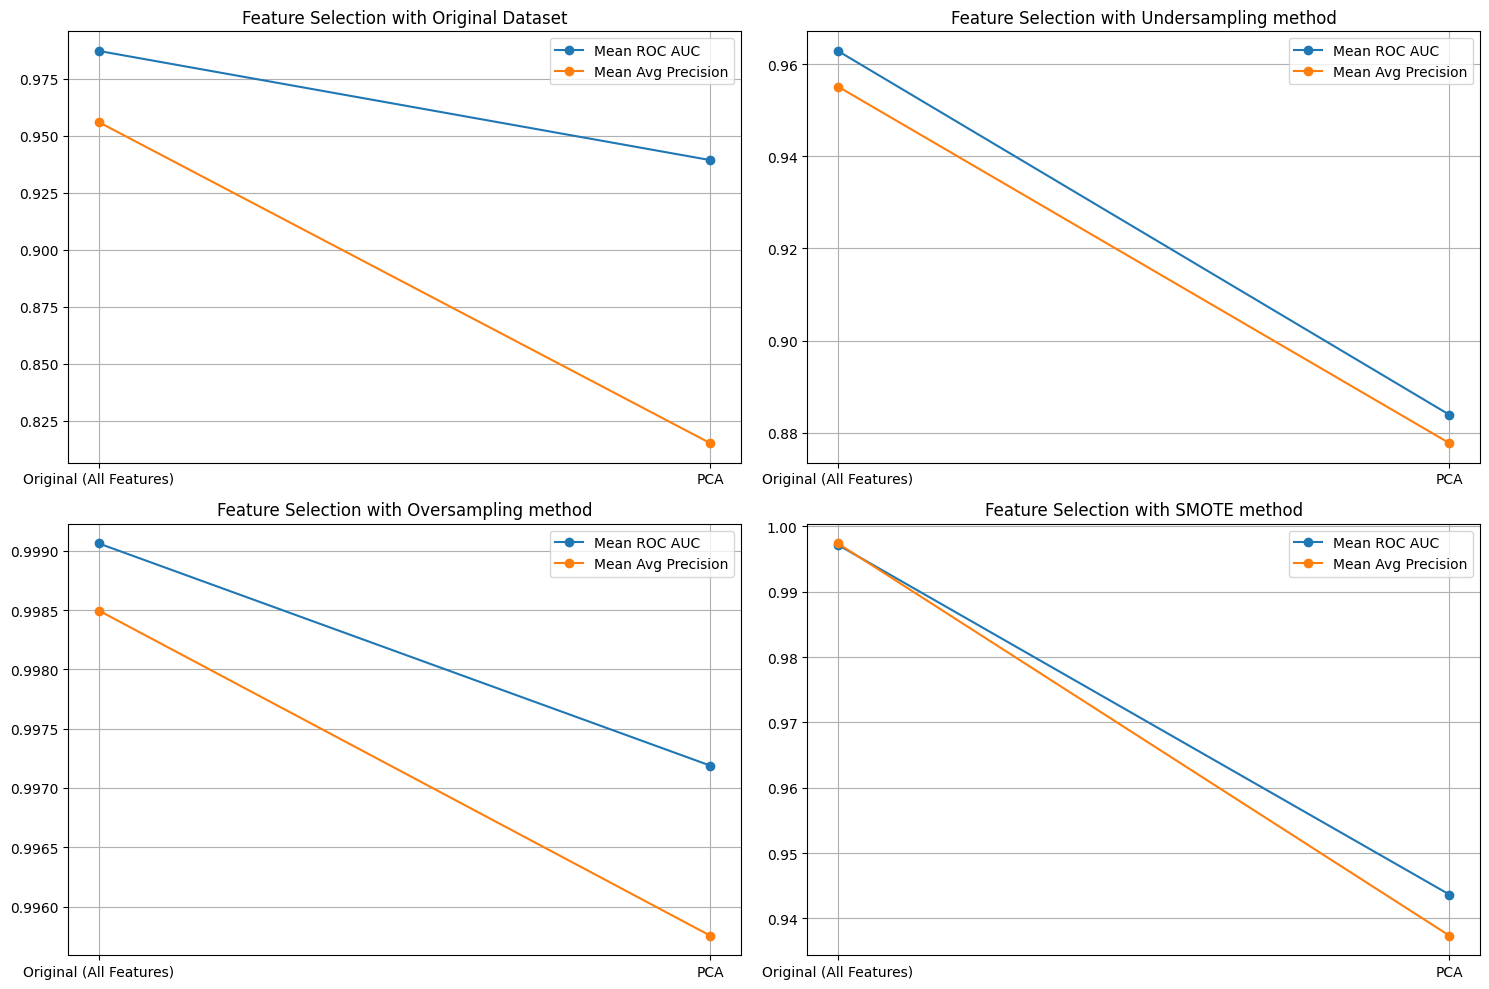

In [ ]:
# Define data for each plot
models = ['Original (All Features)', 'PCA']

# First plot
mean_roc_auc_scores_0 = [mean_original_roc_auc0, mean_selected_roc_auc0]
mean_avg_precision_scores_0 = [mean_original_avg_precision0, mean_selected_avg_precision0]

# Second plot
mean_roc_auc_scores_1 = [mean_original_roc_auc1, mean_selected_roc_auc1]
mean_avg_precision_scores_1 = [mean_original_avg_precision1, mean_selected_avg_precision1]

# Third plot
mean_roc_auc_scores_2 = [mean_original_roc_auc2, mean_selected_roc_auc2]
mean_avg_precision_scores_2 = [mean_original_avg_precision2, mean_selected_avg_precision2]

# Fourth plot
mean_roc_auc_scores_3 = [mean_original_roc_auc3, mean_selected_roc_auc3]
mean_avg_precision_scores_3 = [mean_original_avg_precision3, mean_selected_avg_precision3]

# Plot all results in one figure
plt.figure(figsize=(15, 10))

# Plot first set of data
plt.subplot(221)
plt.plot(models, mean_roc_auc_scores_0, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_0, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with Original Dataset')
plt.legend()
plt.grid(True)

# Plot second set of data
plt.subplot(222)
plt.plot(models, mean_roc_auc_scores_1, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_1, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with Undersampling method')
plt.legend()
plt.grid(True)

# Plot third set of data
plt.subplot(223)
plt.plot(models, mean_roc_auc_scores_2, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_2, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with Oversampling method')
plt.legend()
plt.grid(True)

# Plot fourth set of data
plt.subplot(224)
plt.plot(models, mean_roc_auc_scores_3, marker='o', label='Mean ROC AUC')
plt.plot(models, mean_avg_precision_scores_3, marker='o', label='Mean Avg Precision')
plt.title('Feature Selection with SMOTE method')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

1. Original Dataset:
The use of all features results in better Mean ROC AUC and Mean Average Precision compared to using only features selected by PCA. This suggests that all features contribute valuable information for model performance in the original dataset.

2. Undersampling Method:
Similar to the original dataset, using all features yields superior results in both Mean ROC AUC and Mean Average Precision. The drop in performance with PCA-selected features indicates the potential loss of critical information due to feature reduction.

3. Oversampling Method:
The model using all features slightly outperforms the PCA-based model. However, both achieve extremely high Mean ROC AUC and Mean Average Precision scores, approaching 1.0. This might indicate overfitting, especially considering the nature of oversampling which duplicates existing samples.

4. SMOTE Method:
The largest performance disparity between all features and PCA-selected features is observed here. The PCA-selected features drastically underperform in comparison to using all features, particularly in Mean Average Precision.

## Principle Component Analysis (PCA) with XGBoost

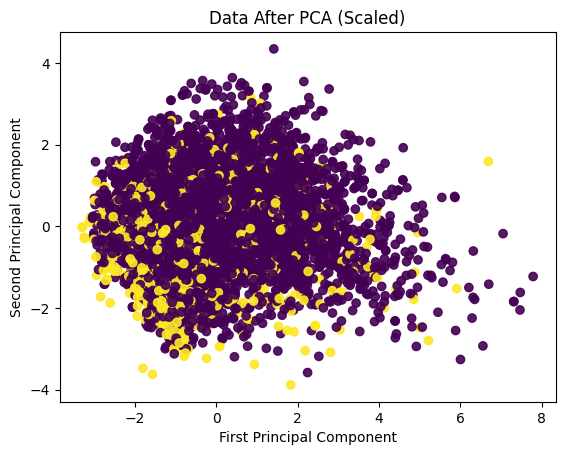

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define a pipeline with StandardScaler and PCA
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))

# Fit the pipeline to the data and transform it
X_pca_scaled = pca_scaled.fit_transform(X)

# Scatter plot of the scaled and transformed data
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y, alpha=0.9)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Data After PCA (Scaled)")
plt.show()

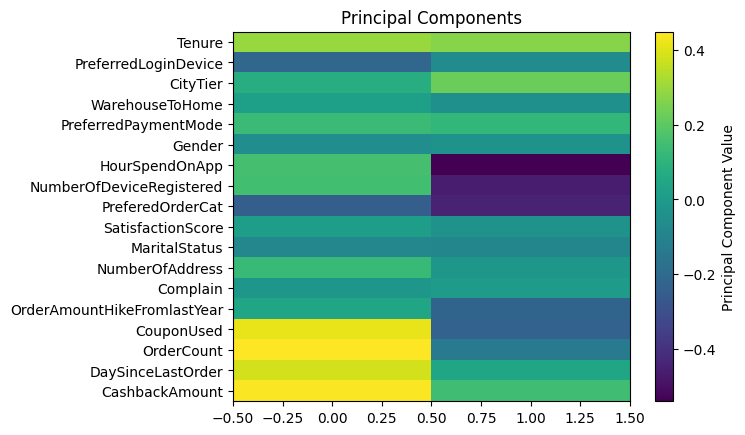

In [ ]:
# Get the principal components from the pipeline
components = pca_scaled.named_steps['pca'].components_

# Plot the principal components
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X.columns)), X.columns)
plt.colorbar(label="Principal Component Value")
plt.title("Principal Components")
plt.show()

"DaySinceLastOrder" and "CashbackAmount", show significant positive contributions (bright colors) across several principal components.
Features like "Gender" and "MaritalStatus" have less variance explained in the components, as indicated by their more subdued color.

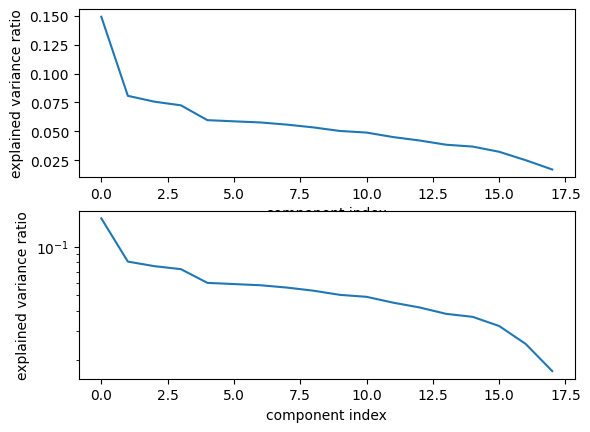

In [ ]:
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(X)
pca = pca_scaled.named_steps['pca']

fig, axes = plt.subplots(2)
axes[0].plot(pca.explained_variance_ratio_)
axes[1].semilogy(pca.explained_variance_ratio_)
for ax in axes:
    ax.set_xlabel("component index")
    ax.set_ylabel("explained variance ratio")

* The first few components capture a significant portion of the variance within the data, as indicated by the steep initial drop in both plots. This suggests that these components are most informative.
* Subsequent components contribute increasingly less to explaining the variance, suggesting that they capture more noise or less informative aspects of the data.

In [ ]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.14905119 0.08073842 0.07568026 0.07253207 0.05971179 0.05871138
 0.05773021 0.05585113 0.05343883 0.05036278 0.04899557 0.04510826
 0.0421298  0.03848912 0.03688046 0.03238911 0.02510632 0.01709329]
1.0000000000000002


Dominance of Early Components: The first four components together account for approximately 38.25% of the variance. This indicates that these components capture a significant portion of the important information in the dataset.

In [ ]:
from xgboost import XGBClassifier

# Define your classifier (XGBoost)
xgb = XGBClassifier()

# Perform cross-validation and calculate scores
roc_auc_scores = cross_val_score(xgb, X_train, y_train, cv=10, scoring='roc_auc')
average_precision_scores = cross_val_score(xgb, X_train, y_train, cv=10, scoring='average_precision')

# Calculate and print the mean scores
print("Mean ROC AUC:", roc_auc_scores.mean())
print("Mean Average Precision:", average_precision_scores.mean())

Mean ROC AUC: 0.9870965390124151
Mean Average Precision: 0.9558814911562351


1. ROC AUC (Receiver Operating Characteristic - Area Under Curve):
Value: 0.9871 (98.71%)
Interpretation: This score is very close to 1.0, indicating that the model has outstanding discriminative ability to differentiate between the positive and negative classes. A ROC AUC score close to 1 suggests that the classifier correctly ranks a random positive instance more highly than a random negative instance with high consistency.

2. Average Precision:
Value: 0.9559 (95.59%)
Interpretation: The average precision aggregates the precision score across all thresholds and is particularly useful in situations where the positive class is rare. A score close to 1 indicates that the model retrieves almost all relevant instances (true positives) without retrieving many irrelevant ones (false positives).

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Define the pipeline with XGBoost
pca_xgb = make_pipeline(StandardScaler(), PCA(n_components=9), XGBClassifier())

# Fit the pipeline to the data
pca_xgb.fit(X_train, y_train)

# Access PCA components
pca_components = pca_xgb.named_steps['pca'].components_

# Get the indices of the top features for each principal component
top_feature_indices = [np.abs(component).argsort()[::-1][:5] for component in pca_components]

# Get the names of the features
feature_names = X_train.columns

# Print the top features chosen by PCA
for i, indices in enumerate(top_feature_indices):
    print(f"Top features for Principal Component {i+1}:")
    print([feature_names[index] for index in indices])

Top features for Principal Component 1:
['OrderCount', 'CashbackAmount', 'CouponUsed', 'DaySinceLastOrder', 'Tenure']
Top features for Principal Component 2:
['HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'Tenure', 'OrderAmountHikeFromlastYear']
Top features for Principal Component 3:
['NumberOfAddress', 'OrderCount', 'DaySinceLastOrder', 'CouponUsed', 'PreferredPaymentMode']
Top features for Principal Component 4:
['CityTier', 'PreferredPaymentMode', 'Tenure', 'NumberOfAddress', 'PreferedOrderCat']
Top features for Principal Component 5:
['SatisfactionScore', 'PreferredLoginDevice', 'Gender', 'MaritalStatus', 'OrderAmountHikeFromlastYear']
Top features for Principal Component 6:
['Gender', 'Complain', 'WarehouseToHome', 'PreferredPaymentMode', 'MaritalStatus']
Top features for Principal Component 7:
['WarehouseToHome', 'Gender', 'MaritalStatus', 'OrderAmountHikeFromlastYear', 'NumberOfDeviceRegistered']
Top features for Principal Component 8:
['Complain', 'MaritalS

Tenure, OrderCount, DaySinceLastOrder, CouponUsed, and CashbackAmount are recurrent across multiple components, suggesting their strong influence on the variability within the dataset.
Gender, MaritalStatus, PreferredPaymentMode, and WarehouseToHome also appear in multiple components but with seemingly less dominance, indicating their roles might be more nuanced but still significant in influencing customer behavior or outcomes.

In [ ]:
from xgboost import XGBClassifier

# Define the pipeline with XGBoost
pca_xgb = make_pipeline(StandardScaler(), PCA(n_components=9), XGBClassifier())

# Fit the pipeline to the data and transform it
X_pca_scaled = pca_scaled.fit_transform(X_train)

# Perform cross-validation and calculate scores
roc_auc_scores = cross_val_score(pca_xgb, X_train, y_train, cv=10, scoring='roc_auc')
average_precision_scores = cross_val_score(pca_xgb, X_train, y_train, cv=10, scoring='average_precision')

# Calculate and print the mean scores
print("Mean ROC AUC:", roc_auc_scores.mean())
print("Mean Average Precision:", average_precision_scores.mean())

Mean ROC AUC: 0.934902316790193
Mean Average Precision: 0.80966930172311


* ROC AUC: The Receiver Operating Characteristic (ROC) Area Under the Curve (AUC) value of approximately 0.935 is quite strong. This indicates that the model has a high capability of distinguishing between the classes. However, when compared to the performance without PCA (from your previous results), it seems there's a slight decrease. This might be due to the loss of information inherent in reducing dimensions which PCA entails.

* Average Precision: The mean average precision score is about 0.810, which is respectable but not exceptional. This score reflects the model's ability to retrieve relevant instances—here indicating that while the model is good at identifying positive cases, there's room for improvement, particularly in managing false positives or enhancing precision in predictions.

## Feature Selection Vs Principle Component Analysis (PCA) use XGboost


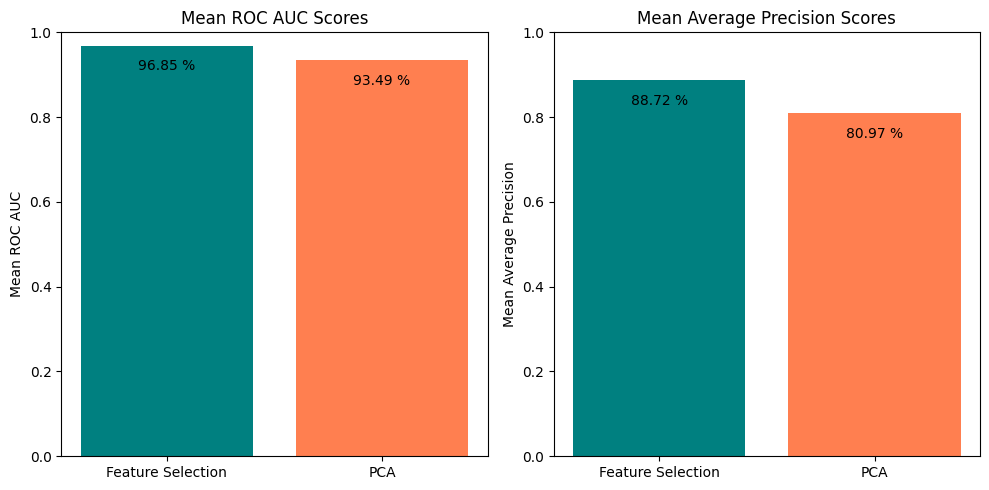

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

def calculate_scores(model, X_train, y_train):
    """Calculates ROC AUC and Average Precision scores using cross-validation"""
    roc_auc_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')
    avg_precision_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='average_precision')
    return roc_auc_scores, avg_precision_scores

def build_feature_selection_model():
    """Creates the feature selection pipeline using XGBoost"""
    return make_pipeline(
        SelectFromModel(xgb.XGBClassifier(), threshold='median'),
        xgb.XGBClassifier()
    )

def build_pca_model():
    """Creates the PCA pipeline using XGBoost"""
    return make_pipeline(
        StandardScaler(),
        PCA(n_components=9),
        xgb.XGBClassifier()
    )

def plot_results(scores_fs, scores_pca):
    """Plots the results of feature selection and PCA, with annotations"""
    mean_roc_auc_scores = [scores_fs[0].mean(), scores_pca[0].mean()]
    mean_avg_precision_scores = [scores_fs[1].mean(), scores_pca[1].mean()]

    labels = ['Feature Selection', 'PCA']

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    bars = plt.bar(labels, mean_roc_auc_scores, color=['#008080', '#FF7F50'])
    plt.title('Mean ROC AUC Scores')
    plt.ylabel('Mean ROC AUC')
    plt.ylim(0, 1)

    # Annotation for ROC AUC
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height*100:.2f} %',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, -20),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom',fontsize=10)

    plt.subplot(1, 2, 2)
    bars = plt.bar(labels, mean_avg_precision_scores, color=['#008080', '#FF7F50'])
    plt.title('Mean Average Precision Scores')
    plt.ylabel('Mean Average Precision')
    plt.ylim(0, 1)

    # Annotation for Average Precision
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height*100:.2f} %',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, -20),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom',fontsize=10)

    plt.tight_layout()
    plt.show()

# Assuming you have your data in X_train and y_train
fs_model = build_feature_selection_model()
pca_model = build_pca_model()

scores_fs = calculate_scores(fs_model, X_train, y_train)
scores_pca = calculate_scores(pca_model, X_train, y_train)

plot_results(scores_fs, scores_pca)

* Loss of Information: The PCA method involves dimensionality reduction, which can sometimes lead to significant loss of information. This is evident in the reduction in both ROC AUC and Average Precision scores when comparing PCA to direct feature selection.

* Computational Efficiency vs. Performance: While PCA might improve computational efficiency by reducing the number of input features and potentially helping to mitigate overfitting, it appears to compromise predictive performance in this scenario.

* Suitability: The results imply that direct feature selection is more suitable for your dataset when using XGBoost. It preserves more meaningful data pertaining to the prediction task, leading to higher accuracy and precision.

# Modeling and Evaluation

## Modeling : Random Forest Model

Combining all preprocessing methods (Imbalanced methods & Feature Selection) to Random Forest model and tuning model to find the best parameters then cross validation to show the score of train set (accuracy, ruc_aoc, and average precision)

we choose the imbalaced methods in the group of over resampling (oversampling & smote) to apply to our model, due to its performance compared to others methods

### RandomForest Model :

*   **Baseline**



Accuracy = 0.9769094138543517
ROC Area under Curve = 0.9357737291947819
              precision    recall  f1-score   support

           0    0.97495   0.99786   0.98627       936
           1    0.98810   0.87368   0.92737       190

    accuracy                        0.97691      1126
   macro avg    0.98152   0.93577   0.95682      1126
weighted avg    0.97717   0.97691   0.97633      1126



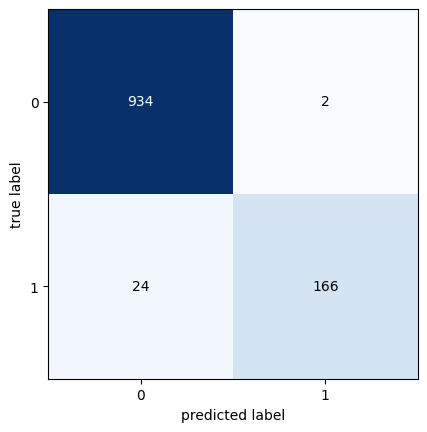

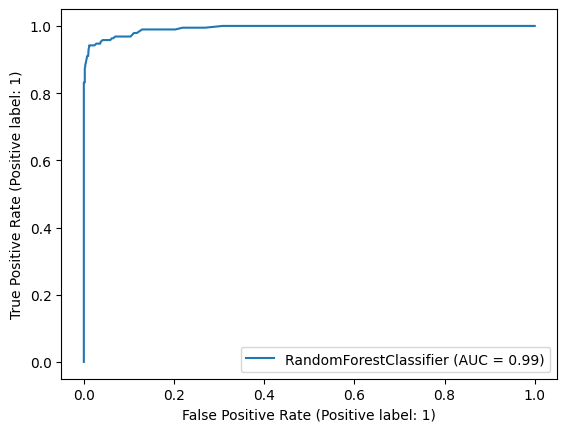

In [ ]:
# Initialize a RandomForestClassifier as the baseline model
rf_clf_bl = RandomForestClassifier()

# Train the baseline model on the training data
rf_clf_bl.fit(X_train, y_train)

# Predict labels for the test data using the baseline model
y_pred = rf_clf_bl.predict(X_test)

# Calculate accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Calculate ROC AUC score
roc_auc1 = roc_auc_score(y_test, y_pred)

# Print accuracy and ROC AUC score
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))

# Generate a classification report including precision, recall, F1-score, and support
print(classification_report(y_test, y_pred, digits=5))

# Plot confusion matrix to visualize true positive, false positive, true negative, and false negative predictions
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# Plot ROC curve to visualize the trade-off between true positive rate and false positive rate
RocCurveDisplay.from_estimator(rf_clf_bl, X_test, y_test)

### RandomForest Model :

*   **Full features**
*   Handling imbalanced data using **RandomOverSampler**
*   Tuning hyperparameters of the **RandomForestClassifier**
*   Model evaluation on the test data







In [ ]:
# Handling with imbalanced data
ros = RandomOverSampler()

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Define hyperparameters grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200, 400, 600],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define scorers for mean ROC AUC and average precision
scorers = {
    'roc_auc': make_scorer(roc_auc_score),
    'avg_precision': make_scorer(average_precision_score)
}

# Define GridSearchCV for hyperparameter tuning
rf_no_fs = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10, scoring=scorers, refit='roc_auc')
rf_no_fs.fit(X_train_ros, y_train_ros)

# Print best hyperparameters from GridSearchCV
print("Best Hyperparameters from Grid Search:")
print(rf_no_fs.best_params_)
print()

# Perform cross-validation with hyperparameter tuning for original dataset
no_fs_scores = cross_validate(rf_no_fs.best_estimator_, X_train_ros, y_train_ros, cv=10, scoring=scorers)

# Calculate mean scores for original dataset
mean_no_fs_scores = {metric: scores.mean() for metric, scores in no_fs_scores.items()}

# Print cross-validation scores
print("\nOversampling without Feature Selection Model Scores:")
for metric, score in mean_no_fs_scores.items():
    print(f"{metric}: {score}")

Best Hyperparameters from Grid Search:
{'max_depth': 40, 'max_features': 'auto', 'n_estimators': 600}


Oversampling without Feature Selection Model Scores:
fit_time: 4.632718515396118
score_time: 0.11478157043457031
test_roc_auc: 0.9938602495543674
test_avg_precision: 0.9879248964208767


Evaluation

---



Accuracy = 0.9840142095914742
ROC Area under Curve = 0.9631185335132704
              precision    recall  f1-score   support

           0    0.98623   0.99466   0.99043       936
           1    0.97253   0.93158   0.95161       190

    accuracy                        0.98401      1126
   macro avg    0.97938   0.96312   0.97102      1126
weighted avg    0.98392   0.98401   0.98388      1126



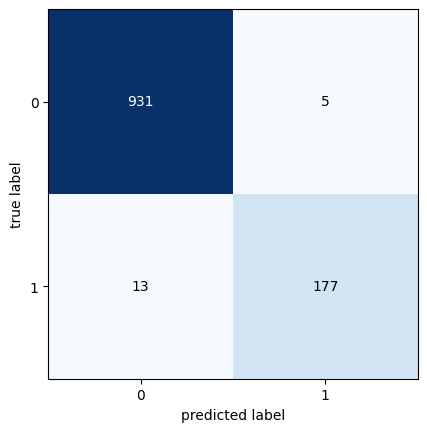

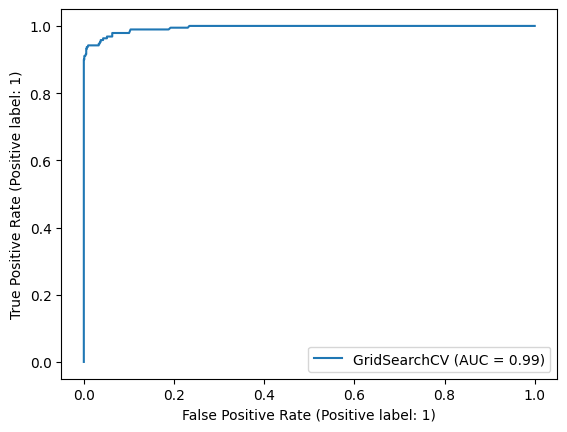

In [ ]:
# RandomForest Model with Random Oversampling and Full Features
# Predict labels for the test data using the best estimator found by GridSearchCV
y_pred = rf_no_fs.best_estimator_.predict(X_test)

# Calculate accuracy and roc auc of the predictions
accuracy = accuracy_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred)

# Print accuracy and ROC AUC score
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc2))

# Generate a classification report including precision, recall, F1-score, and support
print(classification_report(y_test, y_pred, digits=5))

# Plot confusion matrix to visualize true positive, false positive, true negative, and false negative predictions
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# Plot ROC curve to visualize the trade-off between true positive rate and false positive rate
RocCurveDisplay.from_estimator(rf_no_fs, X_test, y_test)

### RandomForest Model :

*   **Feature selection**
*   Handling imbalanced data using **RandomOverSampler**
*   Tuning hyperparameters of the **RandomForestClassifier**
*   Model evaluation on the test data

In [ ]:
# Handleing with imbalanced data
ros = RandomOverSampler()

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Define hyperparameters grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200, 400, 600],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define scorers for mean ROC AUC and average precision
scorers = {
    'roc_auc': make_scorer(roc_auc_score),
    'avg_precision': make_scorer(average_precision_score)
}

# Perform feature selection using SelectFromModel with RandomForest
selector_rf = SelectFromModel(RandomForestClassifier(), threshold='median')
X_train_fs = selector_rf.fit_transform(X_train_ros, y_train_ros)

# Train RandomForest model with selected features
rf_with_fs = RandomForestClassifier()
rf_with_fs.fit(X_train_fs, y_train_ros)

# Define GridSearchCV for hyperparameter tuning
rf_with_fs = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10, scoring=scorers, refit='roc_auc')
rf_with_fs.fit(X_train_ros, y_train_ros)

# Print best hyperparameters from GridSearchCV
print("Best Hyperparameters from Grid Search:")
print(rf_with_fs.best_params_)
print()

# Perform cross-validation with hyperparameter tuning for feature selection dataset
fs_scores = cross_validate(rf_with_fs.best_estimator_, X_train_fs, y_train_ros, cv=10, scoring=scorers)

# Calculate mean scores for selected features
mean_fs_scores = {metric: scores.mean() for metric, scores in fs_scores.items()}

# Print cross-validation scores
print("\nOversampling with Feature Selection Model Scores:")
for metric, score in mean_fs_scores.items():
    print(f"{metric}: {score}")

Best Hyperparameters from Grid Search:
{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 600}


Oversampling with Feature Selection Model Scores:
fit_time: 4.476611614227295
score_time: 0.10217664241790772
test_roc_auc: 0.9871857397504458
test_avg_precision: 0.9752354780023612


Evaluation

---



Accuracy = 0.9822380106571936
ROC Area under Curve = 0.9620501574448944
              precision    recall  f1-score   support

           0    0.98620   0.99252   0.98935       936
           1    0.96196   0.93158   0.94652       190

    accuracy                        0.98224      1126
   macro avg    0.97408   0.96205   0.96794      1126
weighted avg    0.98211   0.98224   0.98212      1126



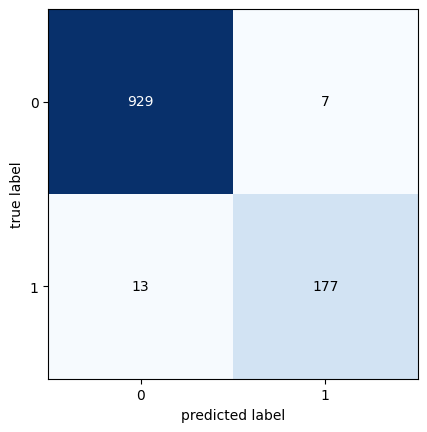

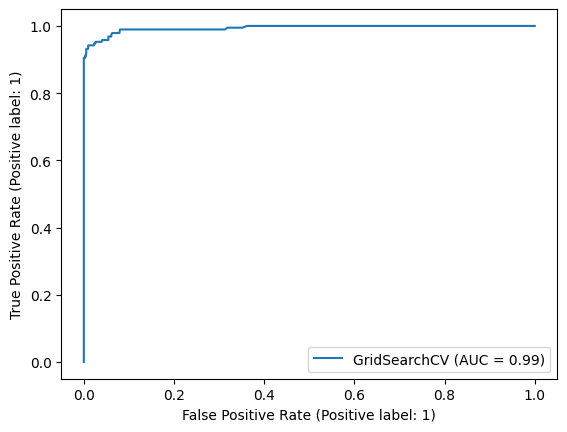

In [ ]:
# RandomForest Model with Random Oversampling and Feature Selection
# Predict labels for the test data using the best estimator found by GridSearchCV
y_pred = rf_with_fs.best_estimator_.predict(X_test)

# Calculate accuracy and roc auc of the predictions
accuracy = accuracy_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_pred)

# Print accuracy and ROC AUC score
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc3))

# Generate a classification report including precision, recall, F1-score, and support
print(classification_report(y_test, y_pred, digits=5))

# Plot confusion matrix to visualize true positive, false positive, true negative, and false negative predictions
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# Plot ROC curve to visualize the trade-off between true positive rate and false positive rate
RocCurveDisplay.from_estimator(rf_with_fs, X_test, y_test)

The best performanced RandomForest model is the model including this methods :
*   Feature selection
*   Handling imbalanced data using RandomOverSampler
*   Tuning hyperparameters of the RandomForestClassifier


## Modeling : XGboost Model











### XGBoost Model :

*   **Baseline**



Accuracy = 0.9760213143872114
ROC Area under Curve = 0.9541160593792173
              precision    recall  f1-score   support

           0    0.98403   0.98718   0.98560       936
           1    0.93583   0.92105   0.92838       190

    accuracy                        0.97602      1126
   macro avg    0.95993   0.95412   0.95699      1126
weighted avg    0.97589   0.97602   0.97595      1126



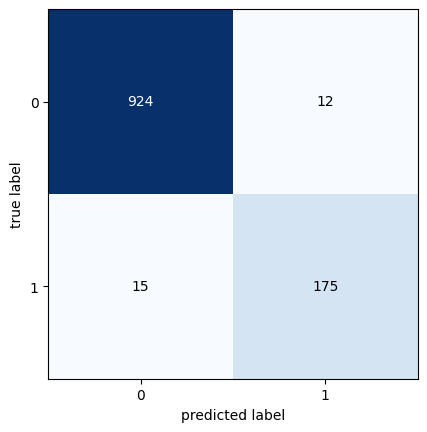

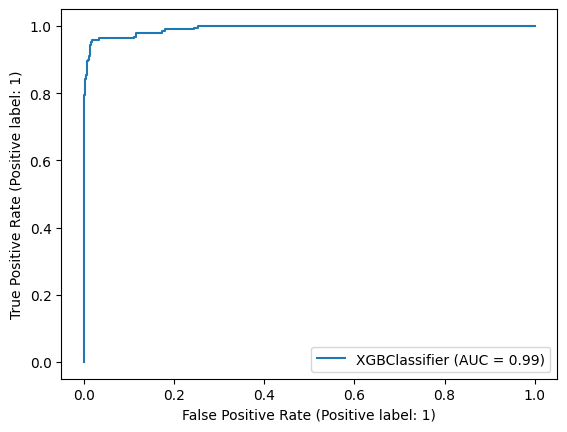

In [ ]:
# Initialize a RandomForestClassifier as the baseline model
xgb_clf_bl = xgb.XGBClassifier()

# Train the baseline model on the training data
xgb_clf_bl.fit(X_train, y_train)

# Predict labels for the test data using the baseline model
y_pred = xgb_clf_bl.predict(X_test)

# Calculate accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Calculate ROC AUC score
roc_auc4 = roc_auc_score(y_test, y_pred)

# Print accuracy and ROC AUC score
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc4))

# Generate a classification report including precision, recall, F1-score, and support
print(classification_report(y_test, y_pred, digits=5))

# Plot confusion matrix to visualize true positive, false positive, true negative, and false negative predictions
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# Plot ROC curve to visualize the trade-off between true positive rate and false positive rate
RocCurveDisplay.from_estimator(xgb_clf_bl, X_test, y_test)

### XGBoost Model :

*   **Full features**
*   Handling imbalanced data using **RandomOverSampler**
*   Tuning hyperparameters of the **XGBClassifier**
*   Model evaluation on the test data







In [ ]:
# Handling with imbalanced data
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Define hyperparameters grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200, 400, 600],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.3]
}

# Define scorers for mean ROC AUC and average precision
scorers = {
    'roc_auc': make_scorer(roc_auc_score),
    'avg_precision': make_scorer(average_precision_score)
}

# Define GridSearchCV for hyperparameter tuning
xgb_clf = xgb.XGBClassifier()
xgb_no_fs = GridSearchCV(xgb_clf, param_grid=param_grid, cv=10, scoring=scorers, refit='roc_auc')
xgb_no_fs.fit(X_train_ros, y_train_ros)

# Print best hyperparameters from GridSearchCV
print("Best Hyperparameters from Grid Search:")
print(xgb_no_fs.best_params_)
print()

# Perform cross-validation with hyperparameter tuning for original dataset
xgb_scores = cross_validate(xgb_no_fs.best_estimator_, X_train_ros, y_train_ros, cv=10, scoring=scorers)

# Calculate mean scores for original dataset
mean_xgb_scores = {metric: scores.mean() for metric, scores in xgb_scores.items()}

# Print cross-validation scores
print("\nOversampling without Feature Selection Model Scores:")
for metric, score in mean_xgb_scores.items():
    print(f"{metric}: {score}")

Best Hyperparameters from Grid Search:
{'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 600}


Oversampling without Feature Selection Model Scores:
fit_time: 1.2927043437957764
score_time: 0.02257659435272217
test_roc_auc: 0.9917251336898396
test_avg_precision: 0.9837704101036806


Evaluation

---



Accuracy = 0.9813499111900533
ROC Area under Curve = 0.9678081421502475
              precision    recall  f1-score   support

           0    0.98930   0.98825   0.98878       936
           1    0.94241   0.94737   0.94488       190

    accuracy                        0.98135      1126
   macro avg    0.96586   0.96781   0.96683      1126
weighted avg    0.98139   0.98135   0.98137      1126



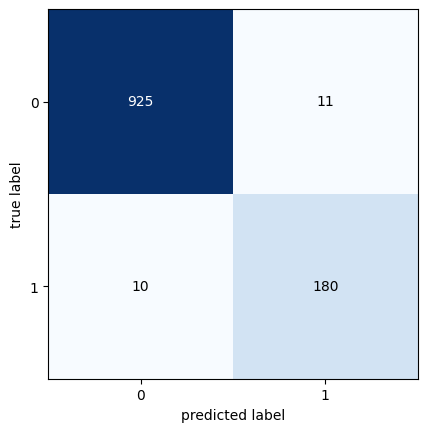

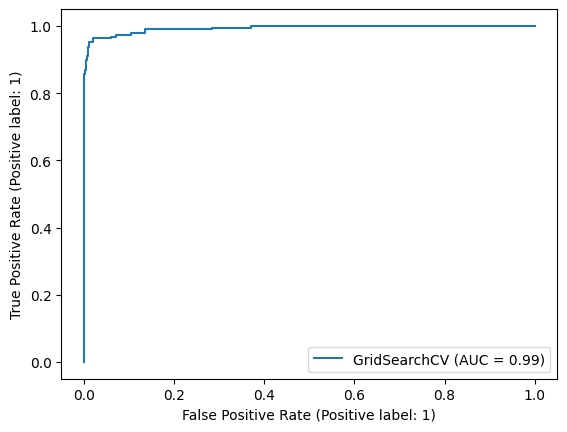

In [ ]:
# XGBoost Model with Random Oversampling and Full Features
# Predict labels for the test data using the best estimator found by GridSearchCV
y_pred = xgb_no_fs.best_estimator_.predict(X_test)

# Calculate accuracy and roc auc of the predictions
accuracy = accuracy_score(y_test, y_pred)
roc_auc5 = roc_auc_score(y_test, y_pred)

# Print accuracy and ROC AUC score
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))

# Generate a classification report including precision, recall, F1-score, and support
print(classification_report(y_test, y_pred, digits=5))

# Plot confusion matrix to visualize true positive, false positive, true negative, and false negative predictions
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# Plot ROC curve to visualize the trade-off between true positive rate and false positive rate
RocCurveDisplay.from_estimator(xgb_no_fs, X_test, y_test)

### XGBoost Model :

*   **Feature selection**
*   Handling imbalanced data using **RandomOverSampler**
*   Tuning hyperparameters of the **XGBClassifier**
*   Model evaluation on the test data

In [ ]:
# Handling with imbalanced data
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Define hyperparameters grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200, 400, 600],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.3]
}

# Define scorers for mean ROC AUC and average precision
scorers = {
    'roc_auc': make_scorer(roc_auc_score),
    'avg_precision': make_scorer(average_precision_score)
}

# Perform feature selection using SelectFromModel with XGBoost
selector_xgb = SelectFromModel(xgb.XGBClassifier(), threshold='median')
X_train_fs = selector_xgb.fit_transform(X_train_ros, y_train_ros)

# Train XGBoost model with selected features
xgb_with_fs = xgb.XGBClassifier()
xgb_with_fs.fit(X_train_fs, y_train_ros)

# Define GridSearchCV for hyperparameter tuning
xgb_with_fs = GridSearchCV(xgb.XGBClassifier(), param_grid=param_grid, cv=10, scoring=scorers, refit='roc_auc')
xgb_with_fs.fit(X_train_ros, y_train_ros)

# Print best hyperparameters from GridSearchCV
print("Best Hyperparameters from Grid Search:")
print(xgb_with_fs.best_params_)
print()

# Perform cross-validation with hyperparameter tuning for feature selection dataset
fs_scores = cross_validate(xgb_with_fs.best_estimator_, X_train_fs, y_train_ros, cv=10, scoring=scorers)

# Calculate mean scores for selected features
mean_fs_scores = {metric: scores.mean() for metric, scores in fs_scores.items()}

# Print cross-validation scores
print("\nOversampling with Feature Selection Model Scores:")
for metric, score in mean_fs_scores.items():
    print(f"{metric}: {score}")

Best Hyperparameters from Grid Search:
{'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 600}


Oversampling with Feature Selection Model Scores:
fit_time: 0.8526921749114991
score_time: 0.019095087051391603
test_roc_auc: 0.9863853832442067
test_avg_precision: 0.9736659313779062


Evaluation

---



Accuracy = 0.9795737122557726
ROC Area under Curve = 0.9646423751686911
              precision    recall  f1-score   support

           0    0.98824   0.98718   0.98771       936
           1    0.93717   0.94211   0.93963       190

    accuracy                        0.97957      1126
   macro avg    0.96270   0.96464   0.96367      1126
weighted avg    0.97962   0.97957   0.97960      1126



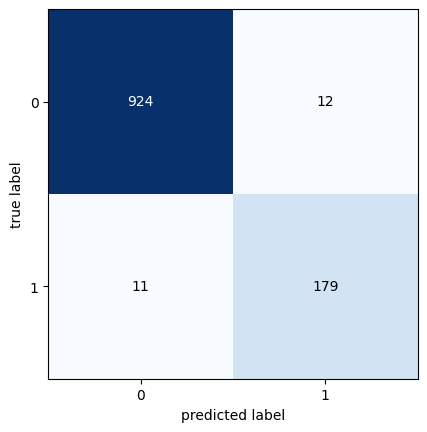

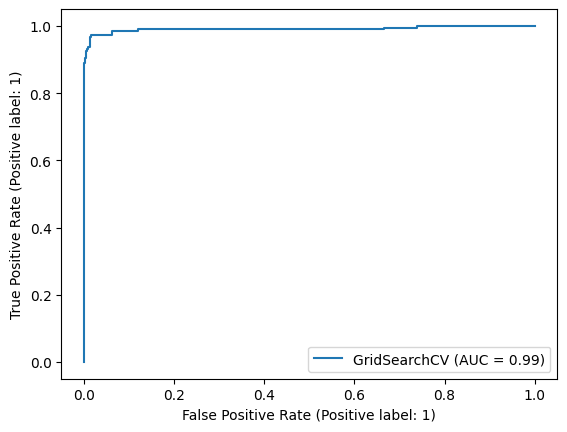

In [ ]:
# XGBoost Model with Random Oversampling and Features Selection
# Predict labels for the test data using the best estimator found by GridSearchCV
y_pred = xgb_with_fs.best_estimator_.predict(X_test)

# Calculate accuracy and roc auc of the predictions
accuracy = accuracy_score(y_test, y_pred)
roc_auc6 = roc_auc_score(y_test, y_pred)

# Print accuracy and ROC AUC score
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc6))

# Generate a classification report including precision, recall, F1-score, and support
print(classification_report(y_test, y_pred, digits=5))

# Plot confusion matrix to visualize true positive, false positive, true negative, and false negative predictions
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# Plot ROC curve to visualize the trade-off between true positive rate and false positive rate
RocCurveDisplay.from_estimator(xgb_with_fs, X_test, y_test)

# PCA Visualization of Models

## Best RandomForest Model with PCA Visualization

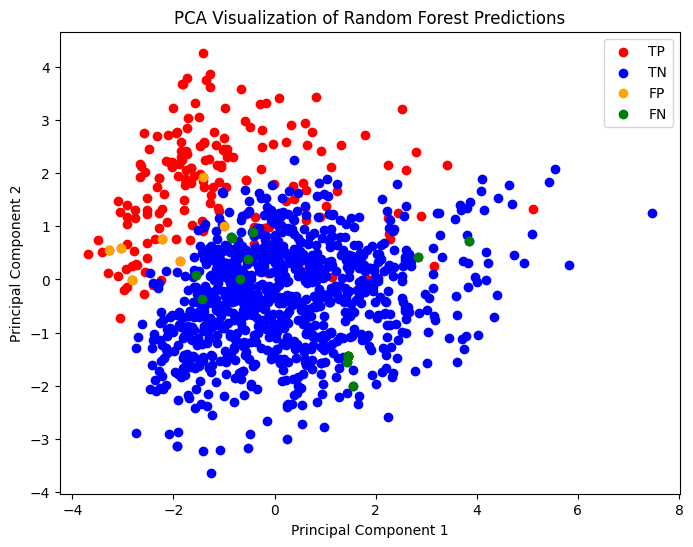

In [ ]:
# Make predictions using your Random Forest model
y_pred = rf_with_fs.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Combine features and predictions for PCA
combined_data = np.hstack((X_test, y_pred.reshape(-1, 1)))

# Define a pipeline with StandardScaler and PCA
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))

# Fit the pipeline to the data and transform it
pca_result = pca_scaled.fit_transform(combined_data)

# Plot results
plt.figure(figsize=(8, 6))

# Plot TP, FP, TN, FN
plt.scatter(pca_result[y_pred == 1, 0], pca_result[y_pred == 1, 1], color='red', label='TP')
plt.scatter(pca_result[y_pred == 0, 0], pca_result[y_pred == 0, 1], color='blue', label='TN')
plt.scatter(pca_result[(y_pred != y_test) & (y_pred == 1), 0], pca_result[(y_pred != y_test) & (y_pred == 1), 1], color='orange', label='FP')
plt.scatter(pca_result[(y_pred != y_test) & (y_pred == 0), 0], pca_result[(y_pred != y_test) & (y_pred == 0), 1], color='green', label='FN')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Random Forest Predictions')
plt.legend()
plt.show()

* Cluster Distribution: The visual clusters of TP and TN suggest that the PCA-transformed features do capture meaningful variance that the Random Forest model is utilizing effectively for predictions. However, the overlap of FP and FN with TP and TN indicates areas of potential model confusion, likely around boundary or marginal cases.

* Model Strengths: The model shows strong predictive accuracy with the majority of predictions falling into the correct categories (TP and TN). This suggests good generalization for both classes under the current feature set and model parameters.

* Areas for Improvement: The presence of FP and FN, particularly where they overlap with TP and TN, suggests that further tuning of the model could be beneficial. This could involve adjusting model parameters, incorporating more discriminative features, or potentially using ensemble techniques to enhance decision boundaries.

## Best XGBoost Model with PCA Visualization

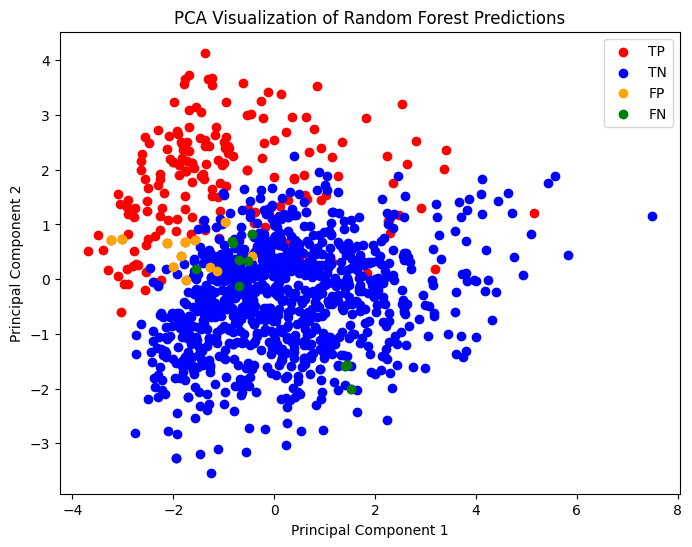

In [ ]:
# Make predictions using your XGBoost model
y_pred = xgb_with_fs.predict(X_test) # <<< change to the best performanced model

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Combine features and predictions for PCA
combined_data = np.hstack((X_test, y_pred.reshape(-1, 1)))

# Define a pipeline with StandardScaler and PCA
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))

# Fit the pipeline to the data and transform it
pca_result = pca_scaled.fit_transform(combined_data)

# Plot results
plt.figure(figsize=(8, 6))

# Plot TP, FP, TN, FN
plt.scatter(pca_result[y_pred == 1, 0], pca_result[y_pred == 1, 1], color='red', label='TP')
plt.scatter(pca_result[y_pred == 0, 0], pca_result[y_pred == 0, 1], color='blue', label='TN')
plt.scatter(pca_result[(y_pred != y_test) & (y_pred == 1), 0], pca_result[(y_pred != y_test) & (y_pred == 1), 1], color='orange', label='FP')
plt.scatter(pca_result[(y_pred != y_test) & (y_pred == 0), 0], pca_result[(y_pred != y_test) & (y_pred == 0), 1], color='green', label='FN')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Random Forest Predictions')
plt.legend()
plt.show()

1. True Positives (Red): These are correctly predicted positive cases. They are predominantly clustered in the upper region of the plot, which may indicate that these cases have distinctive features that are effectively captured by the PCA, leading to correct positive predictions.

2. True Negatives (Blue): These are correctly predicted negative cases. They form the densest cluster, primarily occupying the central area of the plot. This suggests that the model effectively identifies the majority of negative cases, likely due to the clear differentiation of their underlying features in the transformed space.

3. False Positives (Orange): These are the instances where the model incorrectly predicted the negative cases as positive. Notably, these points are interspersed among the true positives but also spread into the true negative space, indicating possible areas of feature overlap or boundary conditions where the model misclassifies negatives as positives.

4. False Negatives (Green): These are positive cases incorrectly predicted as negative. These points are relatively few and are scattered among the true negatives, suggesting that while the model is robust in identifying many positives, it still misses some due to either underrepresented features or anomalies not well-learned during training.

**Summary**
* Model Strengths: The clustering of TNs and TPs indicates a generally effective model in classifying the majority of instances correctly. The distinct clustering implies that the model is using features that adequately separate the majority of positive and negative instances.

* Areas for Improvement: The interspersing of FPs within the TP cluster, as well as the scattering of FNs among TNs, points to potential confusion within the model regarding boundary cases or cases with mixed feature signals. This might be improved with further tuning of the model parameters or through more sophisticated feature engineering to better delineate the classes.

* Potential Actions:
Feature Engineering: Refining or introducing new features might help in resolving ambiguities that lead to FPs and FNs.
Model Tuning: Adjusting the threshold for classification, using cost-sensitive learning, or trying different algorithms could potentially reduce the number of misclassifications.
Data Analysis: Further analysis of the instances leading to FPs and FNs might reveal specific patterns or biases that could be addressed through targeted data collection or preprocessing.